In [2]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import copy
from mpl_toolkits.axes_grid1 import make_axes_locatable



# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
        'weight' : 'normal'}

matplotlib.rc('font', **font)
from afrc import AnalyticalFRC
import protfasta
import metapredict as meta

In [3]:
basedir = 'data/'

names = ['actr','asyn','hnRNPA1','ntail','p27','p53_S15E_T18E_S20E', 'ash1','drkN','notch','p53_1_91']

rg = {}
re = {}
dm = {}
cm = {}
nu = {}
for n in names:
    rg[n] = np.loadtxt(f"{basedir}/{n}/RG.csv")
    re[n] = np.loadtxt(f"{basedir}/{n}/end_to_end.csv")
    dm[n] = np.loadtxt(f"{basedir}/{n}/distance_map.csv", delimiter=',')
    nu[n] = np.loadtxt(f"{basedir}/{n}/scaling_exp_analysis_power.csv", delimiter=',')
    
    if n == 'asyn':
        first_half  = np.loadtxt(f"{basedir}/{n}/contact_order_6.000_1.csv", delimiter=',')
        second_half = np.loadtxt(f"{basedir}/{n}/contact_order_6.000_2.csv", delimiter=',')
        
        cm[n] = (first_half + second_half)/2
        
        
    else:
        cm[n] = np.loadtxt(f"{basedir}/{n}/contact_order_6.000.csv", delimiter=',')
    


seqs = protfasta.read_fasta("data/all_seqs.fasta", invalid_sequence_action='convert',correction_dictionary={'>':'', '<':''}) 



In [4]:
names

['actr',
 'asyn',
 'hnRNPA1',
 'ntail',
 'p27',
 'p53_S15E_T18E_S20E',
 'ash1',
 'drkN',
 'notch',
 'p53_1_91']

In [5]:
# confirm order of Rg_dimensions 
for n in ['ash1','p53_1_91','p27','notch','actr','drkN','ntail','asyn','hnRNPA1']:
    #print(f'{n}: Rg/Rg_theta: {np.mean(rg[n])/AnalyticalFRC(seqs[n]).get_mean_radius_of_gyration()}')
    print(f'{n}: nu_app: {nu[n][0]}')
    print(f'{n}: Re/Re_theta: {np.mean(re[n])/AnalyticalFRC(seqs[n]).get_mean_end_to_end_distance()}')
    print('')

ash1: nu_app: 0.6140889438243177
ash1: Re/Re_theta: 1.2980328181647072

p53_1_91: nu_app: 0.6567546334966924
p53_1_91: Re/Re_theta: 1.387653876841588

p27: nu_app: 0.49020141618742785
p27: Re/Re_theta: 0.9810327133455963

notch: nu_app: 0.3437439714192489
notch: Re/Re_theta: 0.7795098557581

actr: nu_app: 0.501583975923182
actr: Re/Re_theta: 0.8466316917135162

drkN: nu_app: 0.4261779874784504
drkN: Re/Re_theta: 1.0092131675690033

ntail: nu_app: 0.393442510900581
ntail: Re/Re_theta: 0.8684527109360575

asyn: nu_app: 0.2321725173433582
asyn: Re/Re_theta: 0.674508020384597

hnRNPA1: nu_app: 0.46871573167969555
hnRNPA1: Re/Re_theta: 0.8078803354644755



In [6]:
AnalyticalFRC('ASA')

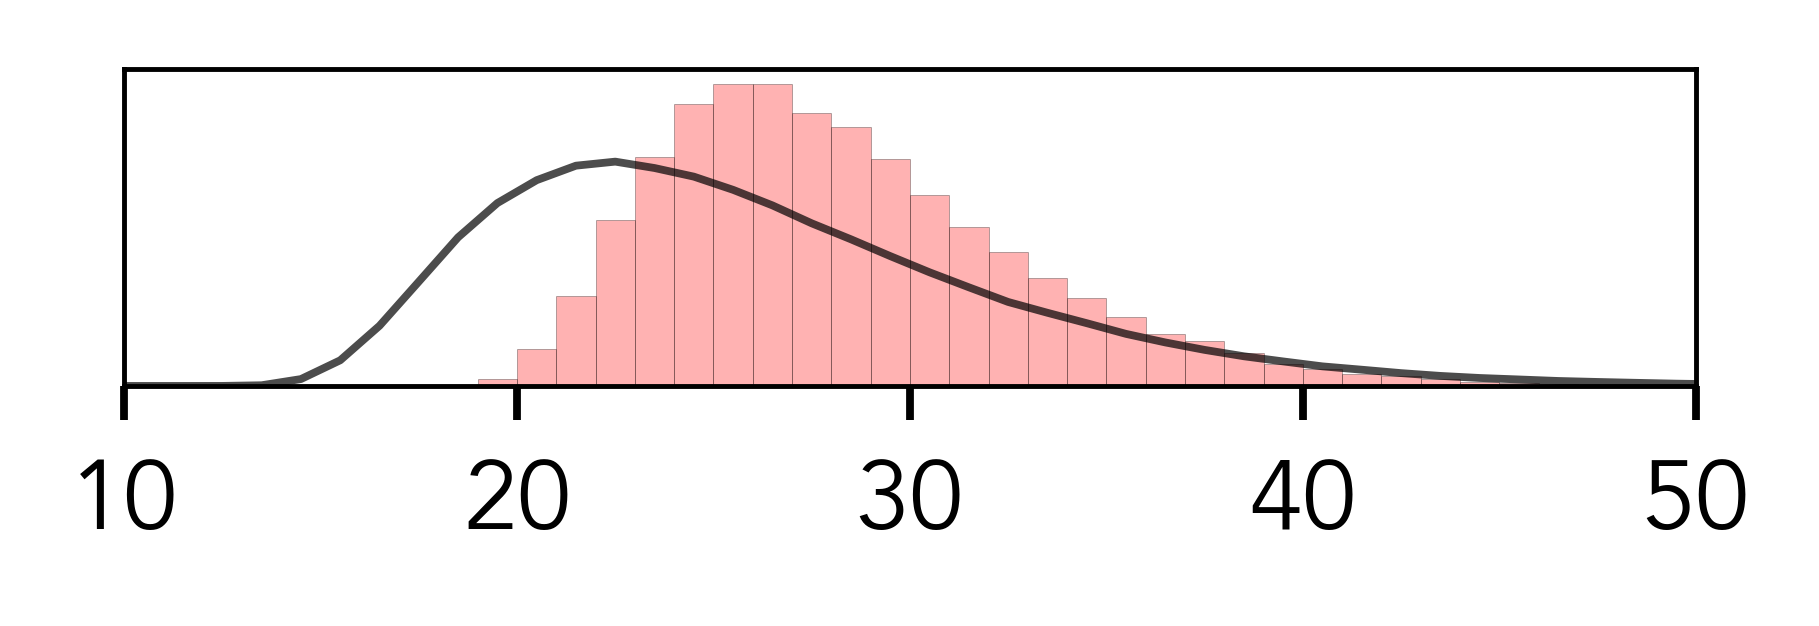

In [7]:

bin_width=1
max_val=90
bins = np.arange(0,max_val, bin_width)

count=1000000

n='p27'
figure(None, (2.7,1), dpi=350)
[counts_sim, b] = np.histogram(rg[n], bins)
plot_bins = (b+bin_width*0.5)[:-1]

# afrc
correction = len(rg[n])/count
synthetic_rg = AnalyticalFRC(seqs[n]).sample_radius_of_gyration_distribution(count)
print()
#
[counts_afrc, b] = np.histogram(synthetic_rg,bins)

plt.bar(plot_bins, counts_sim, width=bin_width, color='red', alpha=0.3,edgecolor='k', linewidth=0.1)
#plt.plot(plot_bins, counts_sim,  color='black', alpha=0.4)
plt.plot(plot_bins, (counts_afrc*correction),  color='k', alpha=0.7,linewidth=0.8)

plt.xlim([10,50])
plt.yticks([])

plt.tight_layout()
    


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


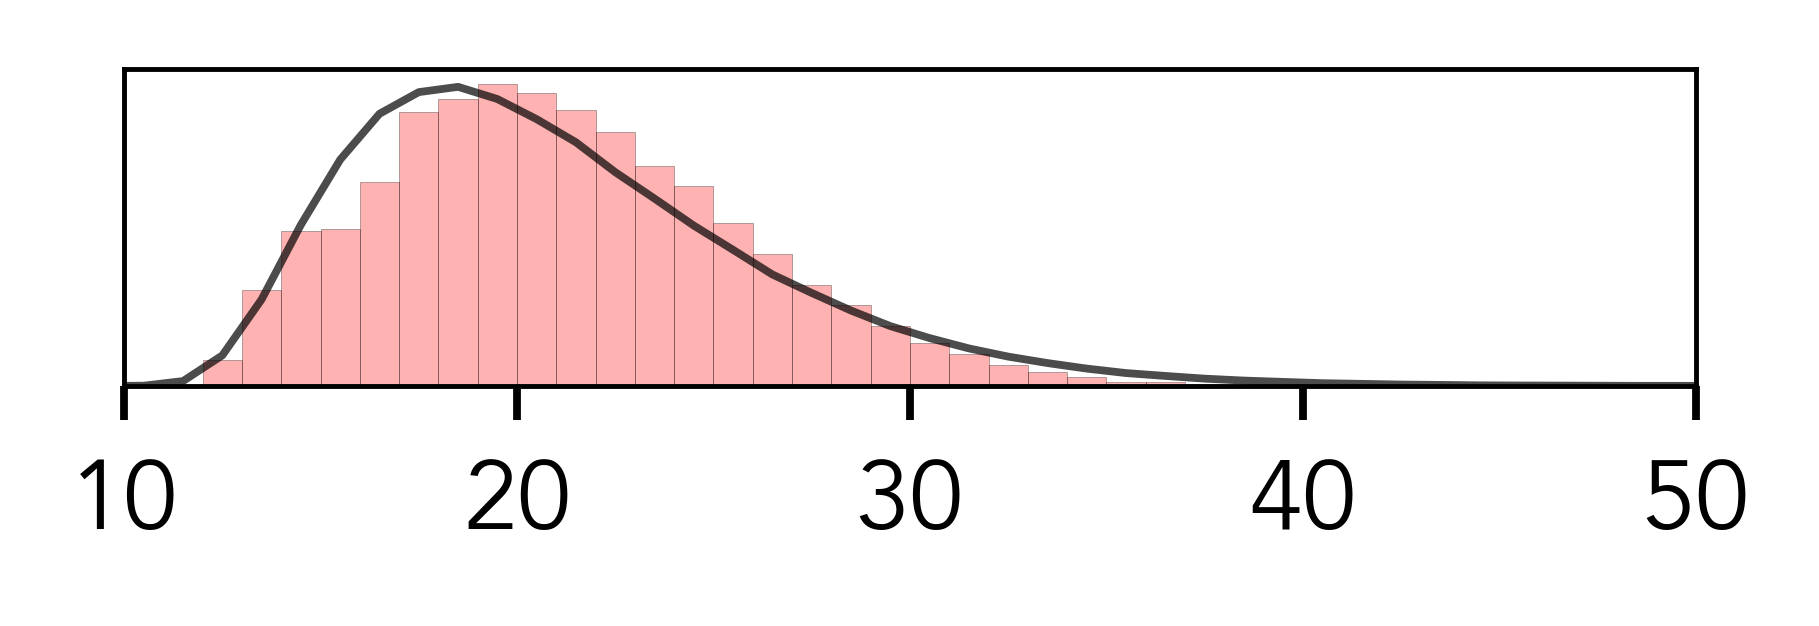

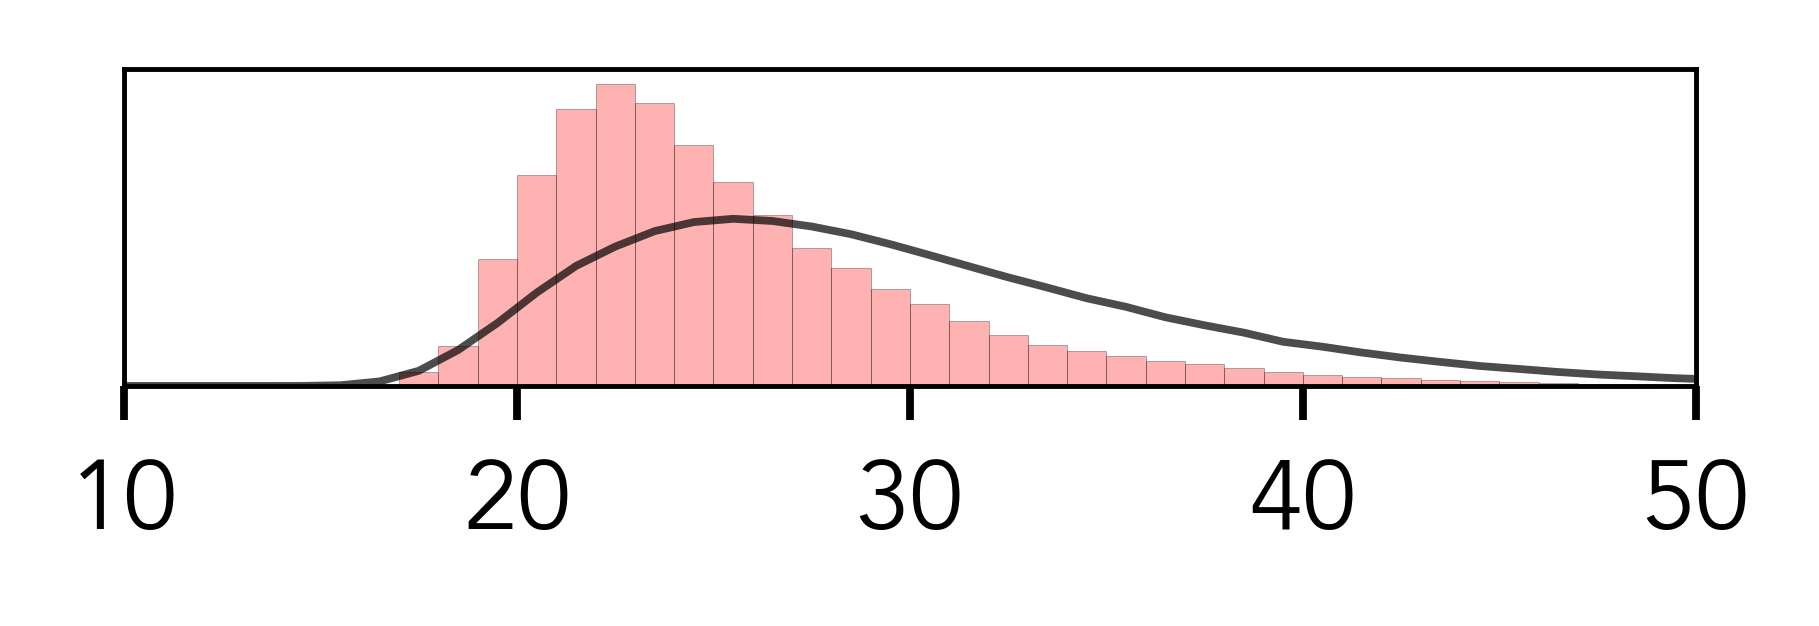

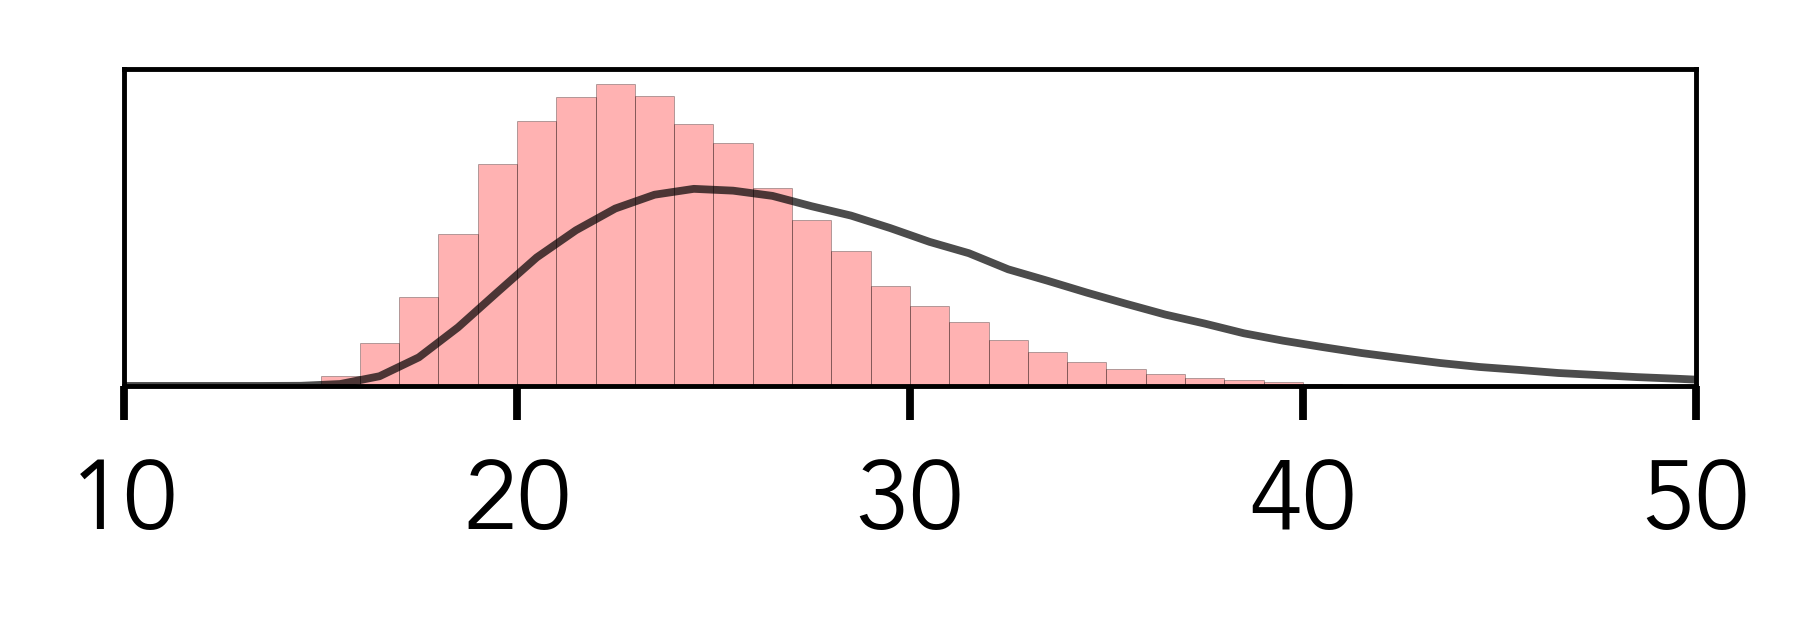

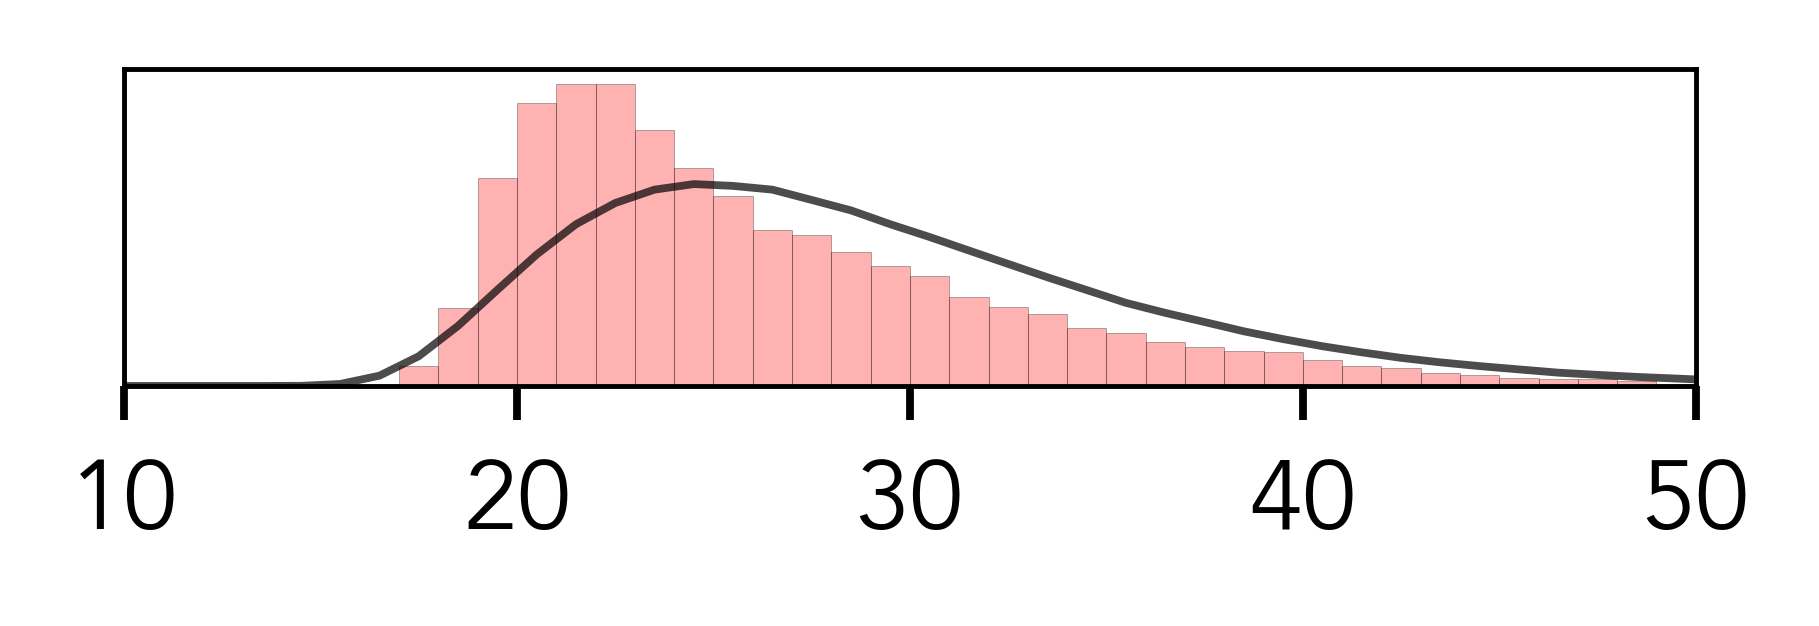

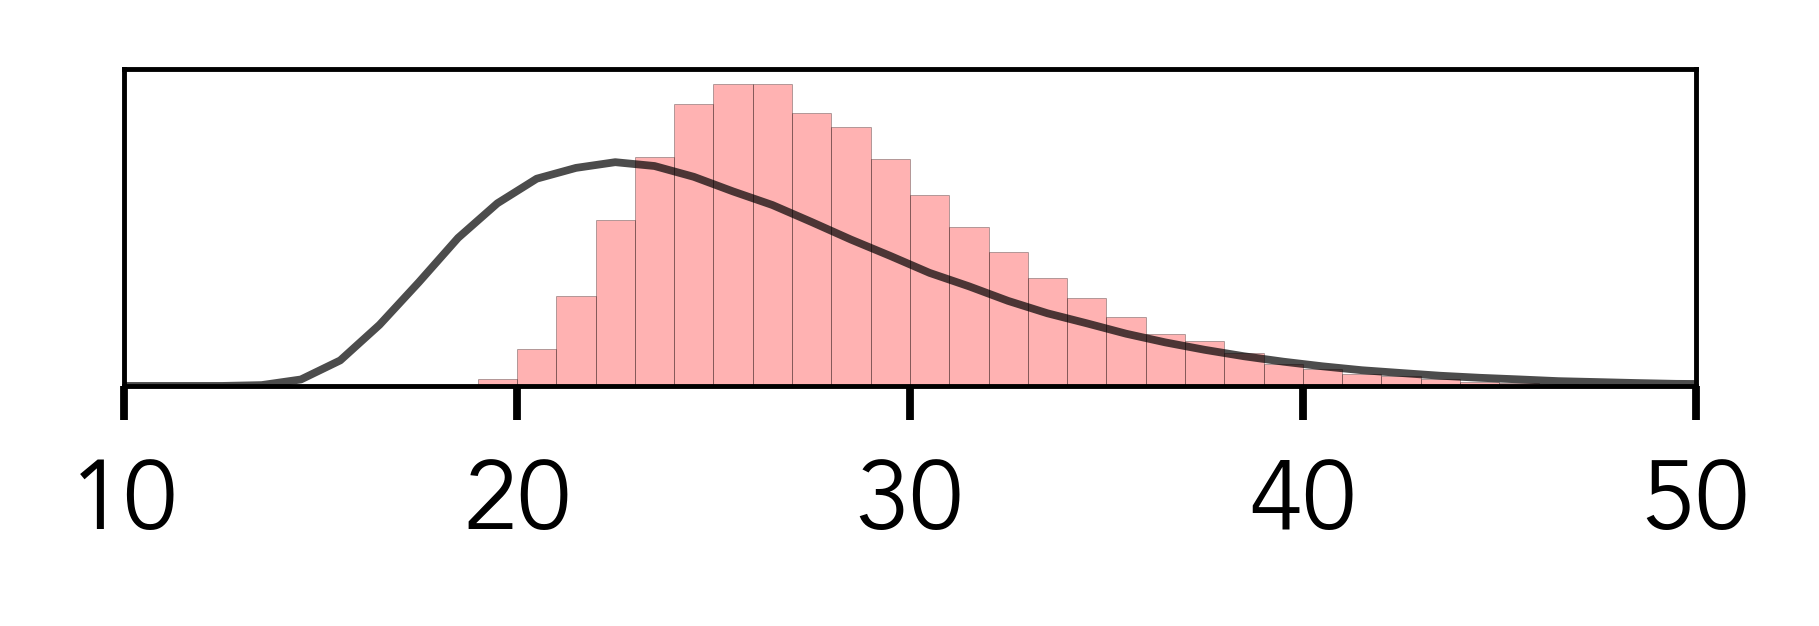

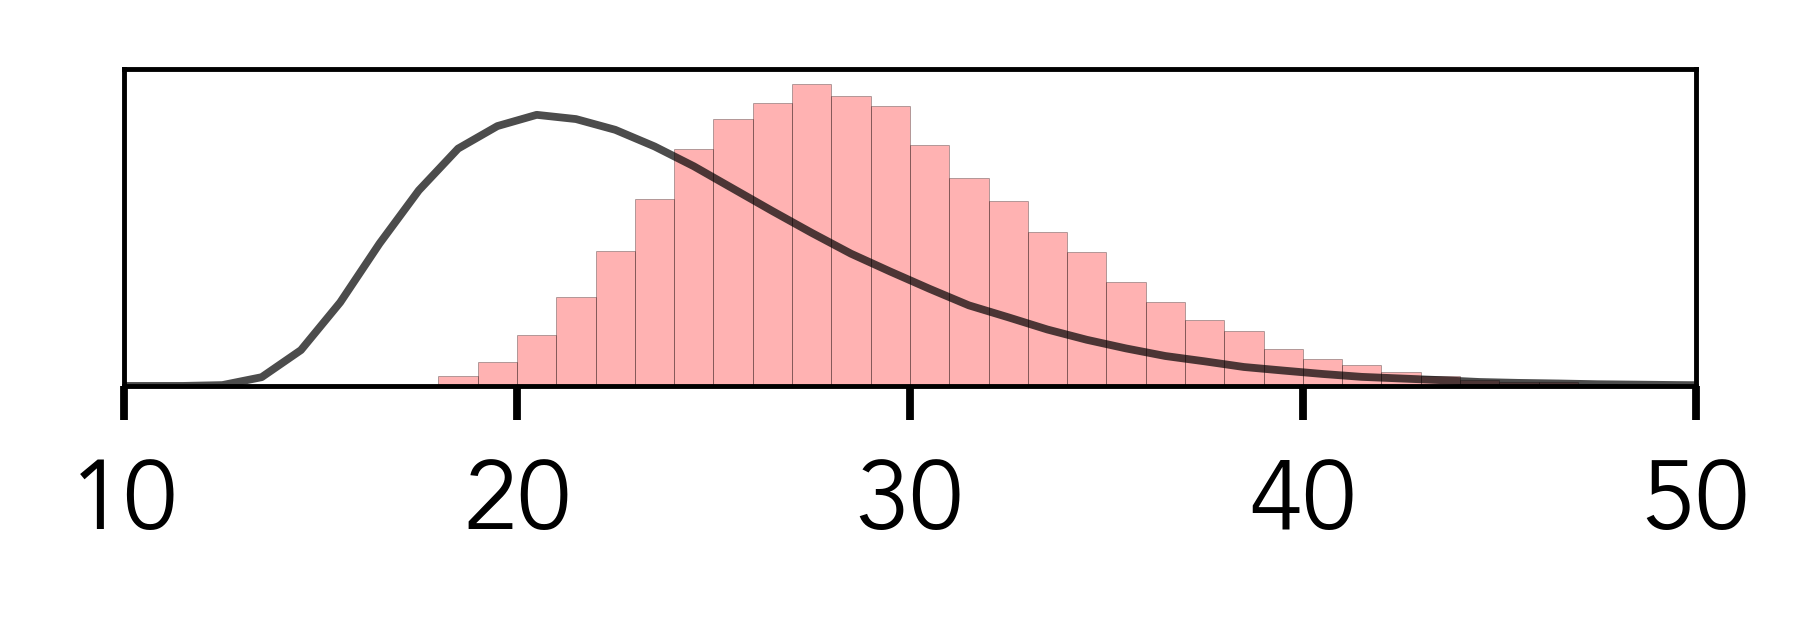

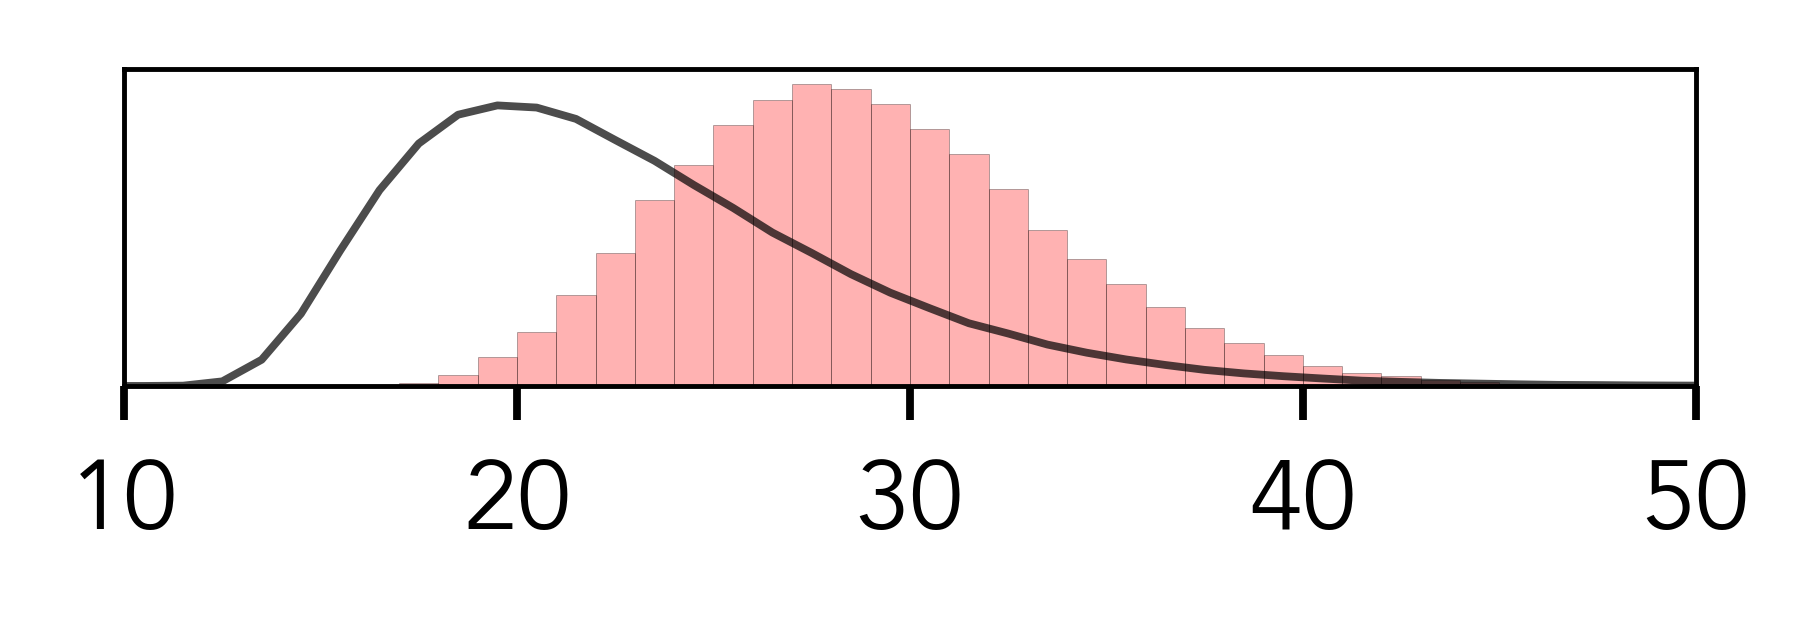

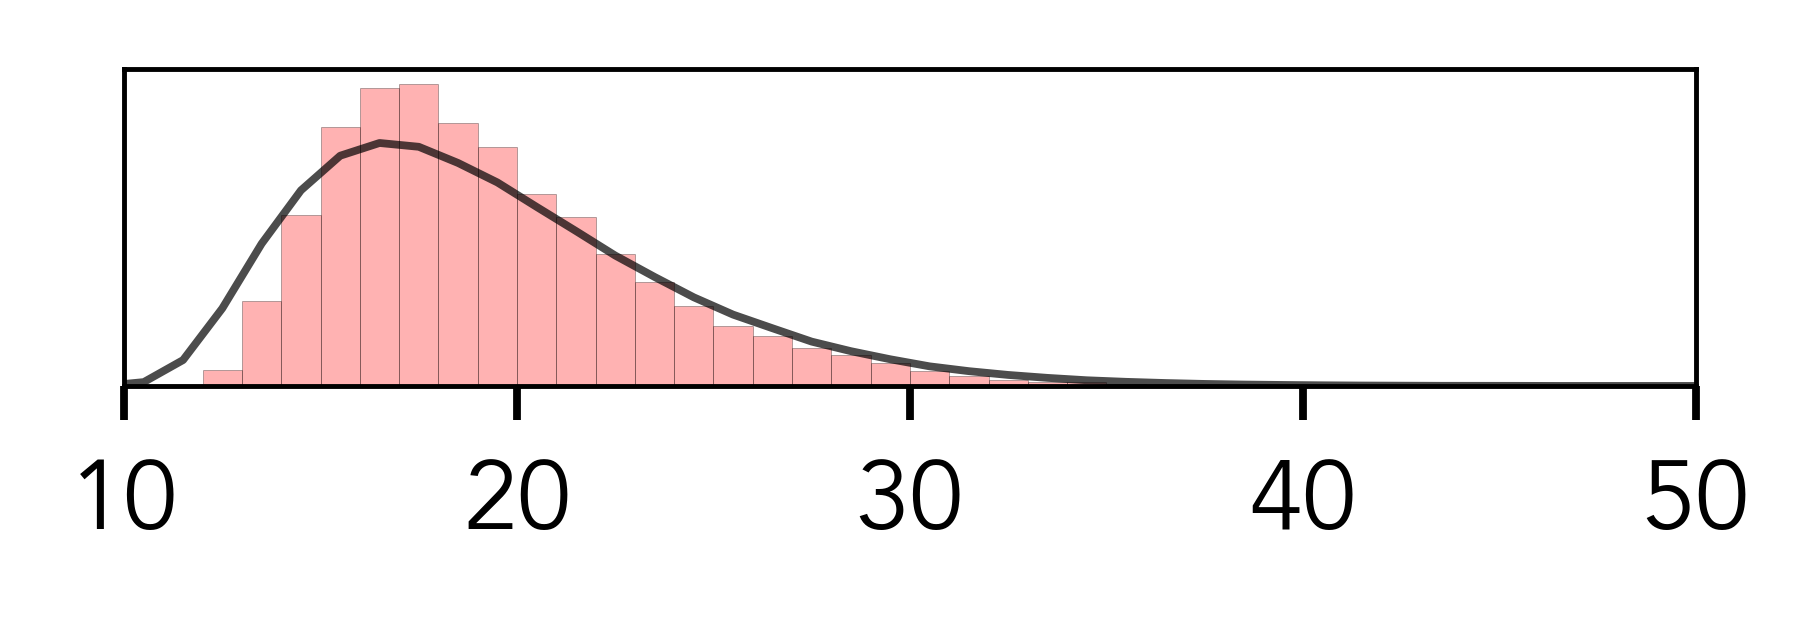

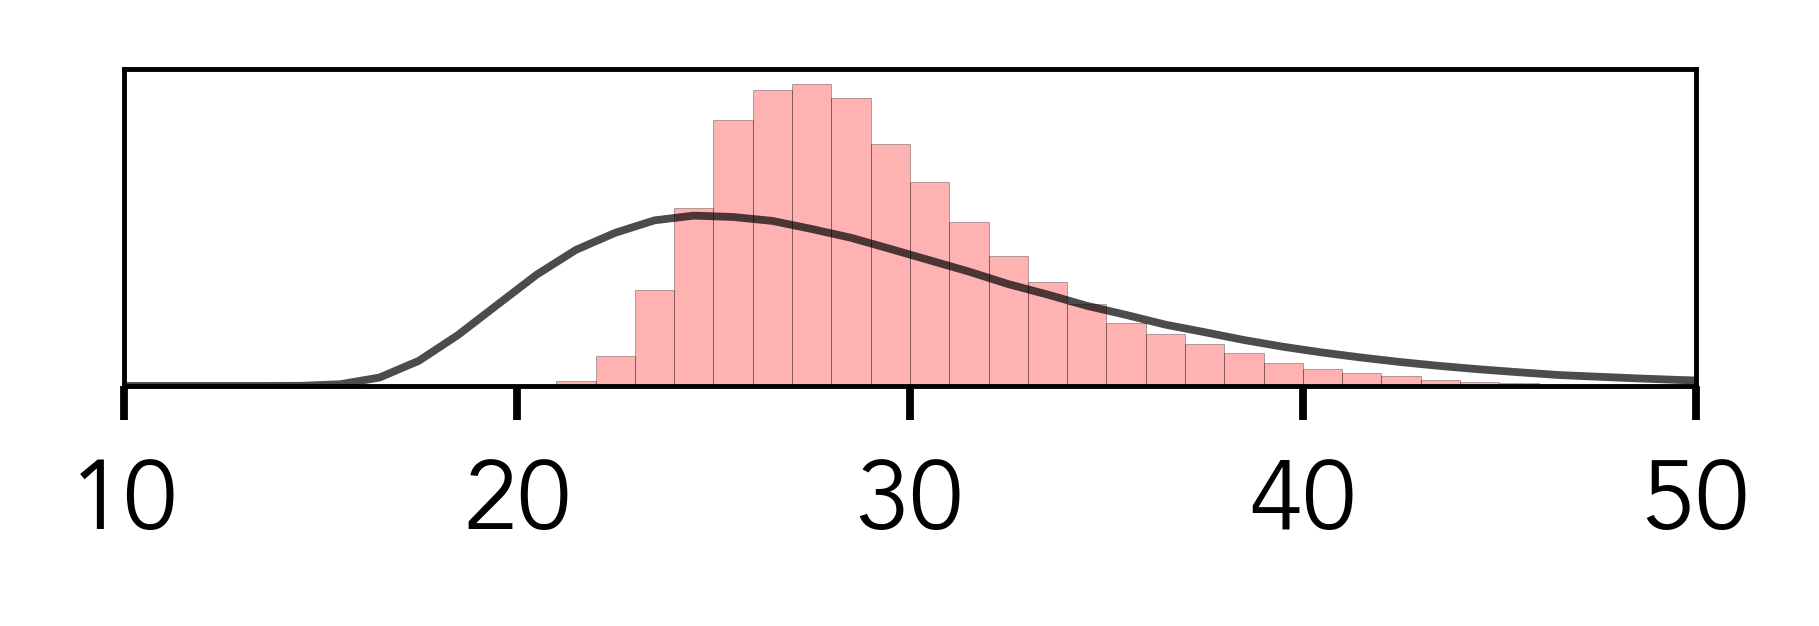

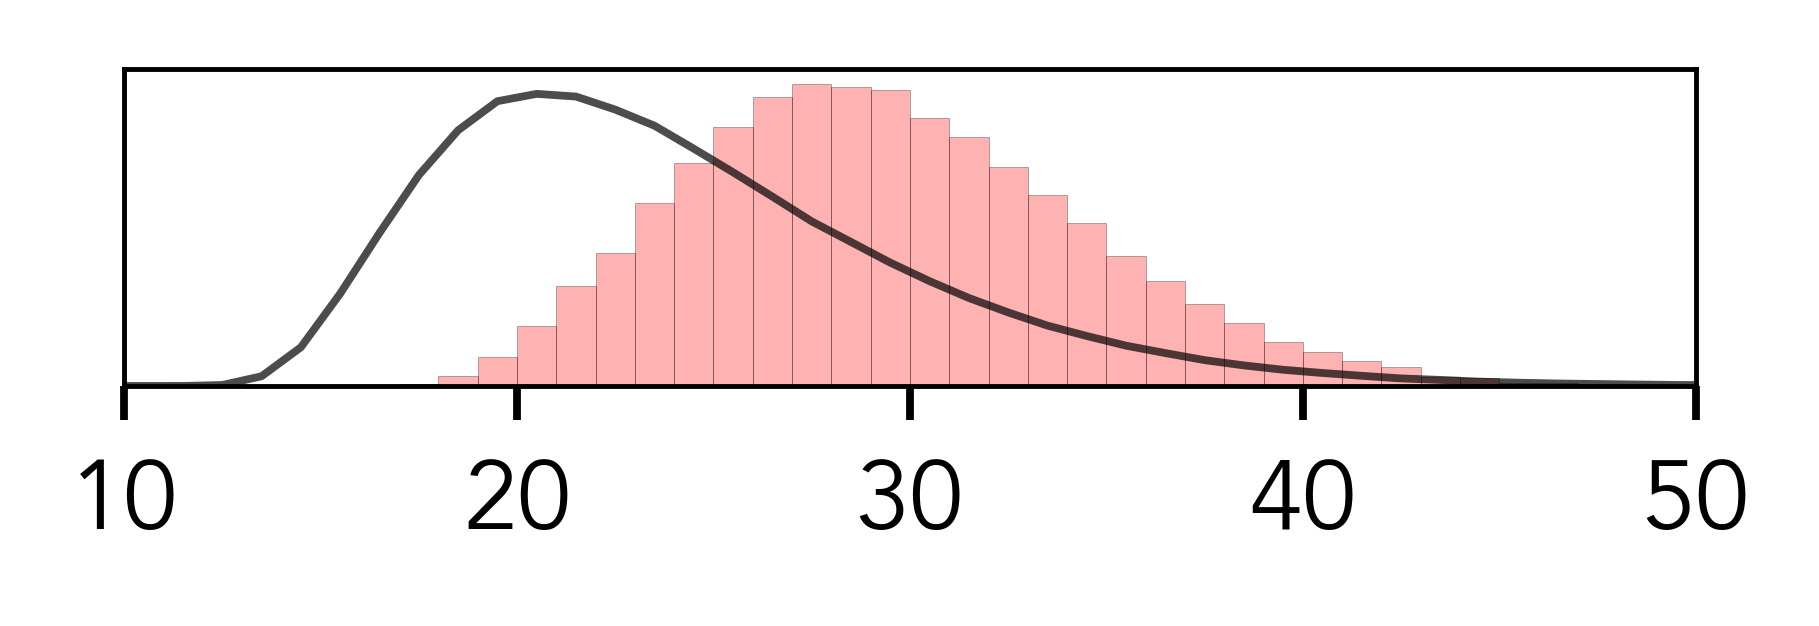

In [8]:

bin_width=1
max_val=90
bins = np.arange(0,max_val, bin_width)

count=1000000



for n in names:
    
    
    figure(None, (2.7,1), dpi=350)
    [counts_sim, b] = np.histogram(rg[n], bins)
    plot_bins = (b+bin_width*0.5)[:-1]
    
    # afrc
    correction = len(rg[n])/count
    synthetic_rg = AnalyticalFRC(seqs[n]).sample_radius_of_gyration_distribution(count)
    
    #
    [counts_afrc, b] = np.histogram(synthetic_rg,bins)
    
    plt.bar(plot_bins, counts_sim, width=bin_width, color='red', alpha=0.3,edgecolor='k', linewidth=0.1)
    #plt.plot(plot_bins, counts_sim,  color='black', alpha=0.4)
    plt.plot(plot_bins, (counts_afrc*correction),  color='k', alpha=0.7,linewidth=0.8)

    plt.xlim([10,50])
    plt.yticks([])

    plt.tight_layout()
    
    
    
    plt.savefig(f'figures/rg_panel_{n}.pdf')


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


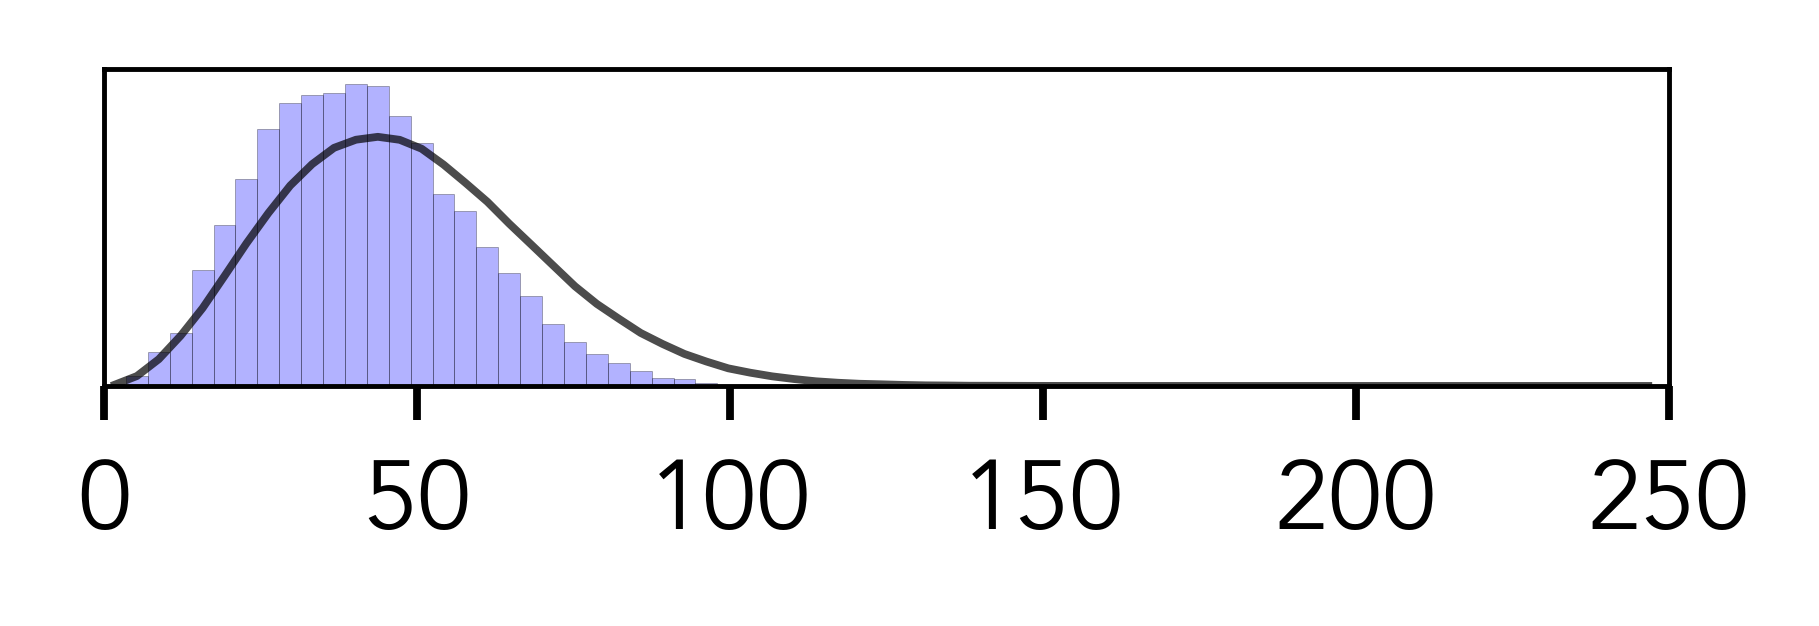

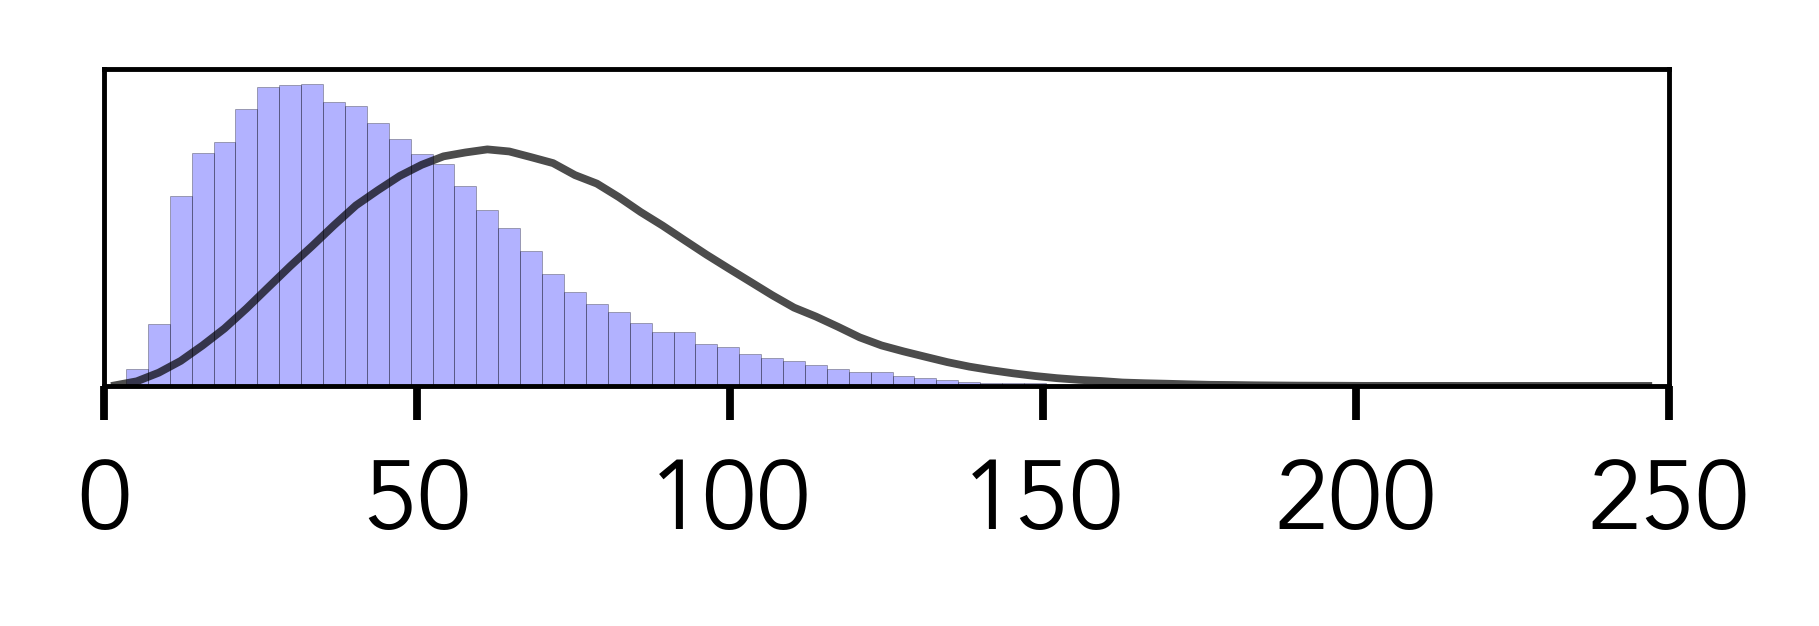

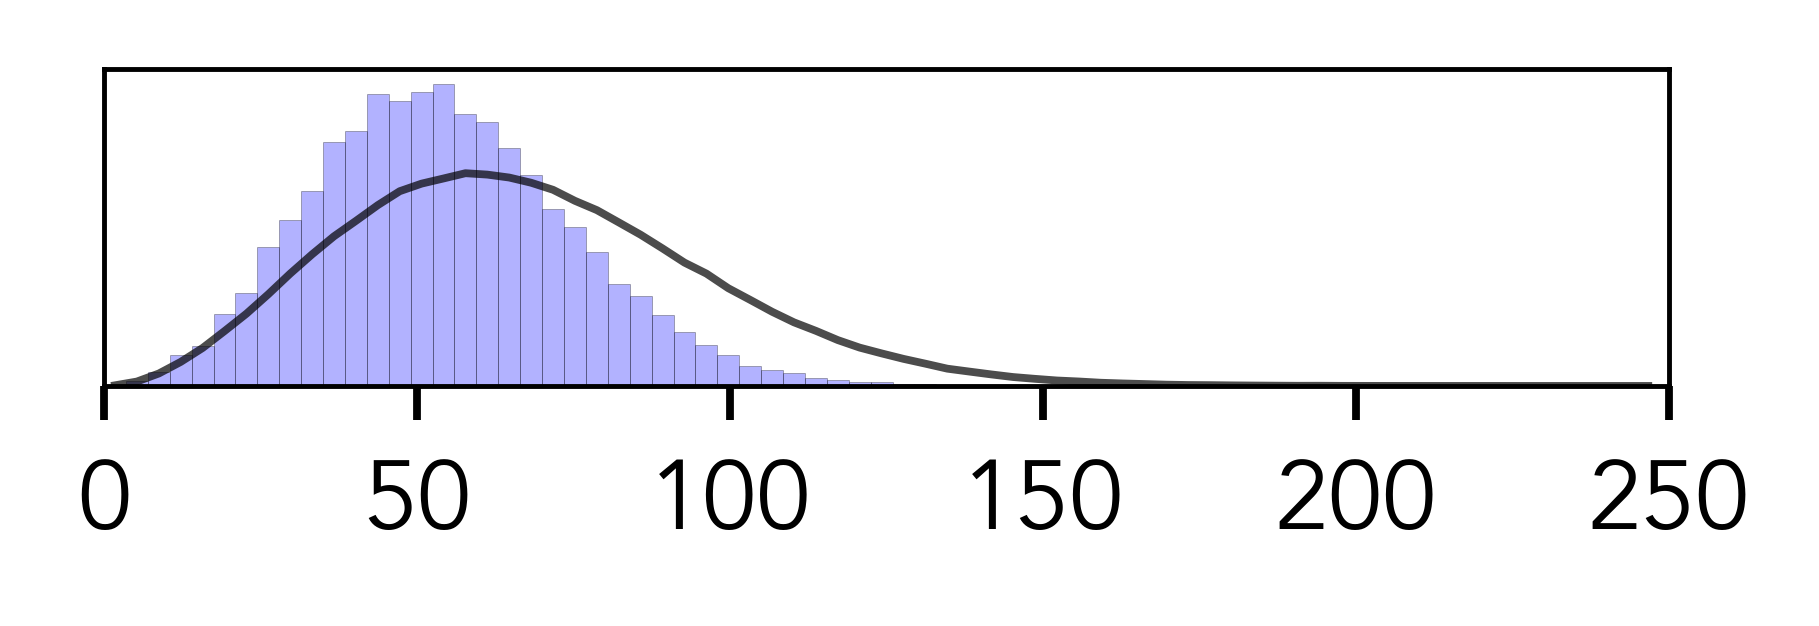

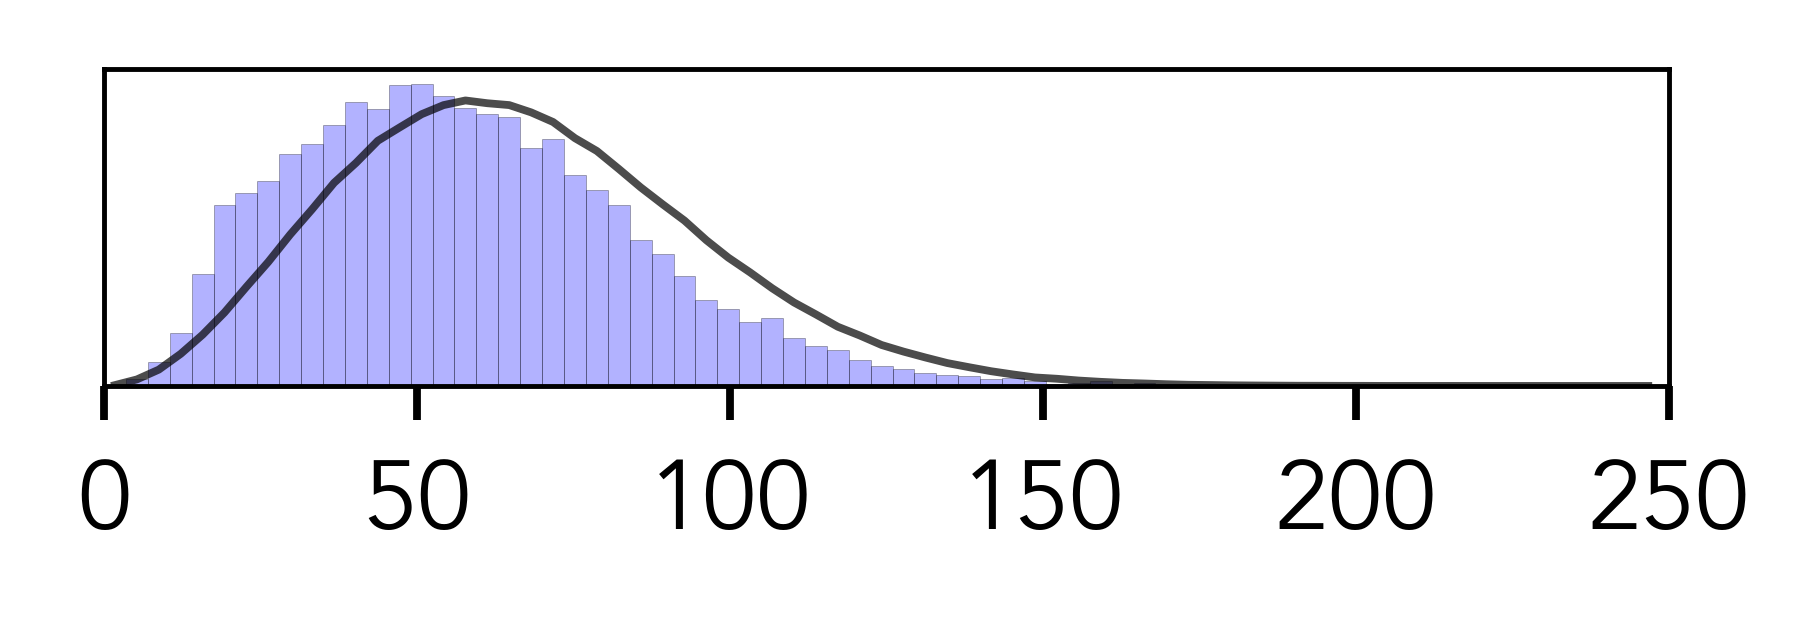

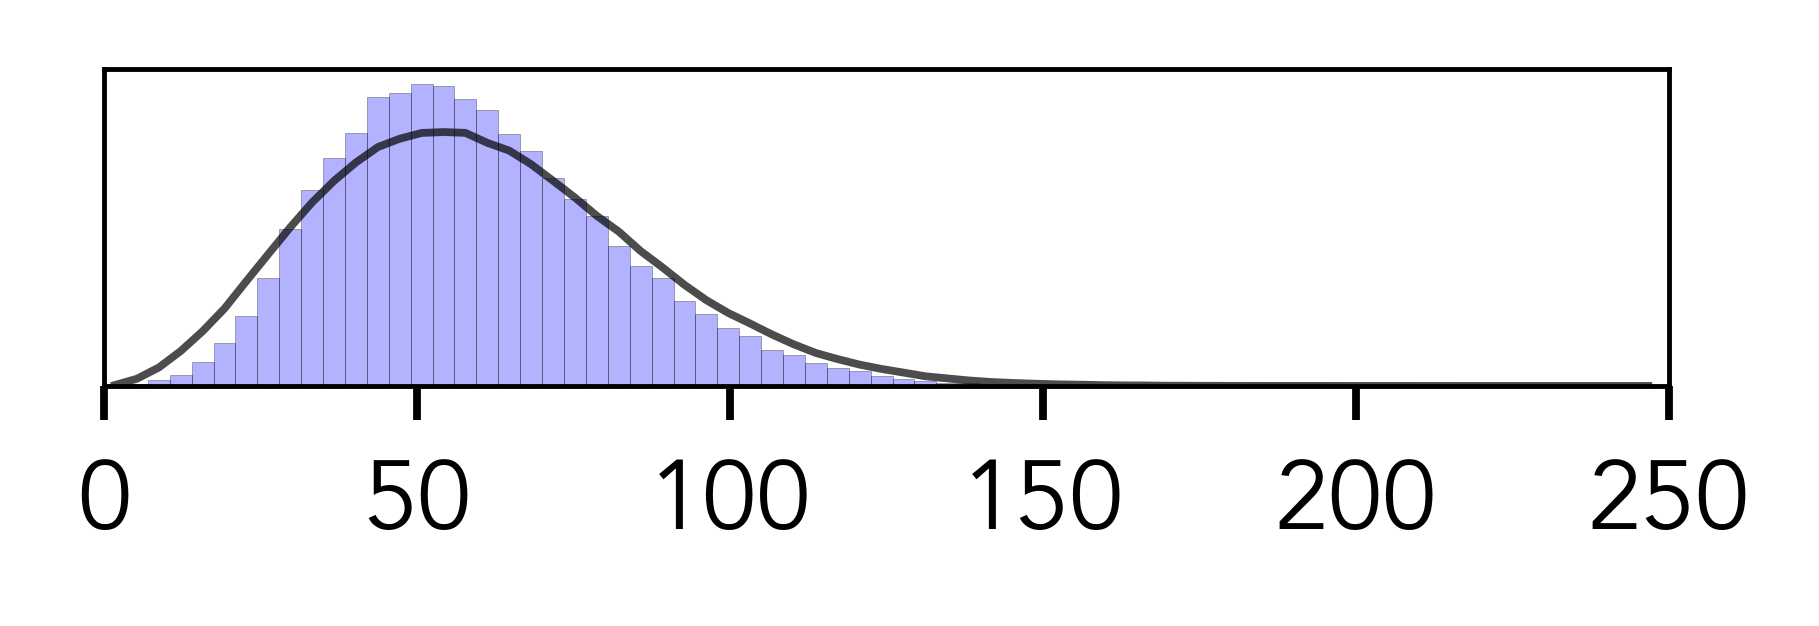

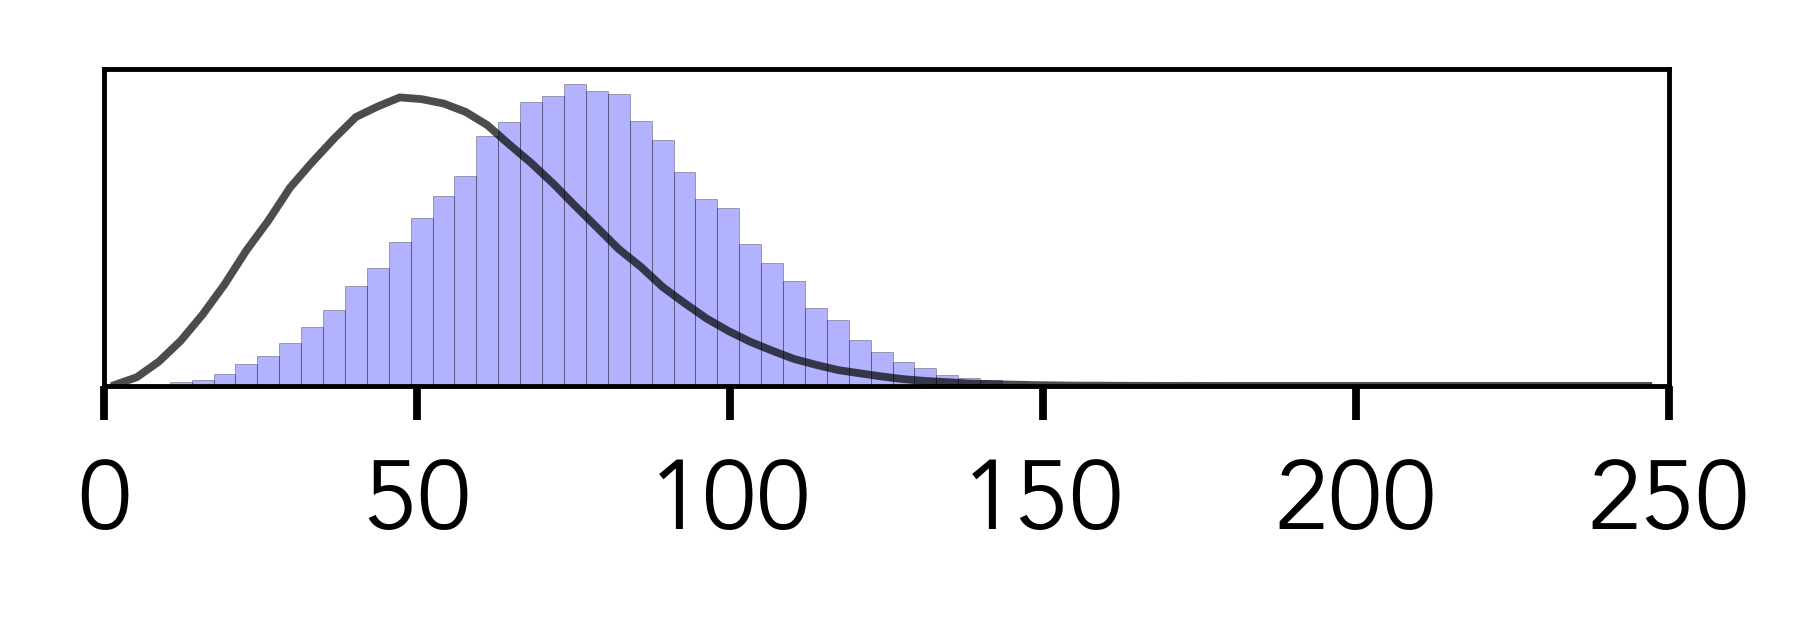

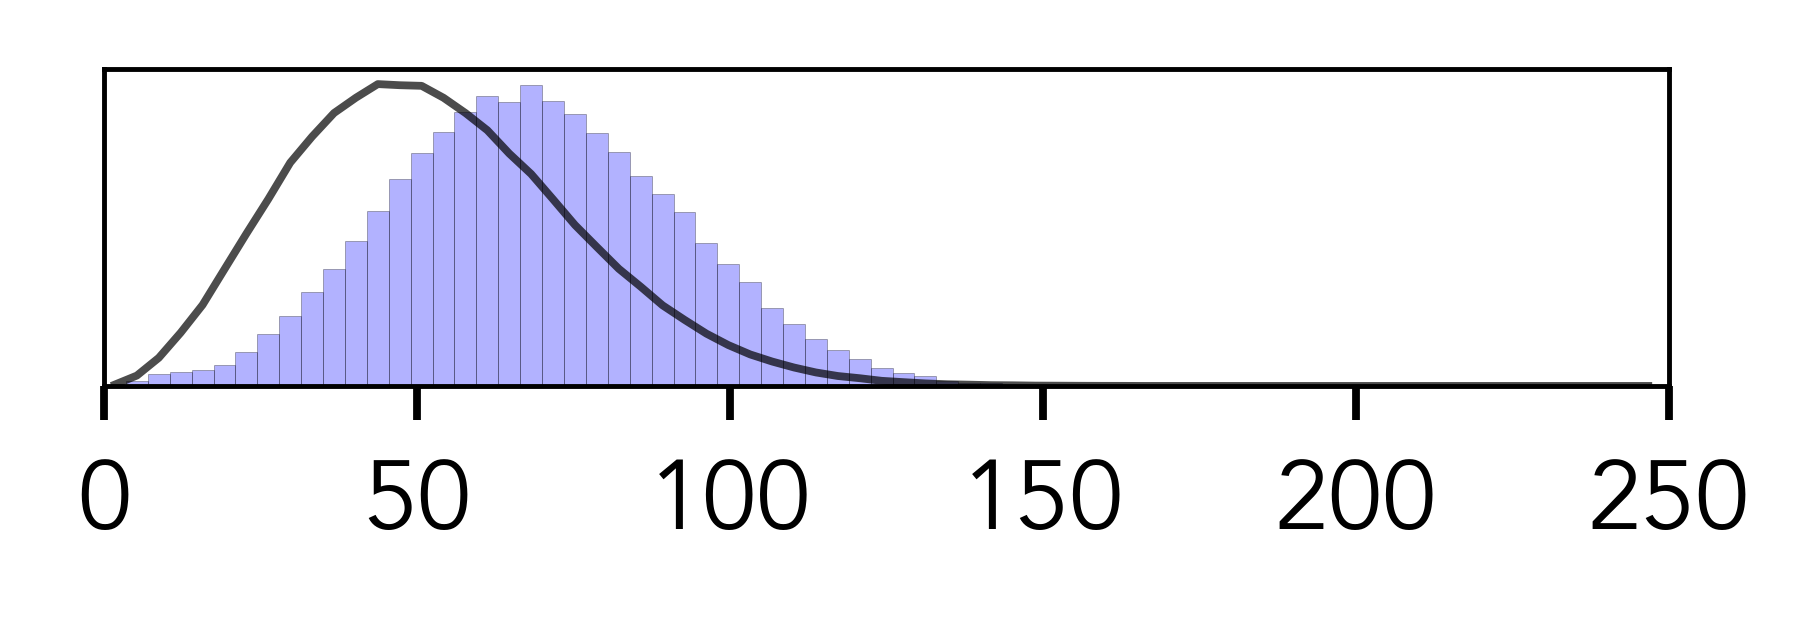

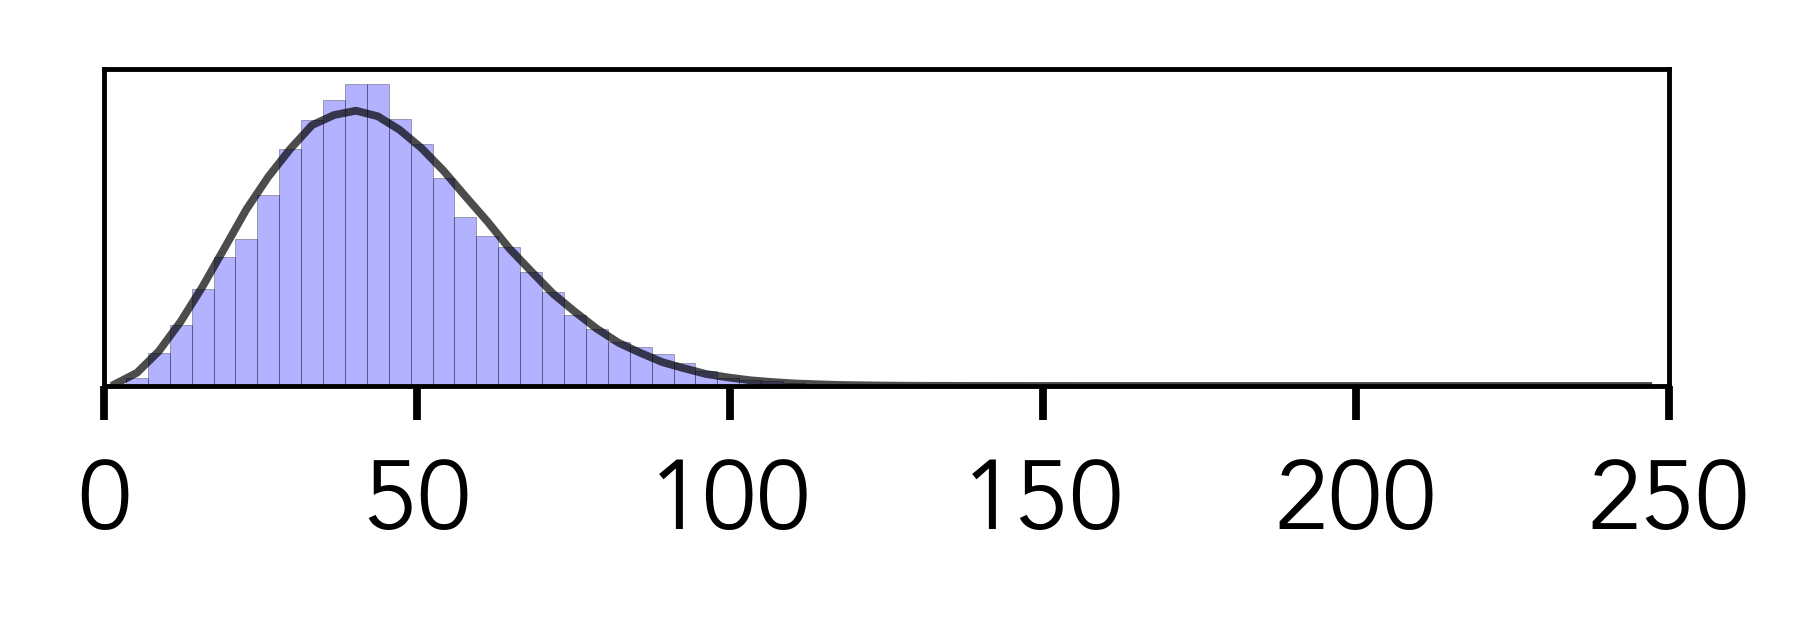

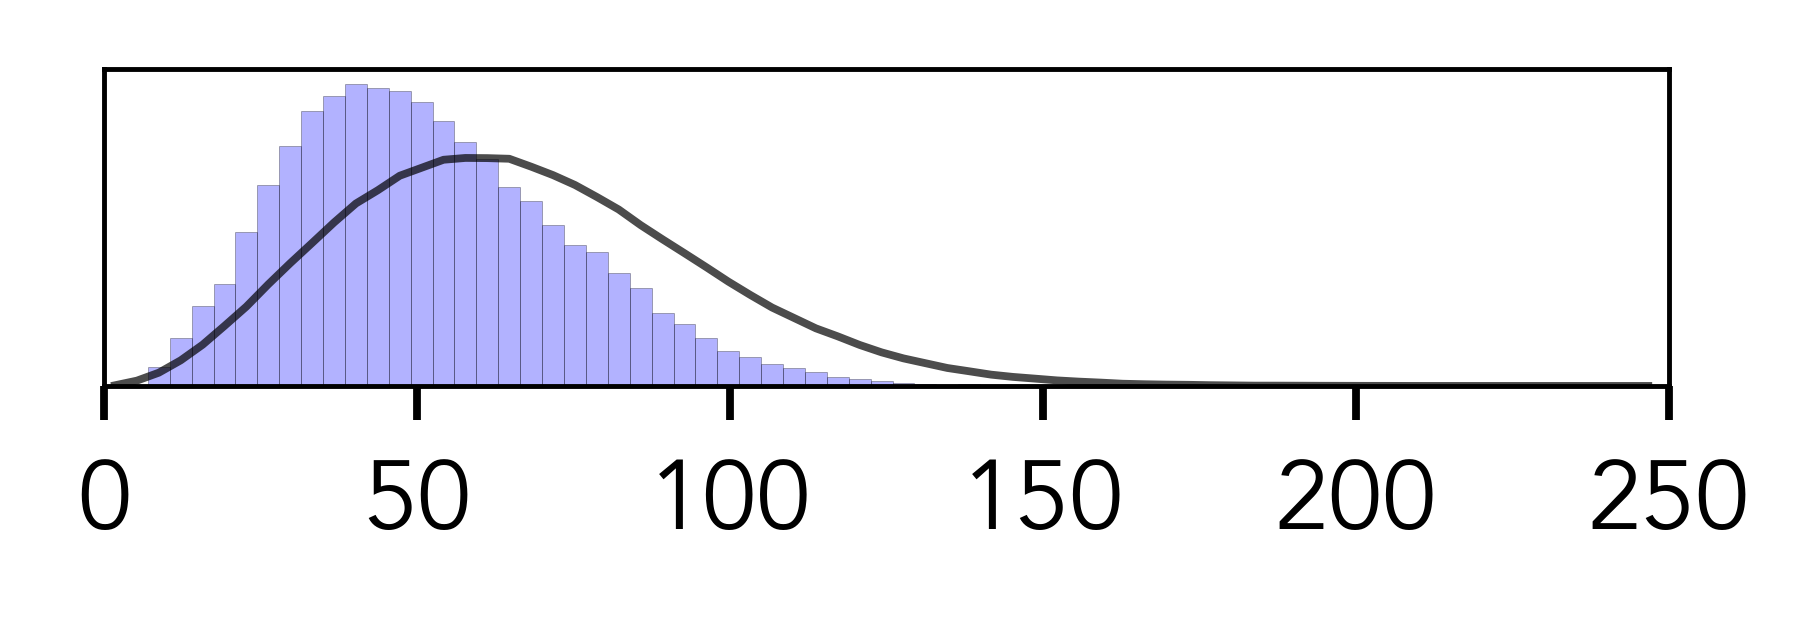

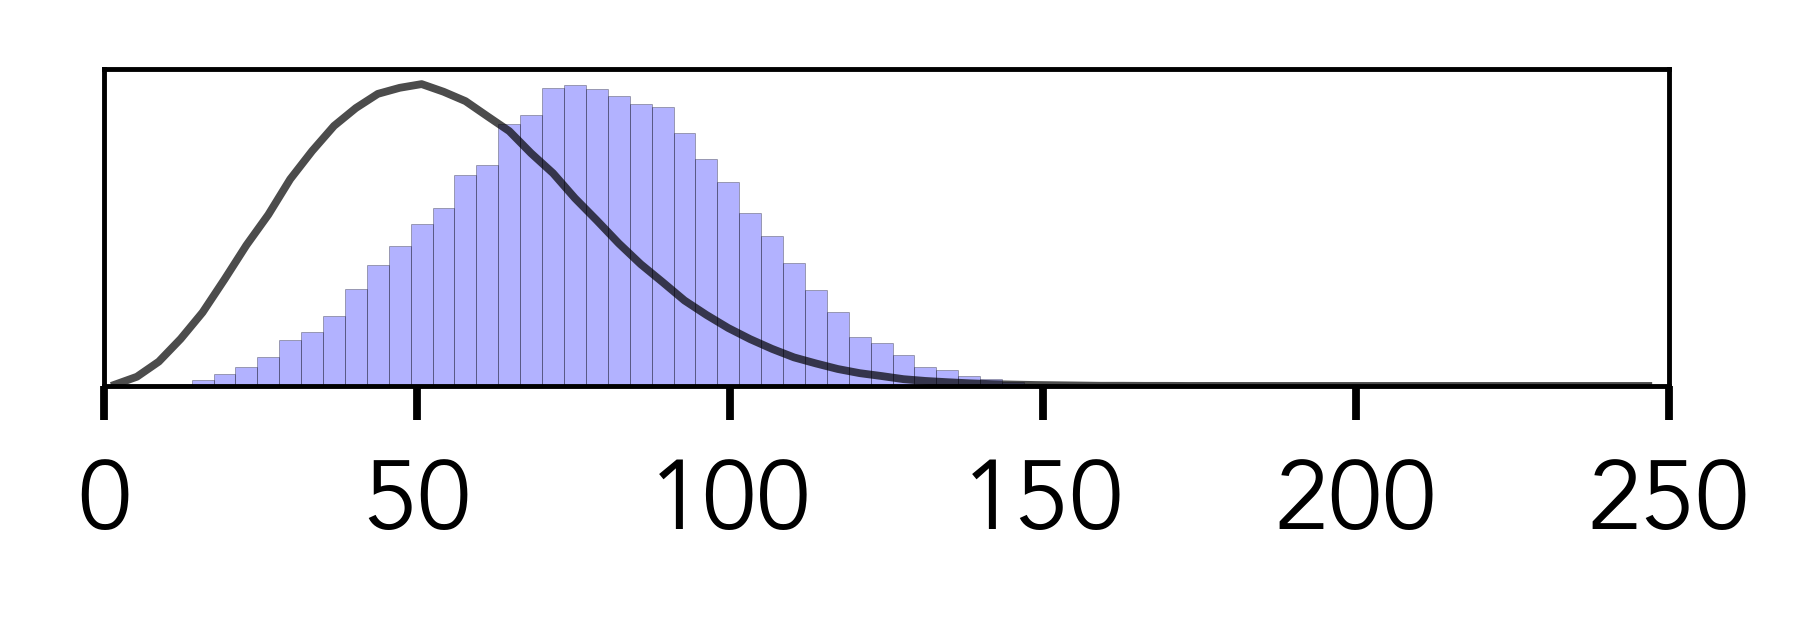

In [9]:

bin_width=3.5
max_val=250
bins = np.arange(0,max_val, bin_width)

count=1000000



for n in names:
    
    
    figure(None, (2.7,1), dpi=350)
    [counts_sim, b] = np.histogram(re[n], bins)
    plot_bins = (b+bin_width*0.5)[:-1]
    
    # afrc
    correction = len(re[n])/count
    synthetic_re = AnalyticalFRC(seqs[n]).sample_end_to_end_distribution(count)
    
    #
    [counts_afrc, b] = np.histogram(synthetic_re,bins)
    
    plt.bar(plot_bins, counts_sim, width=bin_width, color='blue', alpha=0.3,edgecolor='k', linewidth=0.1)
    #plt.plot(plot_bins, counts_sim,  color='black', alpha=0.4)
    plt.plot(plot_bins, (counts_afrc*correction),  color='k', alpha=0.7,linewidth=0.8)

    plt.xlim([0,250])
    plt.yticks([])

    plt.tight_layout()
    
    
    
    plt.savefig(f'figures/re_panel_{n}.pdf')


/var/folders/2n/xtzsyspd32v6vglg_pd5gmw80000gn/T/ipykernel_58451/3091940442.py:17: RuntimeWarning: invalid value encountered in true_divide
  scaling_map = dm[n]/synthetic_dm
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


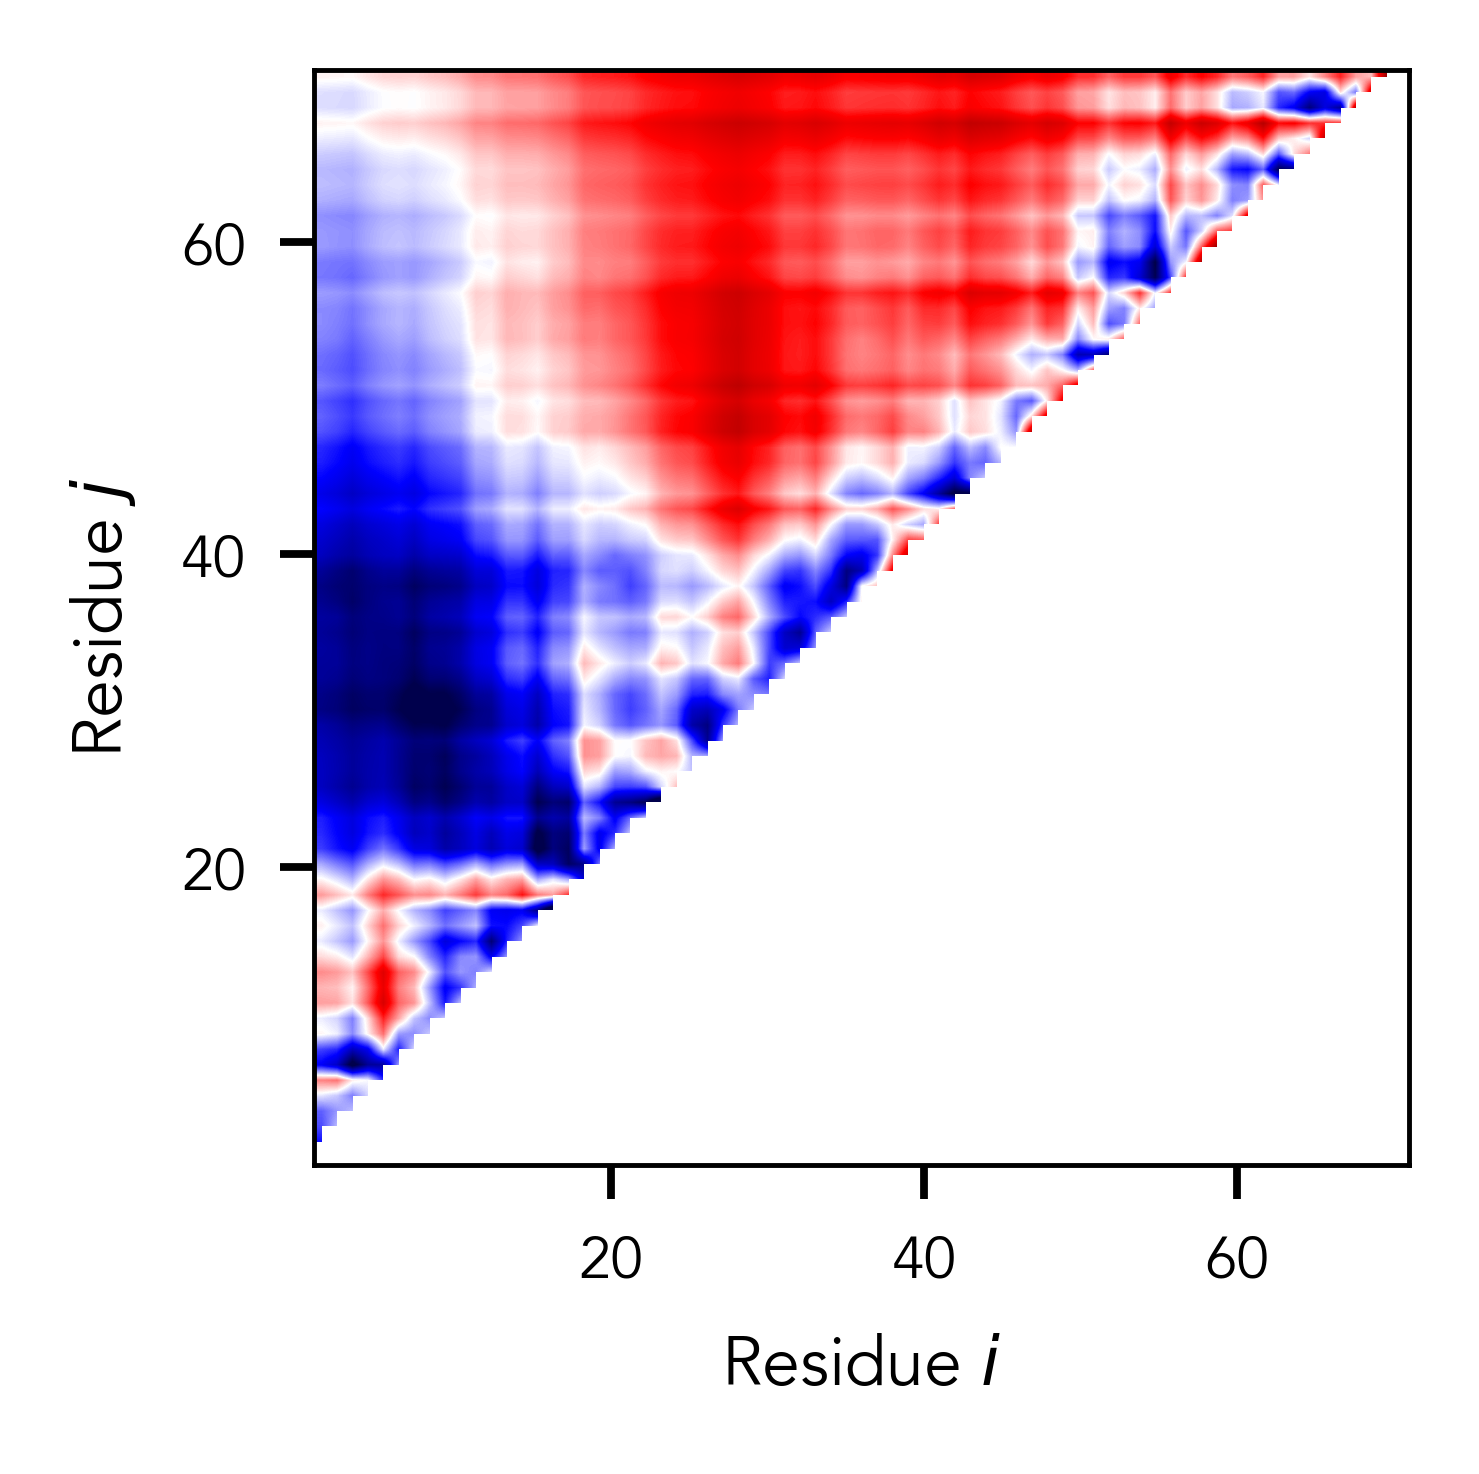

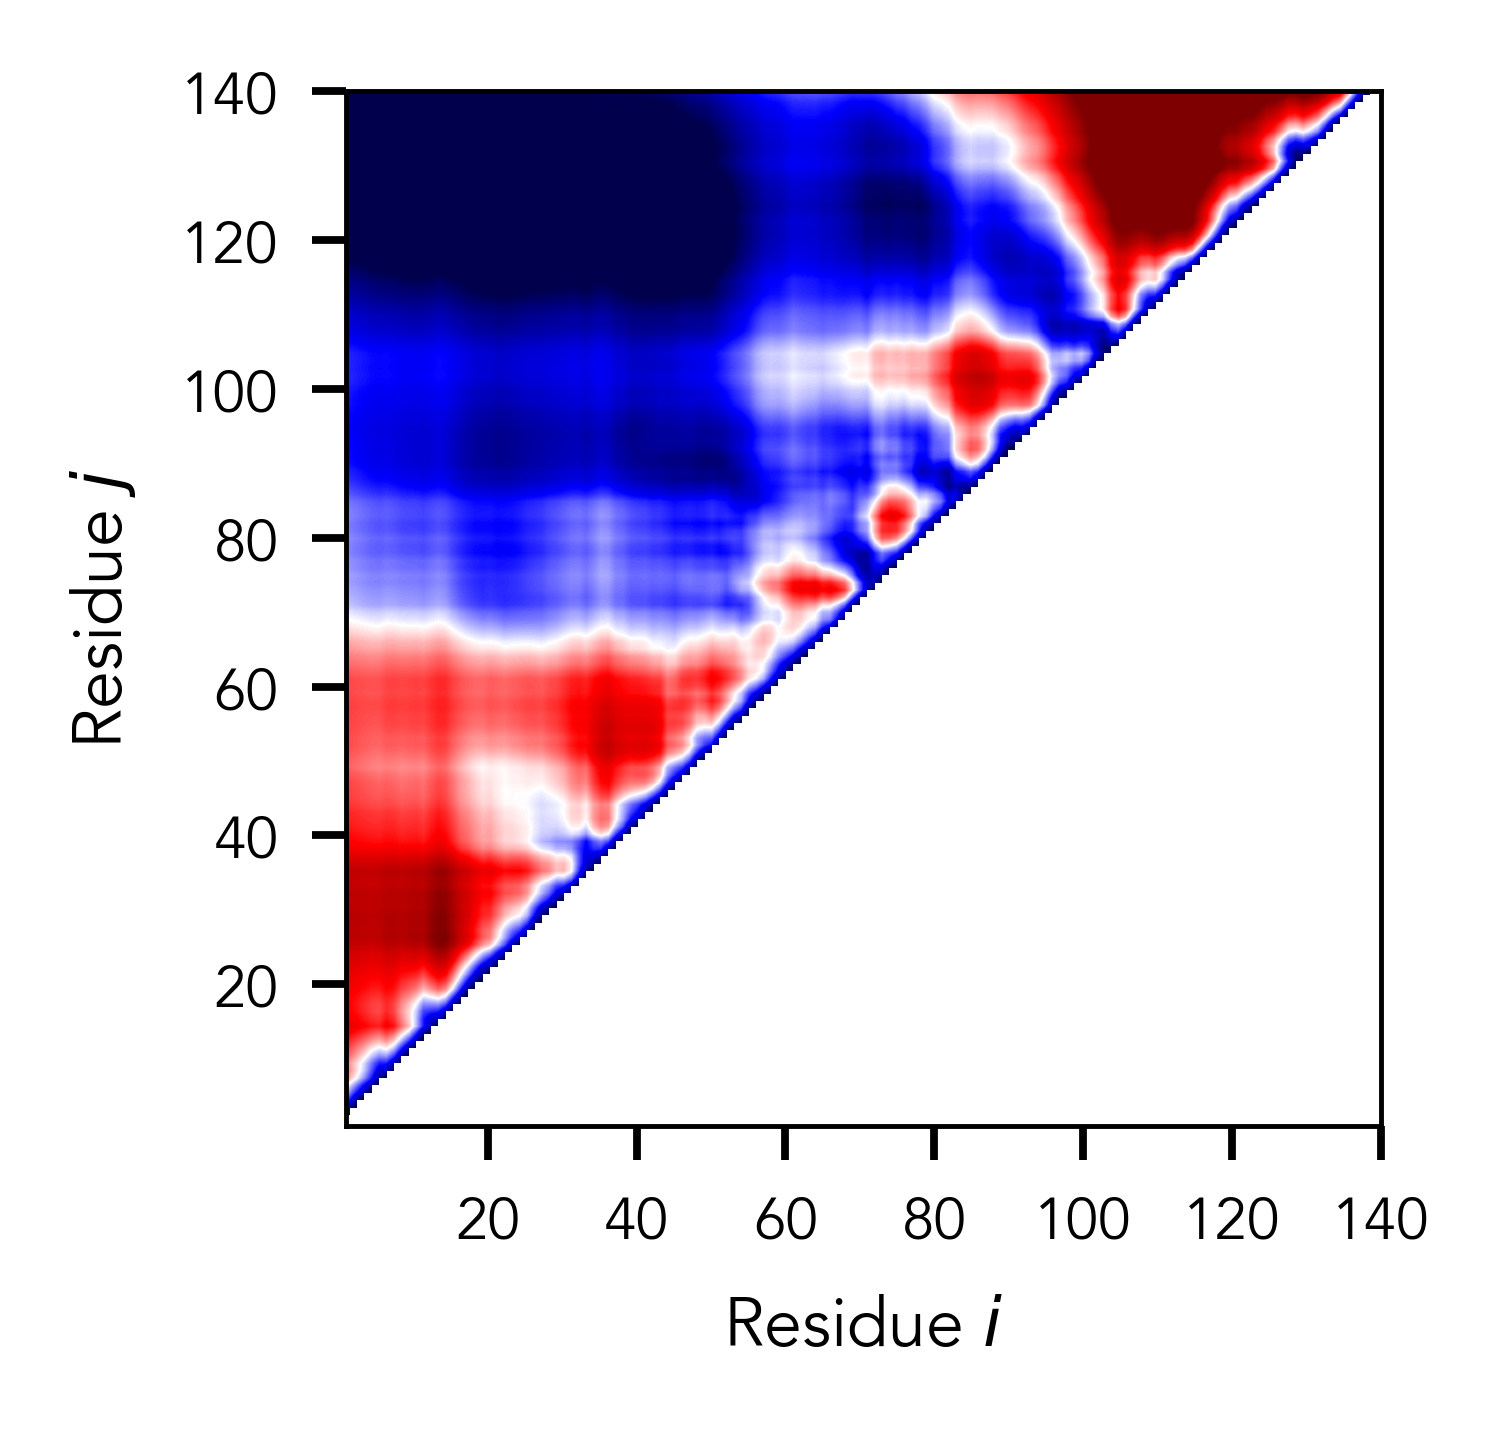

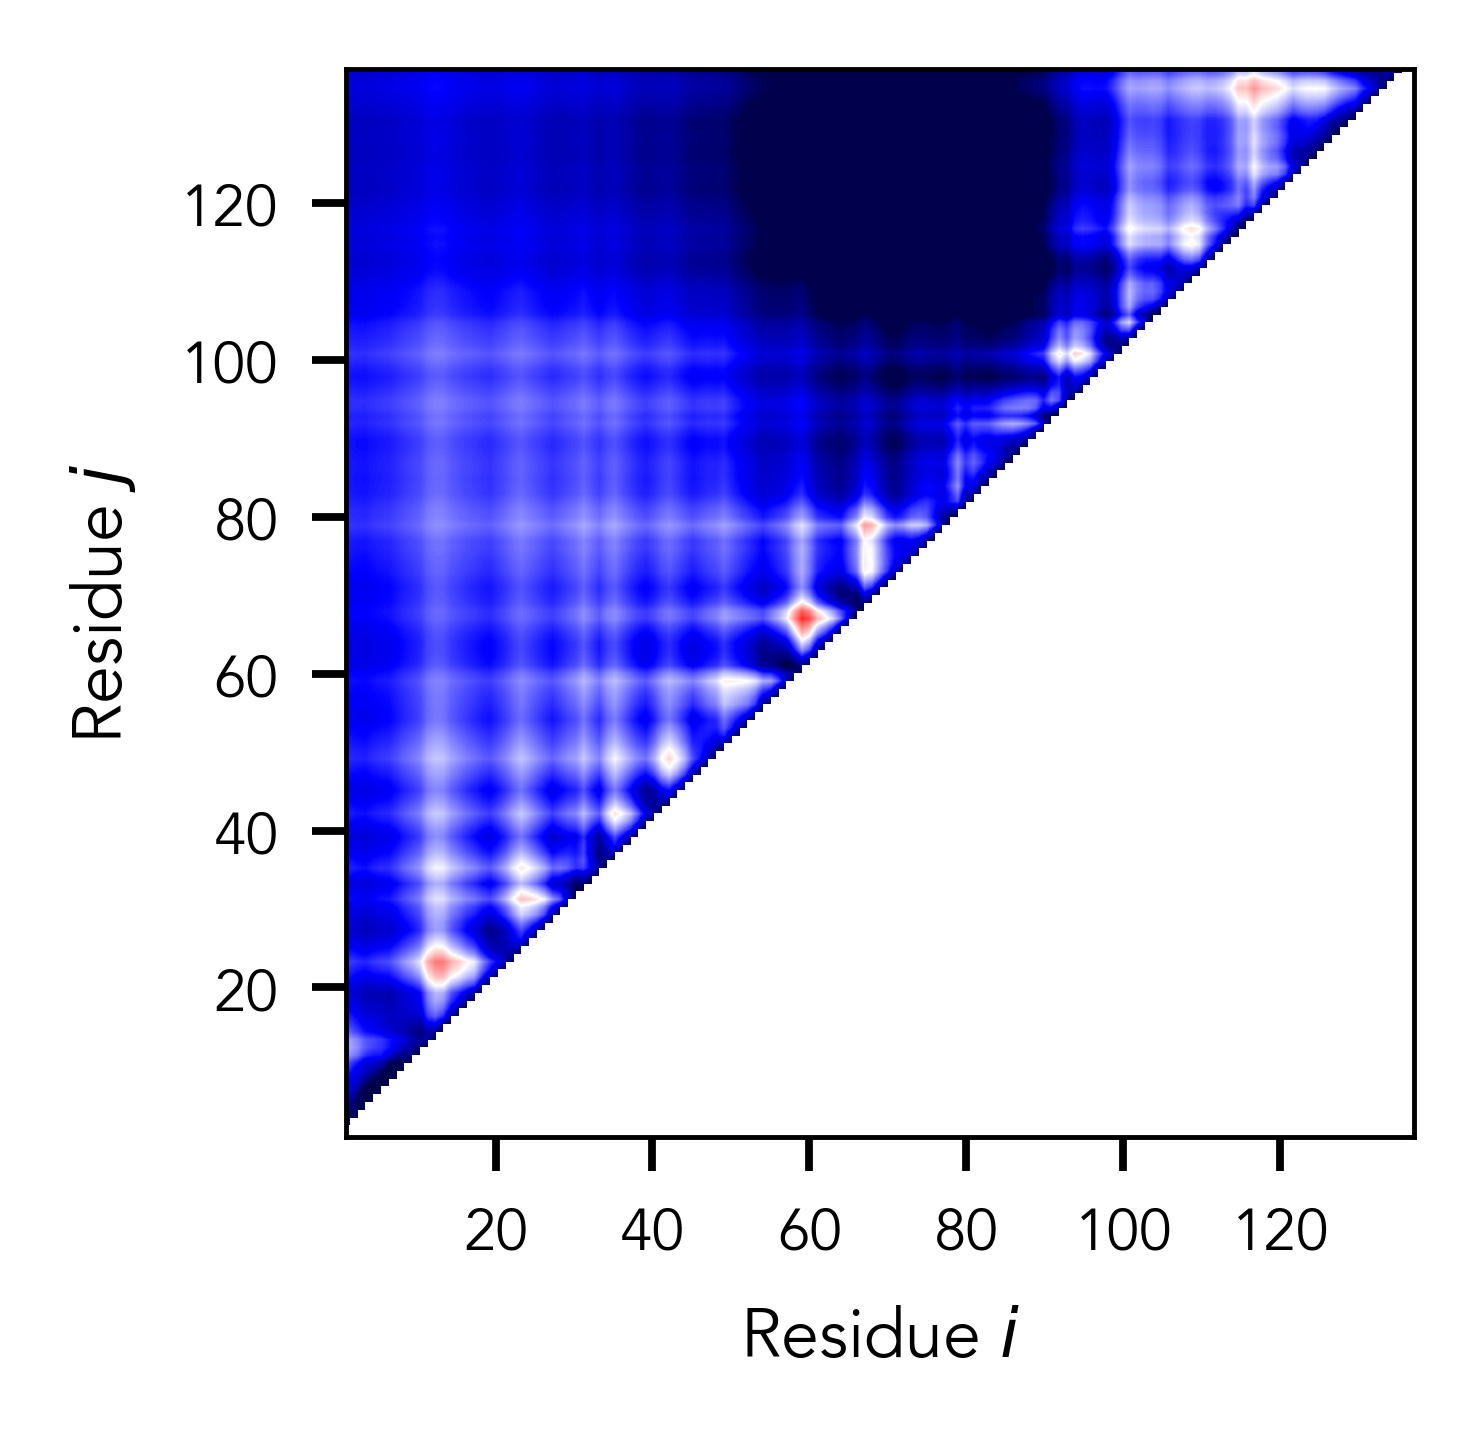

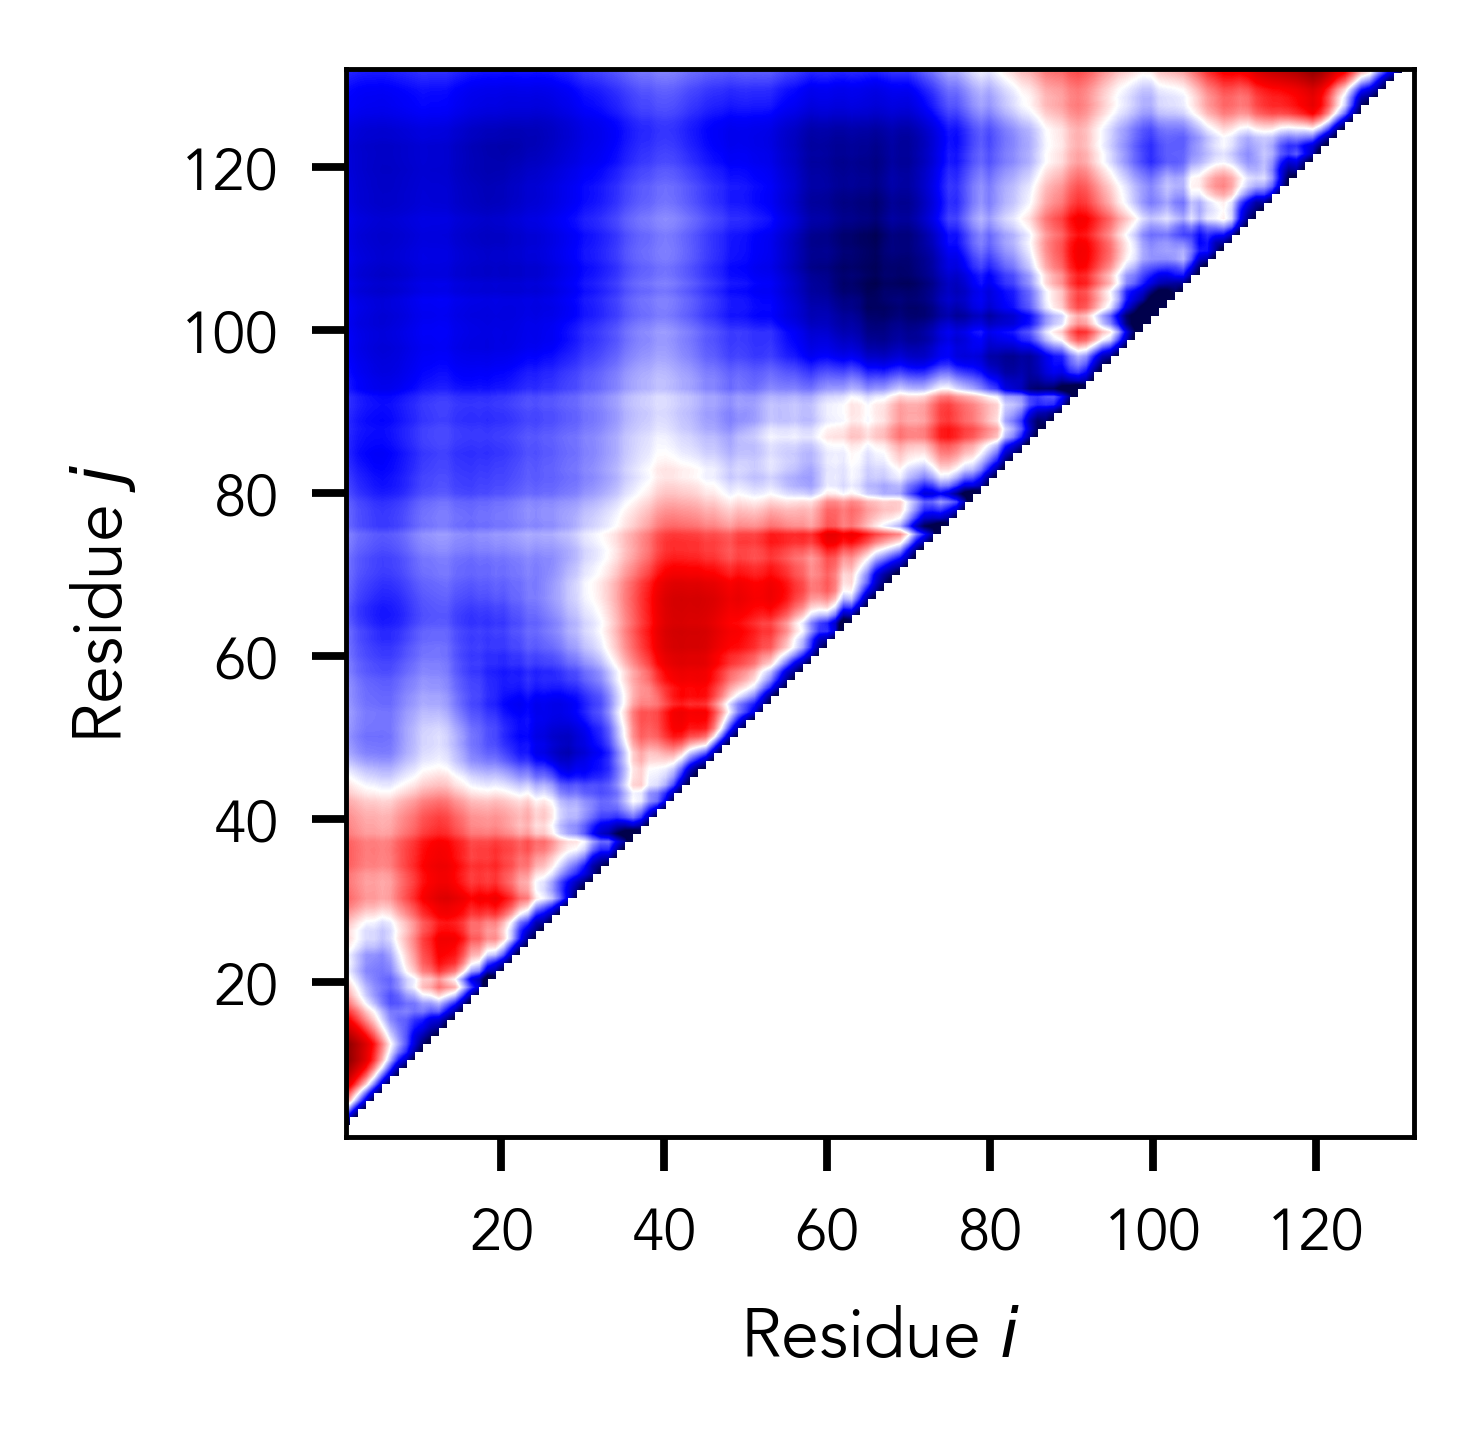

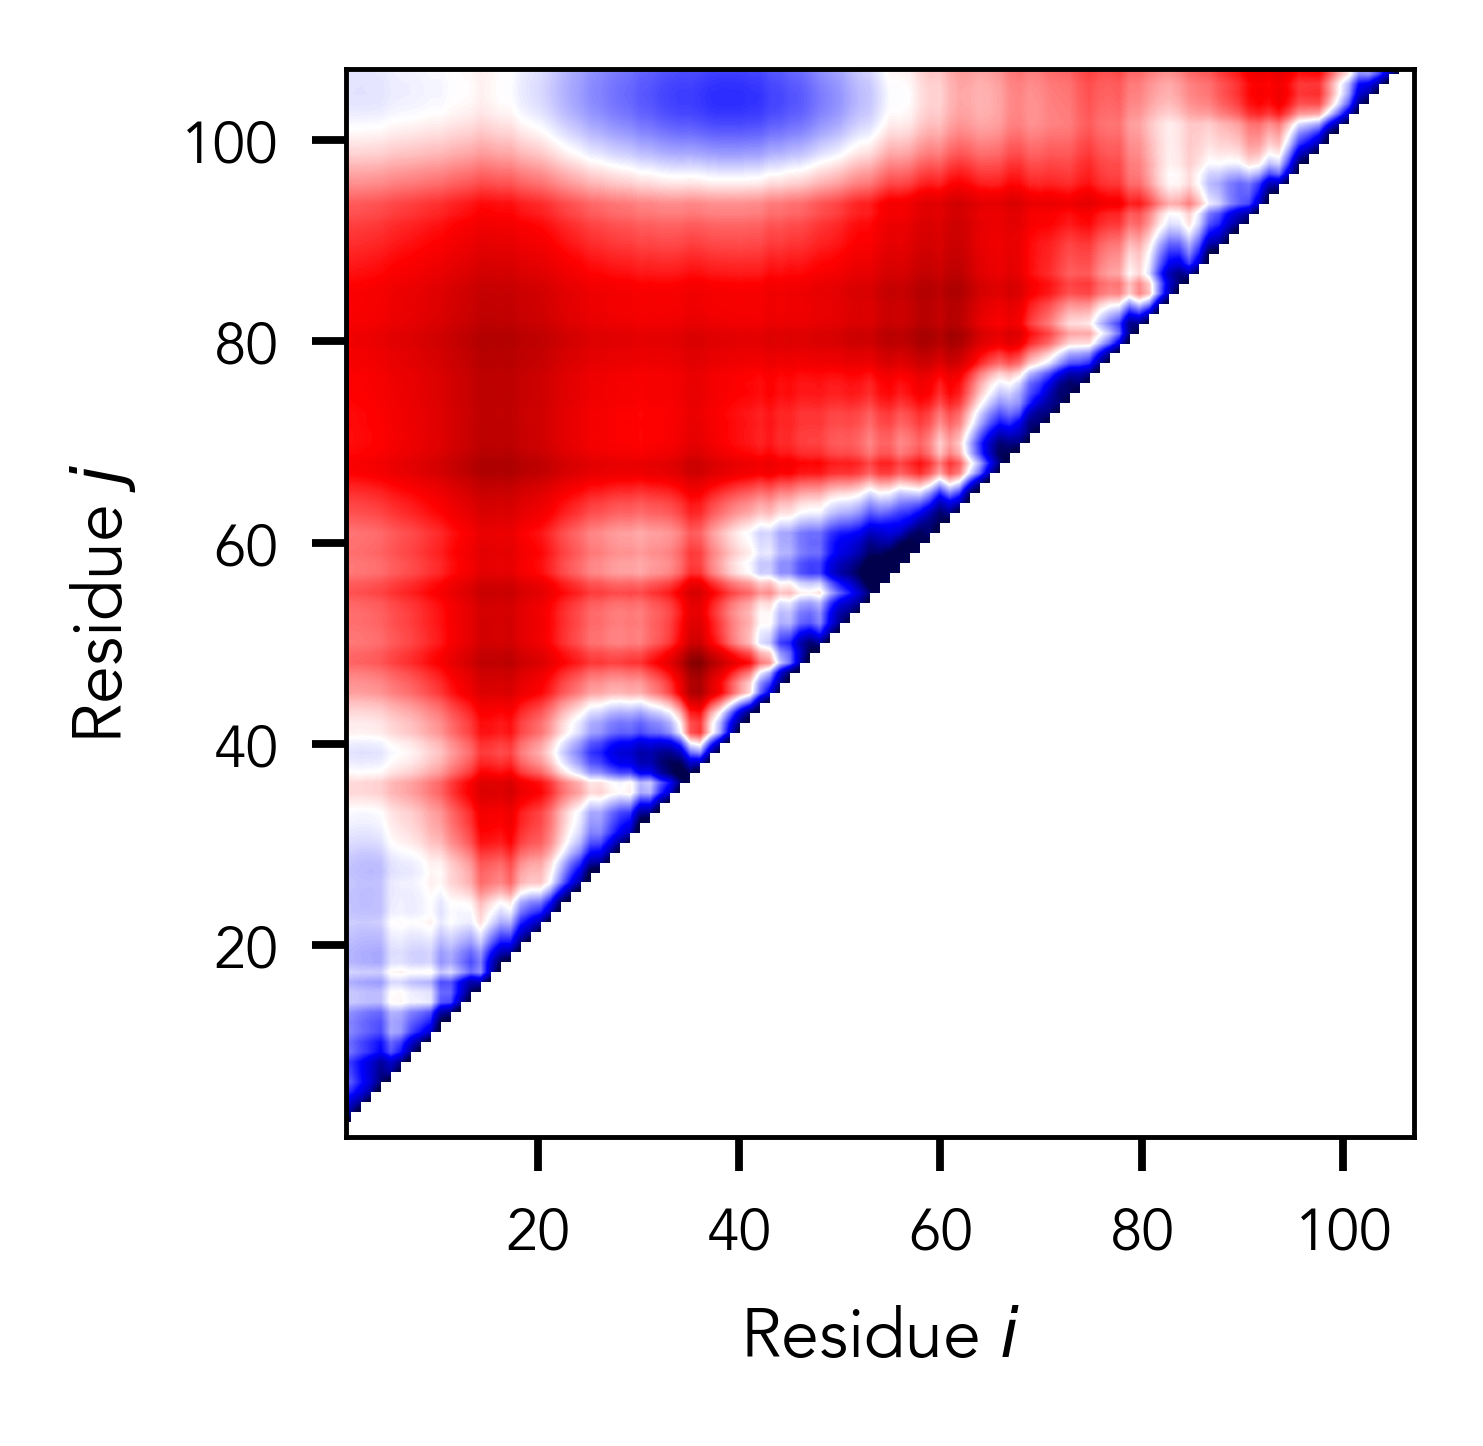

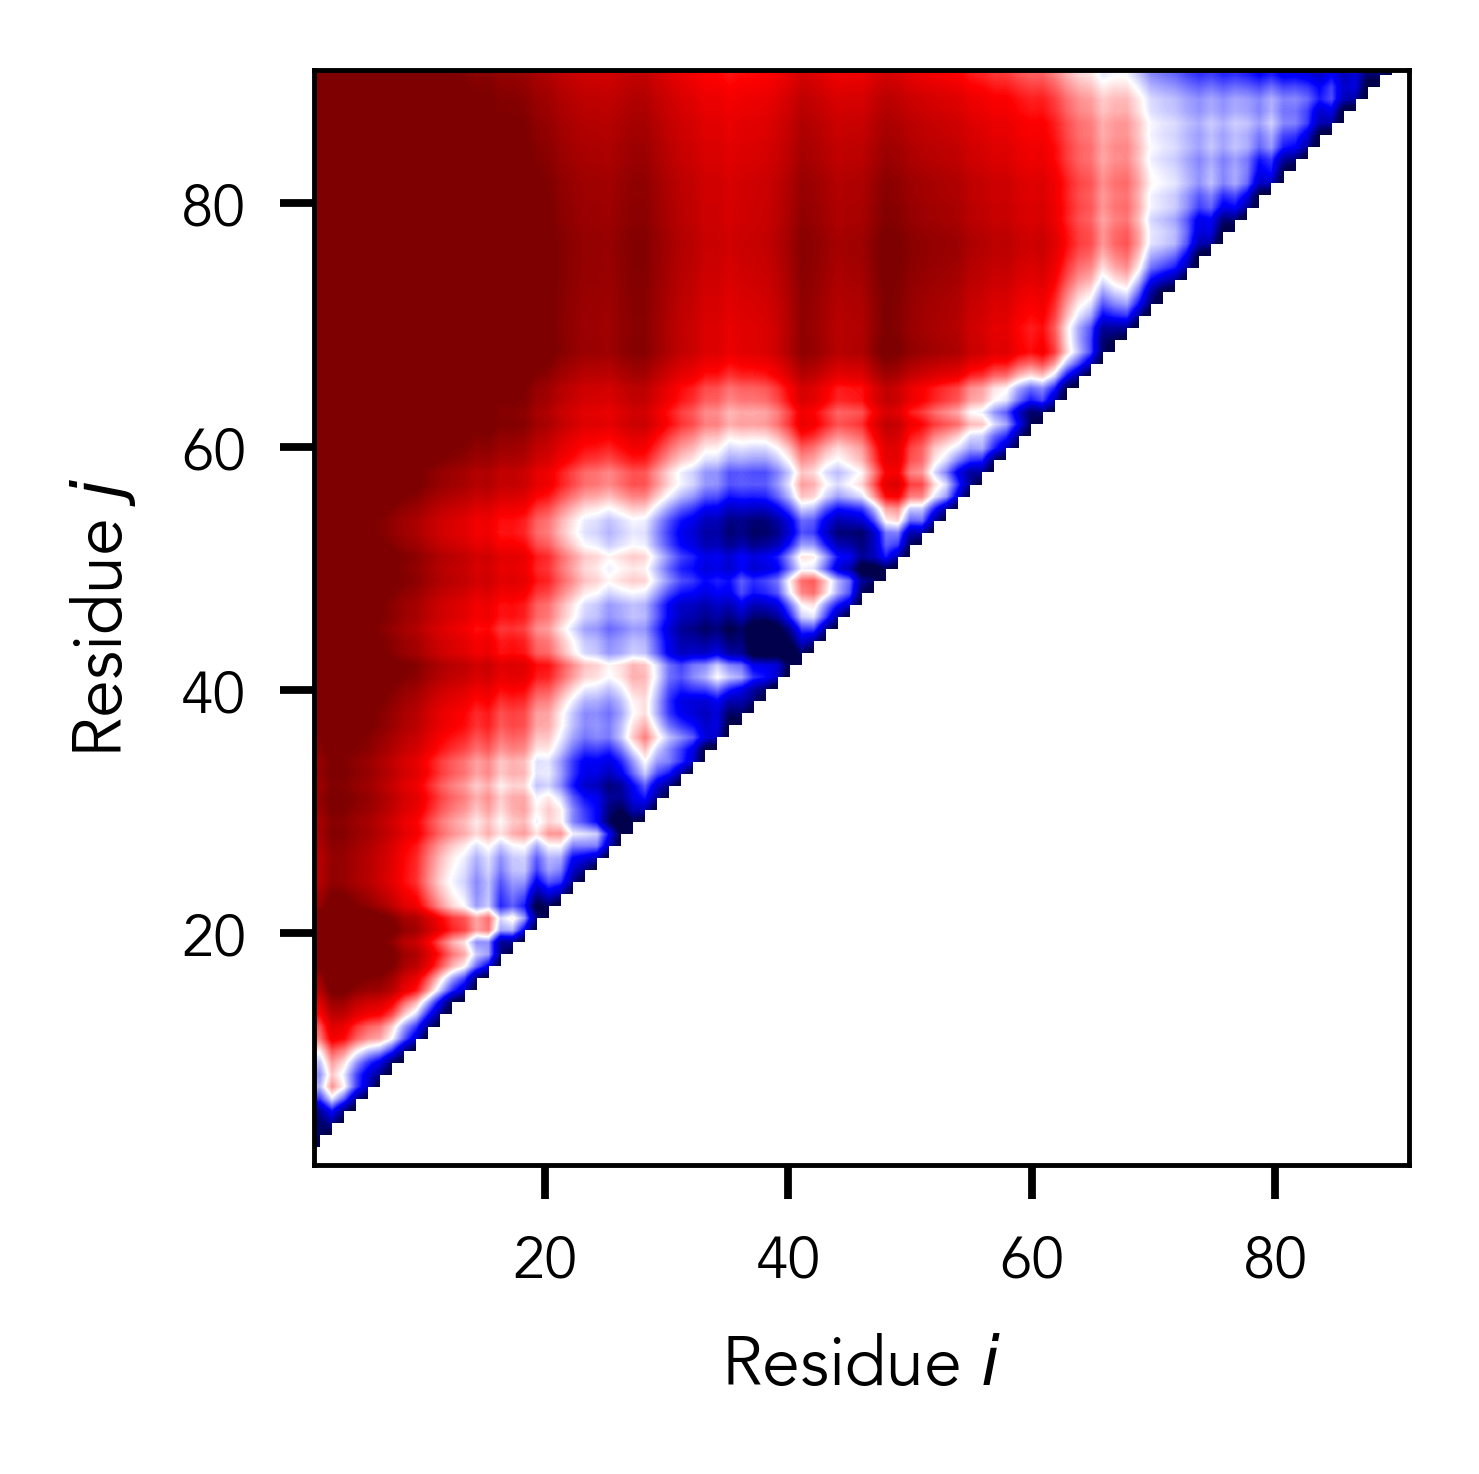

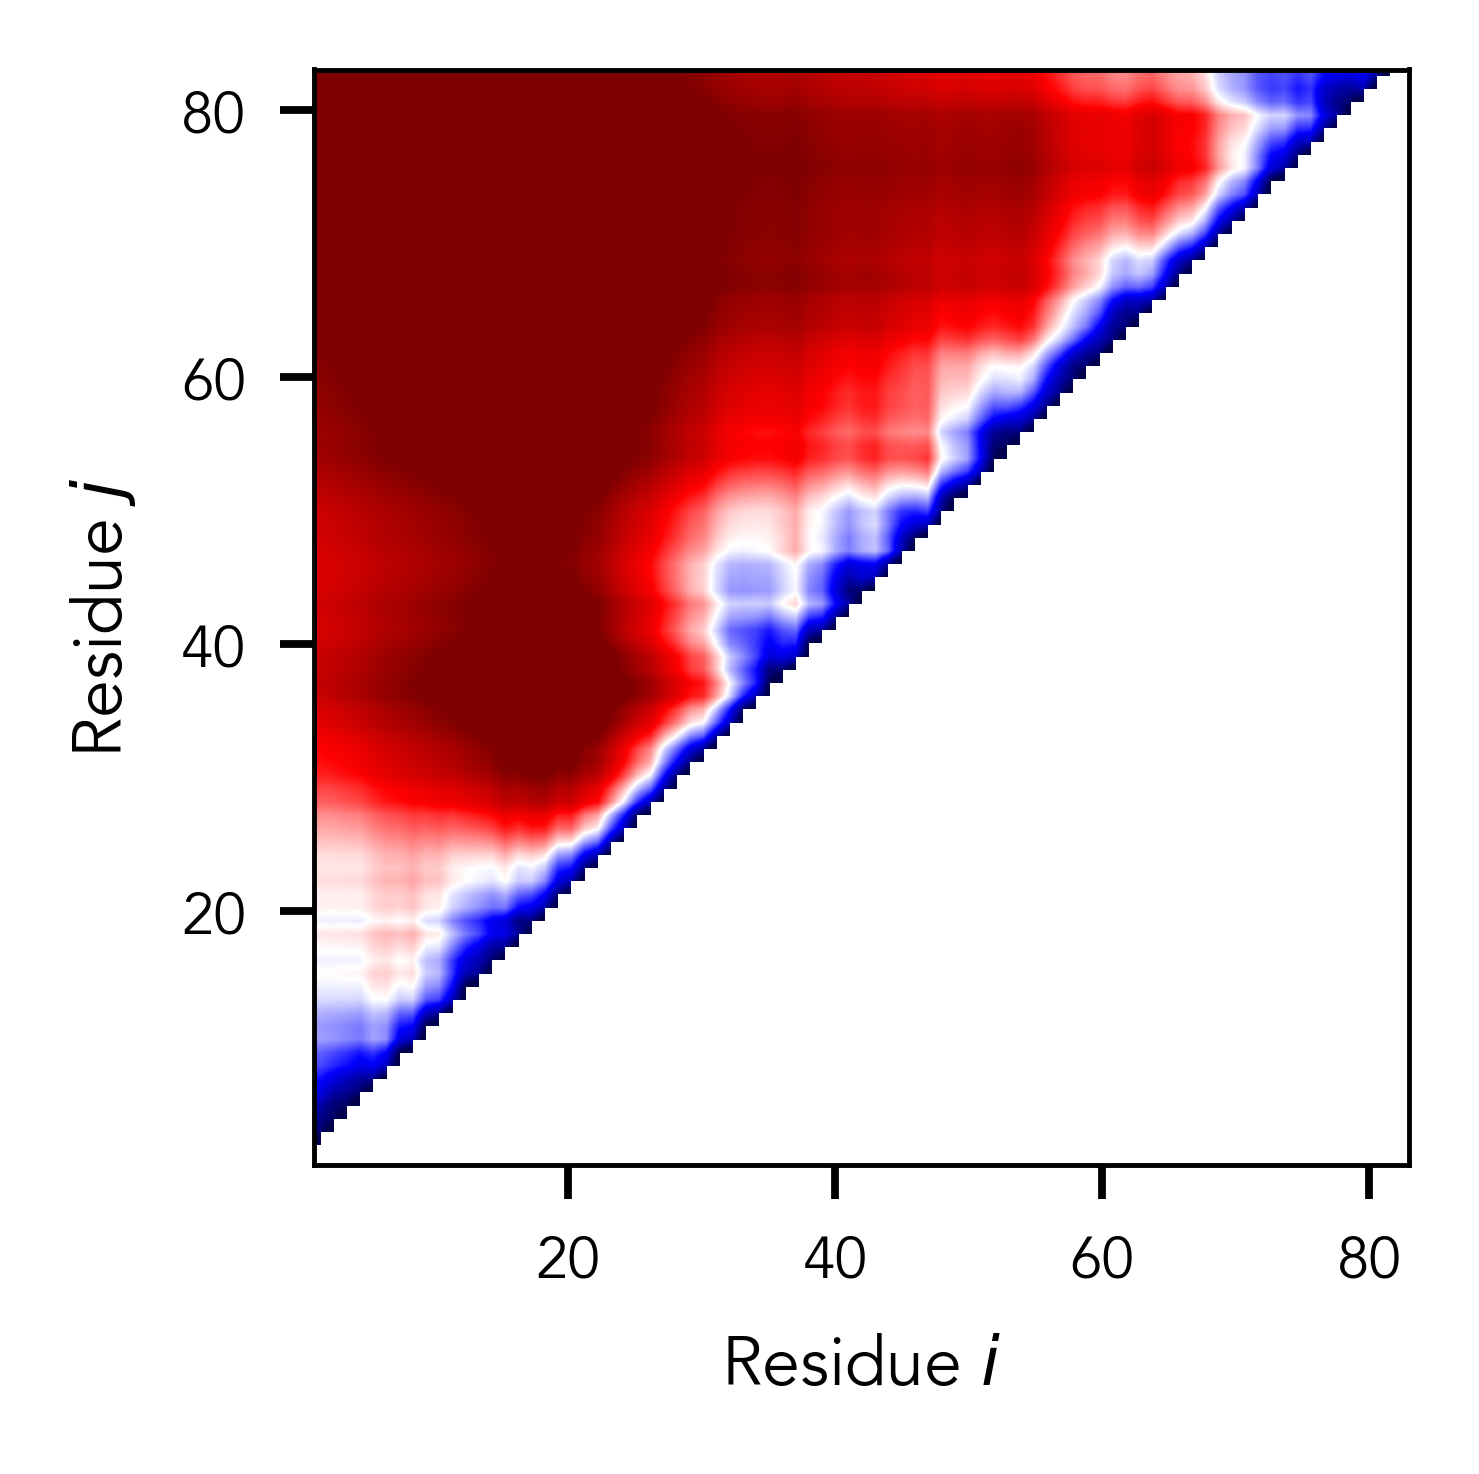

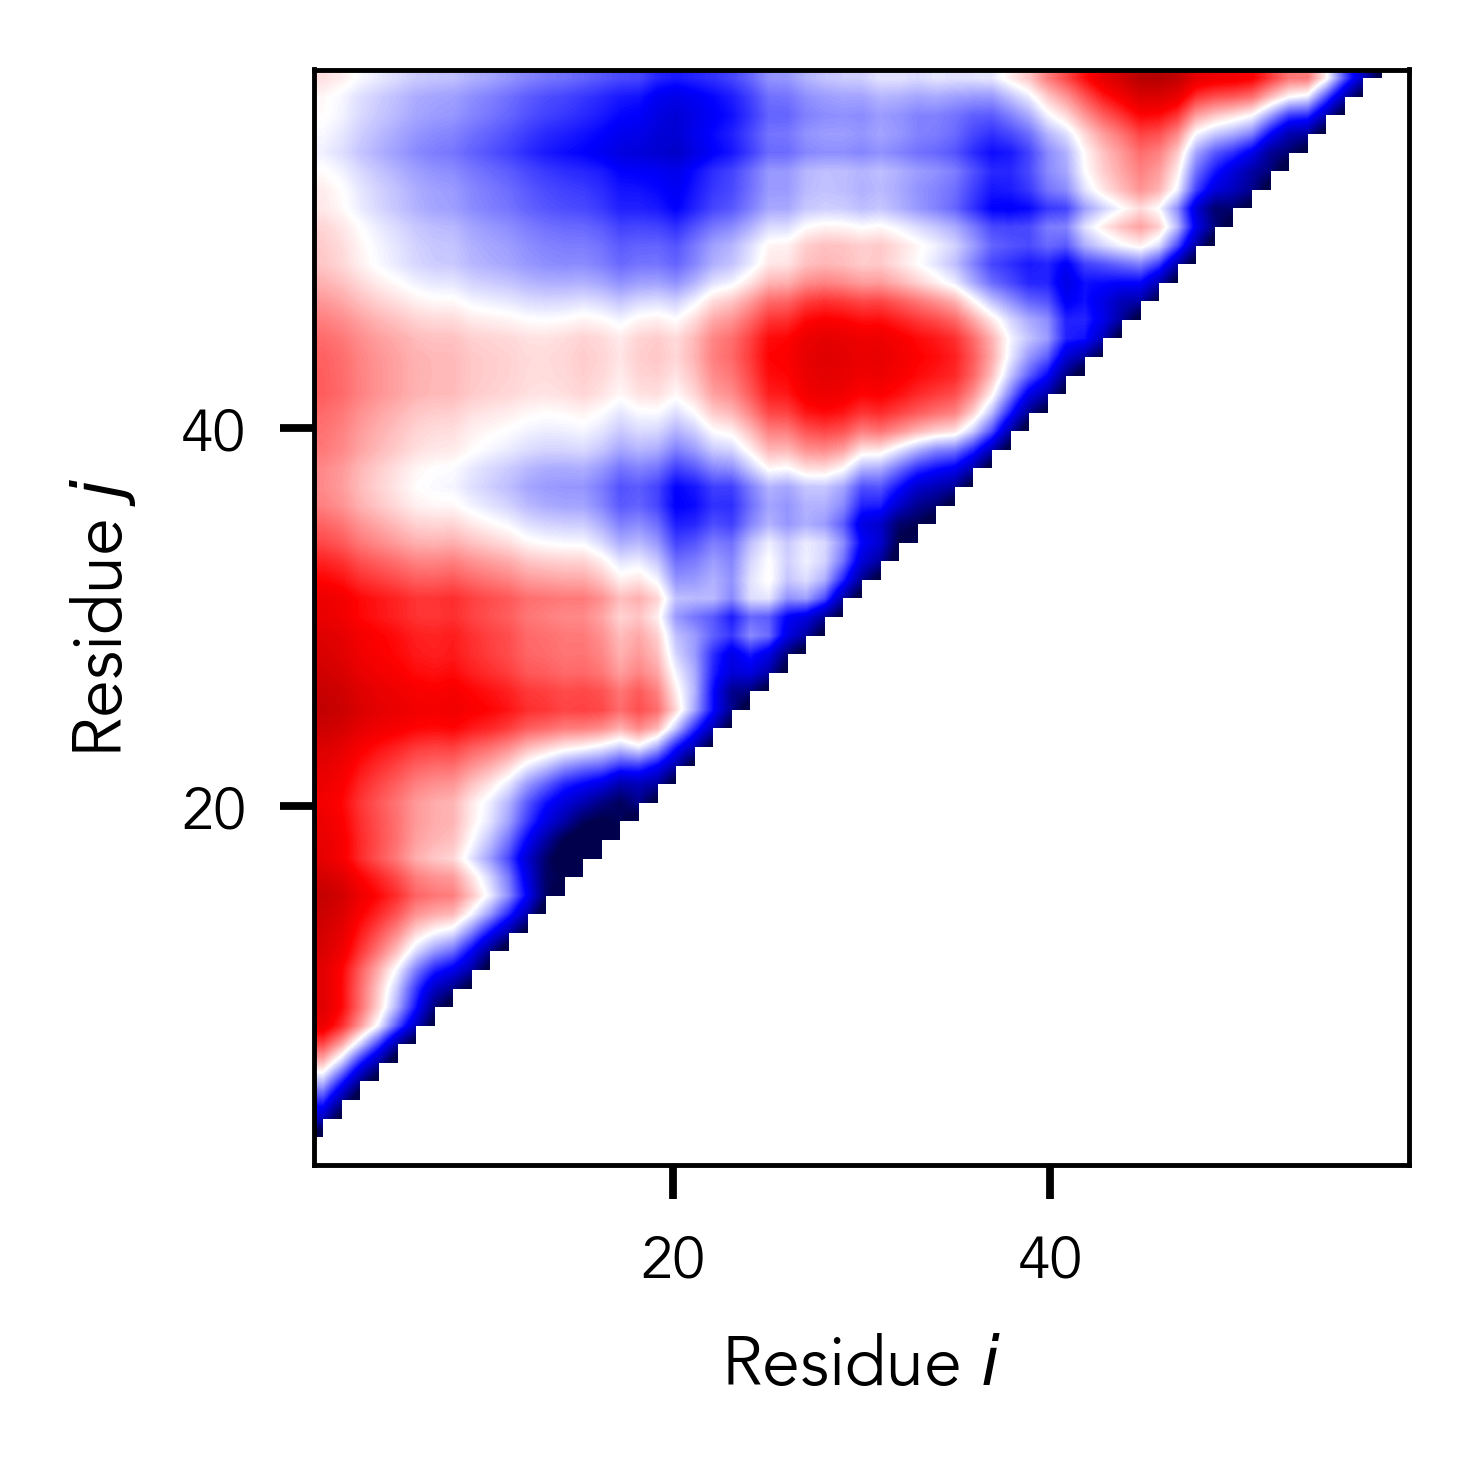

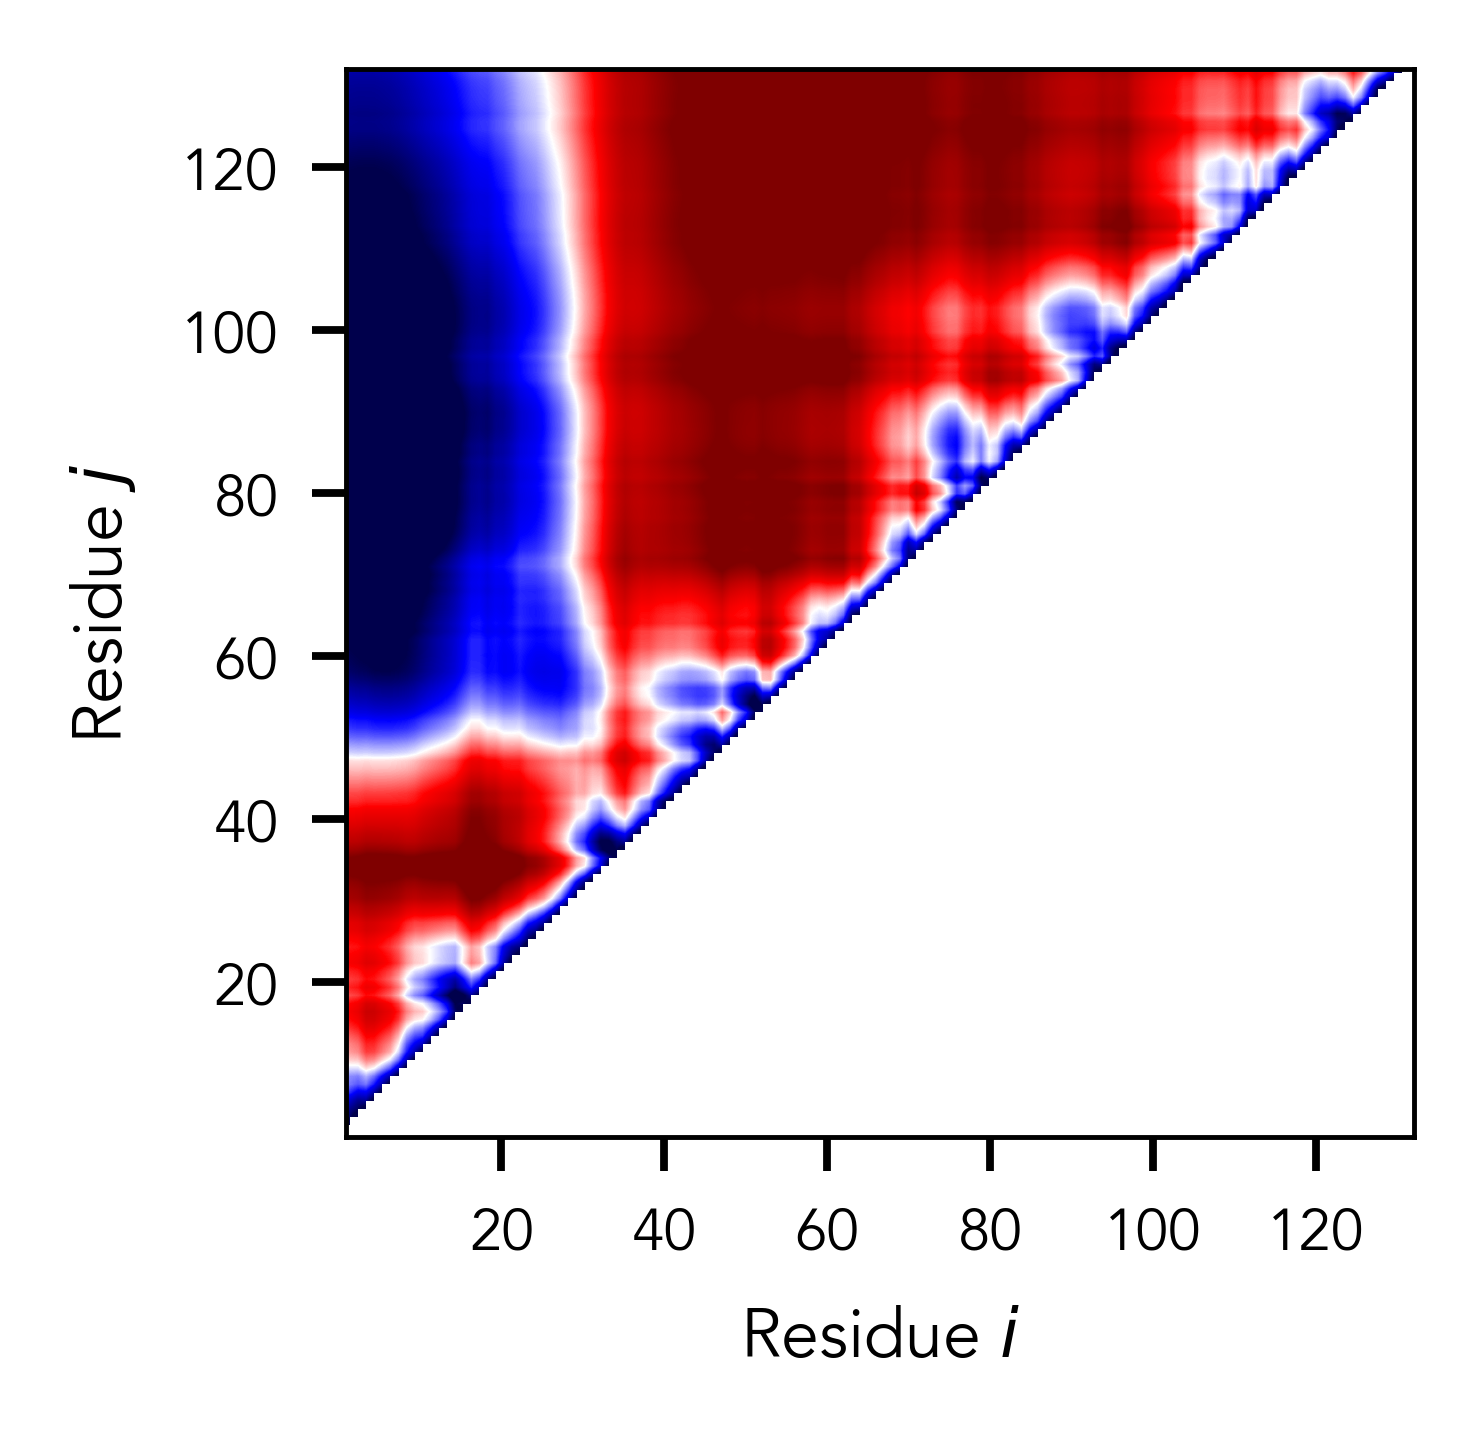

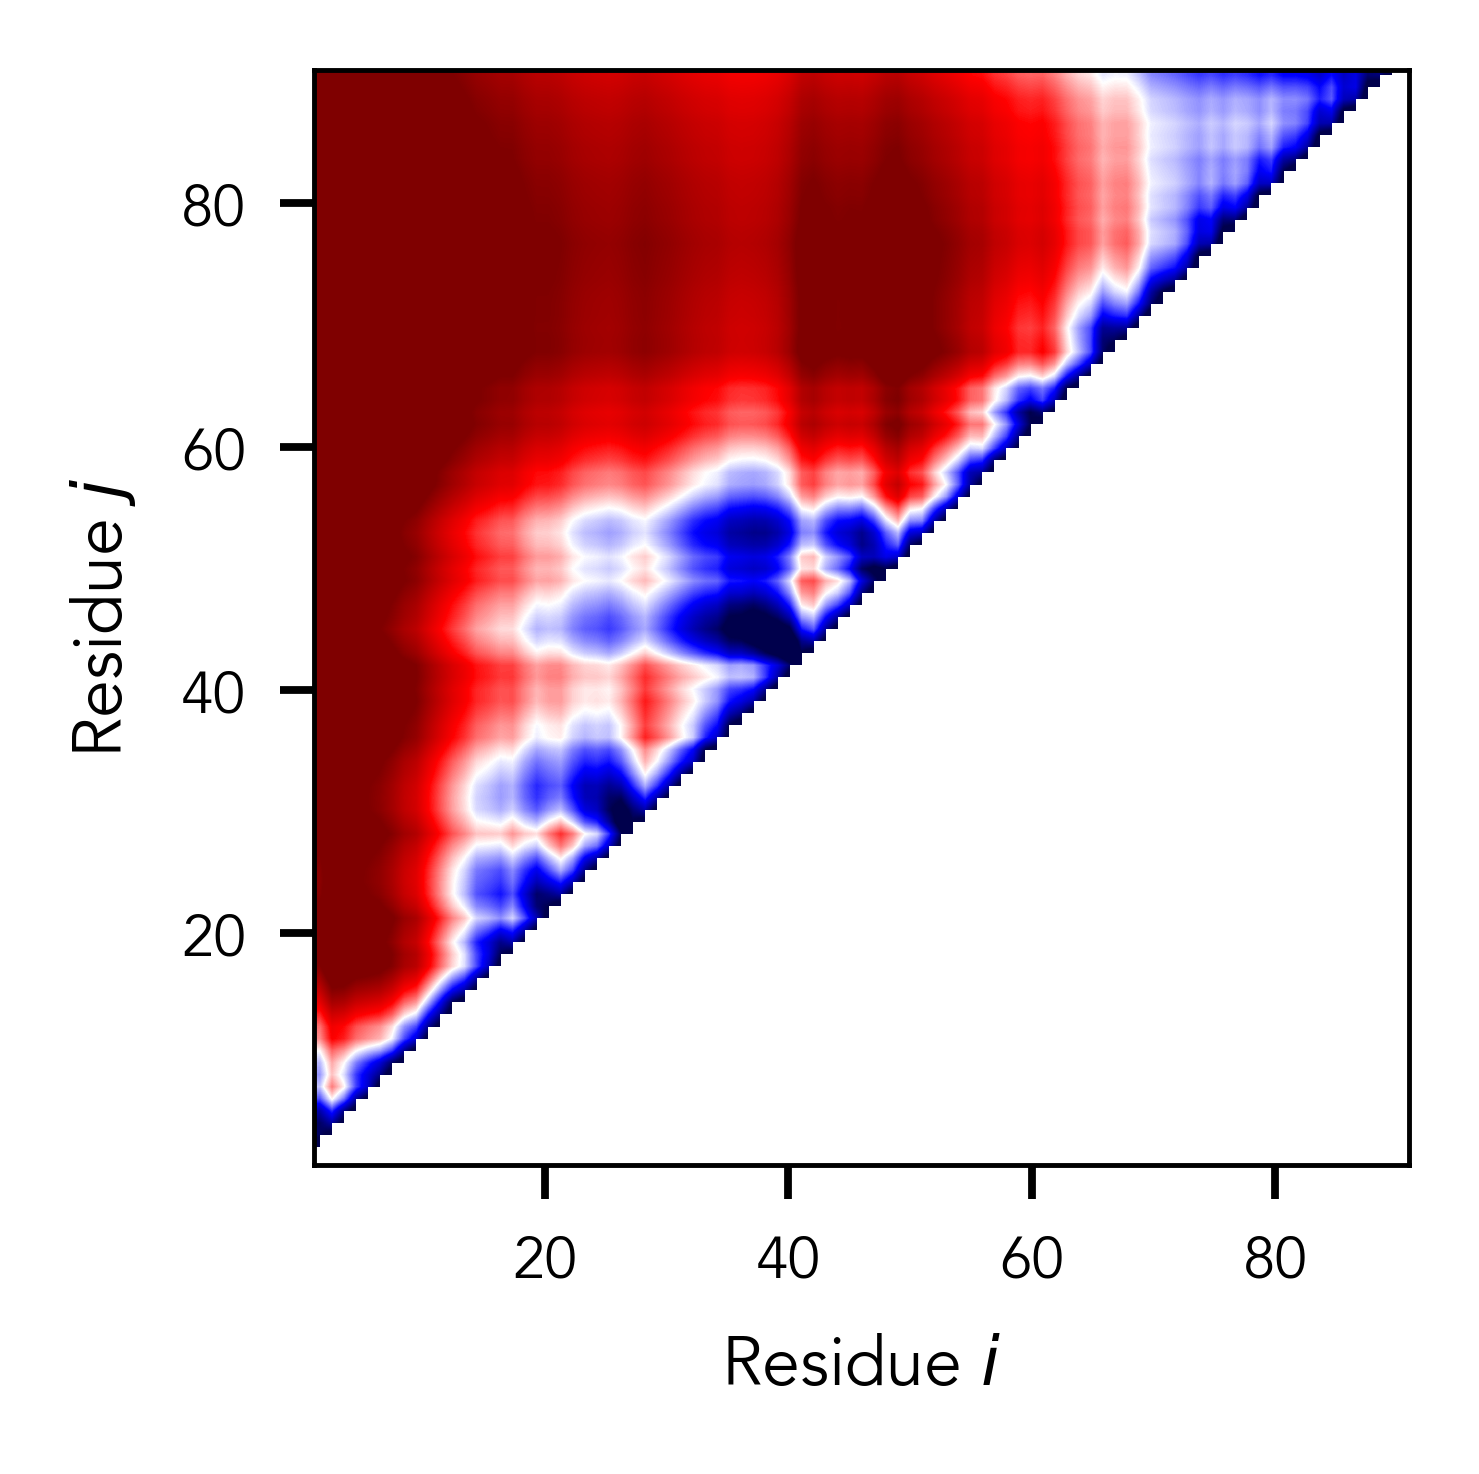

In [10]:

bin_width=3.5
max_val=250
bins = np.arange(0,max_val, bin_width)

count=1000000



for n in names:
    
    
    fig = figure(None, (2.2,2.2), dpi=350)
    
    
    synthetic_dm = AnalyticalFRC(seqs[n]).get_distance_map()
    
    scaling_map = dm[n]/synthetic_dm
    
    
    ax_list = fig.axes


    # we define max extent for using plt.imshow. This basically sets the number of residues
    max_extent = scaling_map.shape[0]

    # transpose this so the final figures follow convention
    scaling_map_tranposed = scaling_map.transpose()

    # we build a masked array for figure generation
    masked_array = np.ma.masked_where(scaling_map_tranposed == 0, scaling_map_tranposed)

    ## By convention we also want to create a color map that is reflective around 0 but also
    # shows the 'bad' values as white. Bad here just reflects values where we don't have data (i.e.) bottom
    # right triangle of the evntual figure
    # create a copy of the colormap

    # the defauly colourmap we use s seismic, but, there are MANY possible options - see
    # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
    cmap = copy.copy(matplotlib.cm.get_cmap("seismic"))
    cmap.set_bad(color='white')

    # generate the figure! The main thing you may want to mess with here are vmax and vmin, which define the range
    # over which the color scheme is defined. In a perfect world white = 1.0 and blue < 1 and red > 1, BUT sometims
    # this isn't feasible, in which case a linear color map (i.e. blue to red) might be preferable. Use your discretion 
    # here as needed!


    im = plt.imshow(masked_array, cmap=cmap, interpolation='bilinear',
                       origin='lower', extent=[1, max_extent, 1, max_extent],
                       vmax=1.3, vmin=0.7)


    plt.xlabel('Residue $i$', fontsize=7)
    plt.ylabel('Residue $j$', fontsize=7)

    # by defaulty we show tickmarks every 20 residues, but, YMMV in terms of what works best for your data
    plt.xticks(np.arange(0, scaling_map.shape[0]+1, 20),fontsize=6)
    plt.yticks(np.arange(0, scaling_map.shape[0]+1, 20),fontsize=6)

    plt.xlim([1,max_extent])
    plt.ylim([1,max_extent])


    #ax = plt.gca()
    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes("right", size="5%", pad=0.05)
    #cb = plt.colorbar(cax=cax)
    #cb.set_label('Normalized distance')

    # include this to stop matplotlib being dumb and chopping off axes info...
    plt.tight_layout()

    #plt.savefig('figures/scaling_map_1.pdf')
    
    plt.savefig(f'figures/dm_panel_{n}.pdf')


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


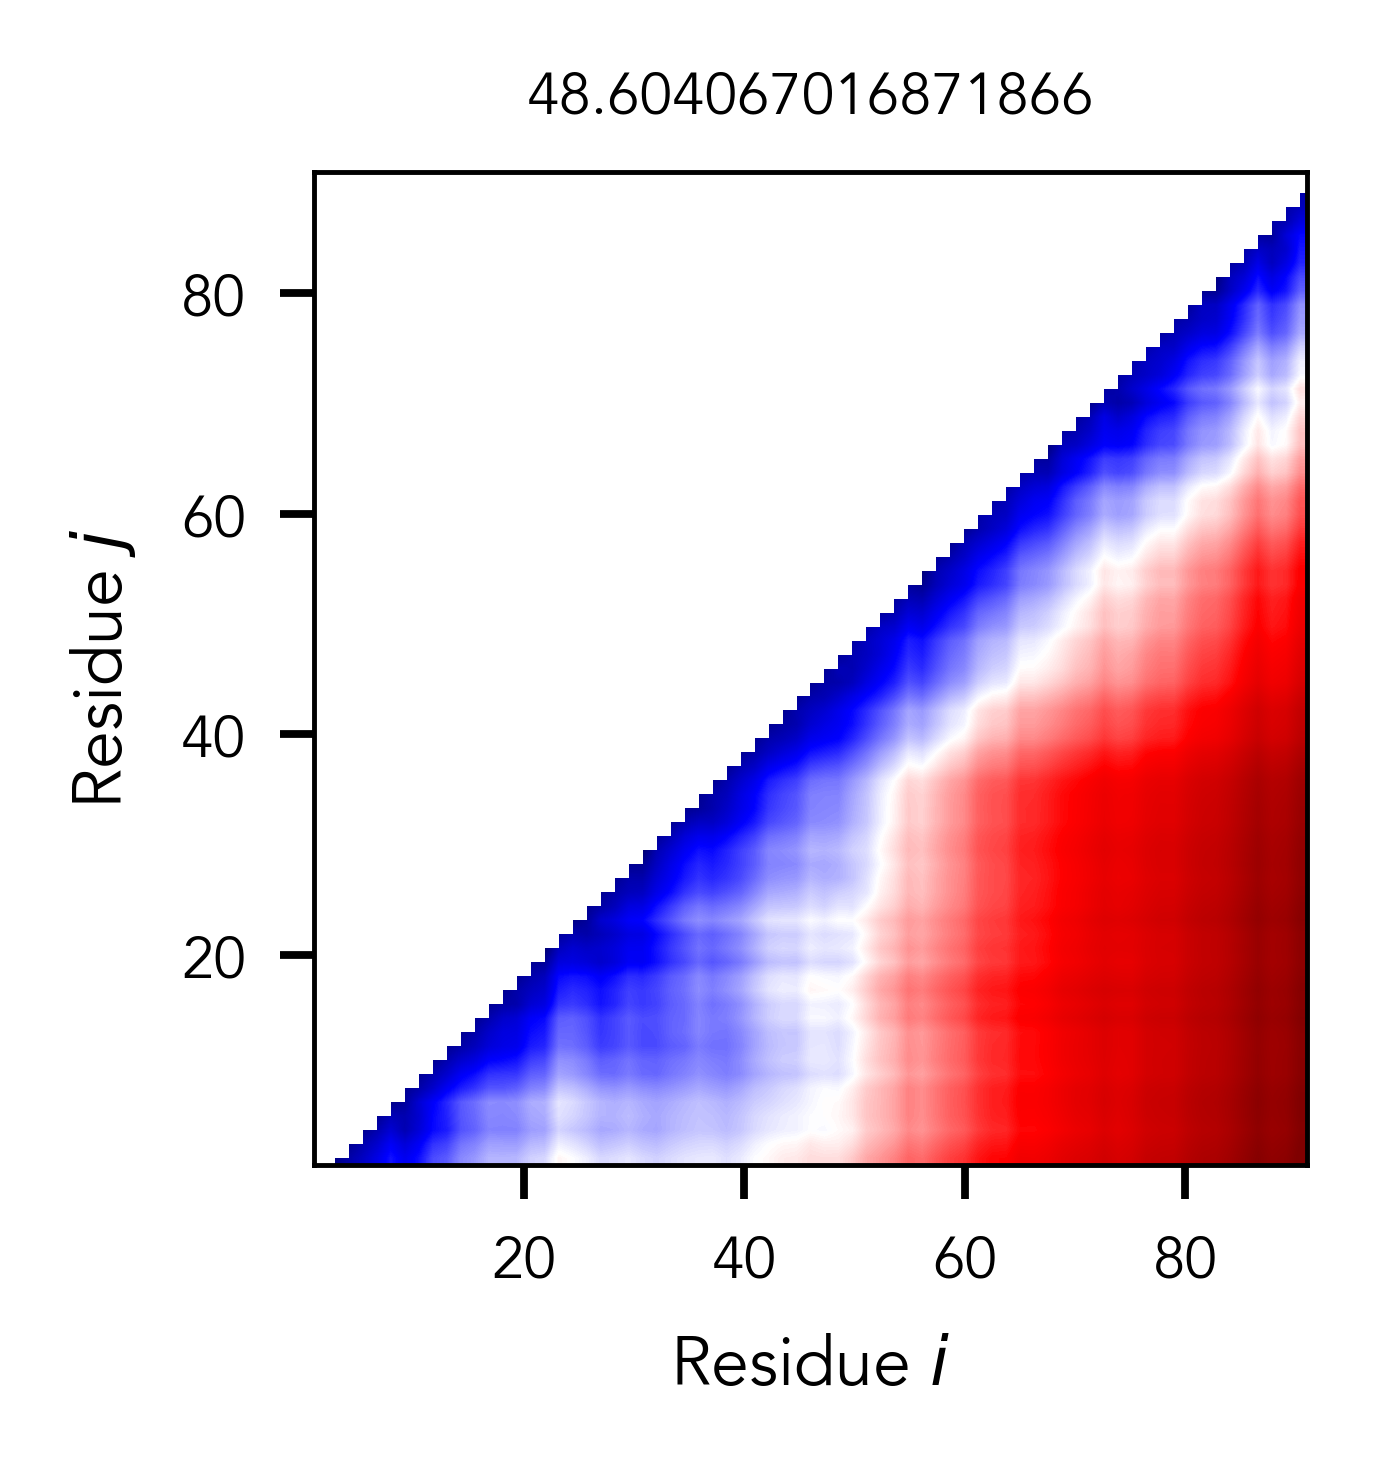

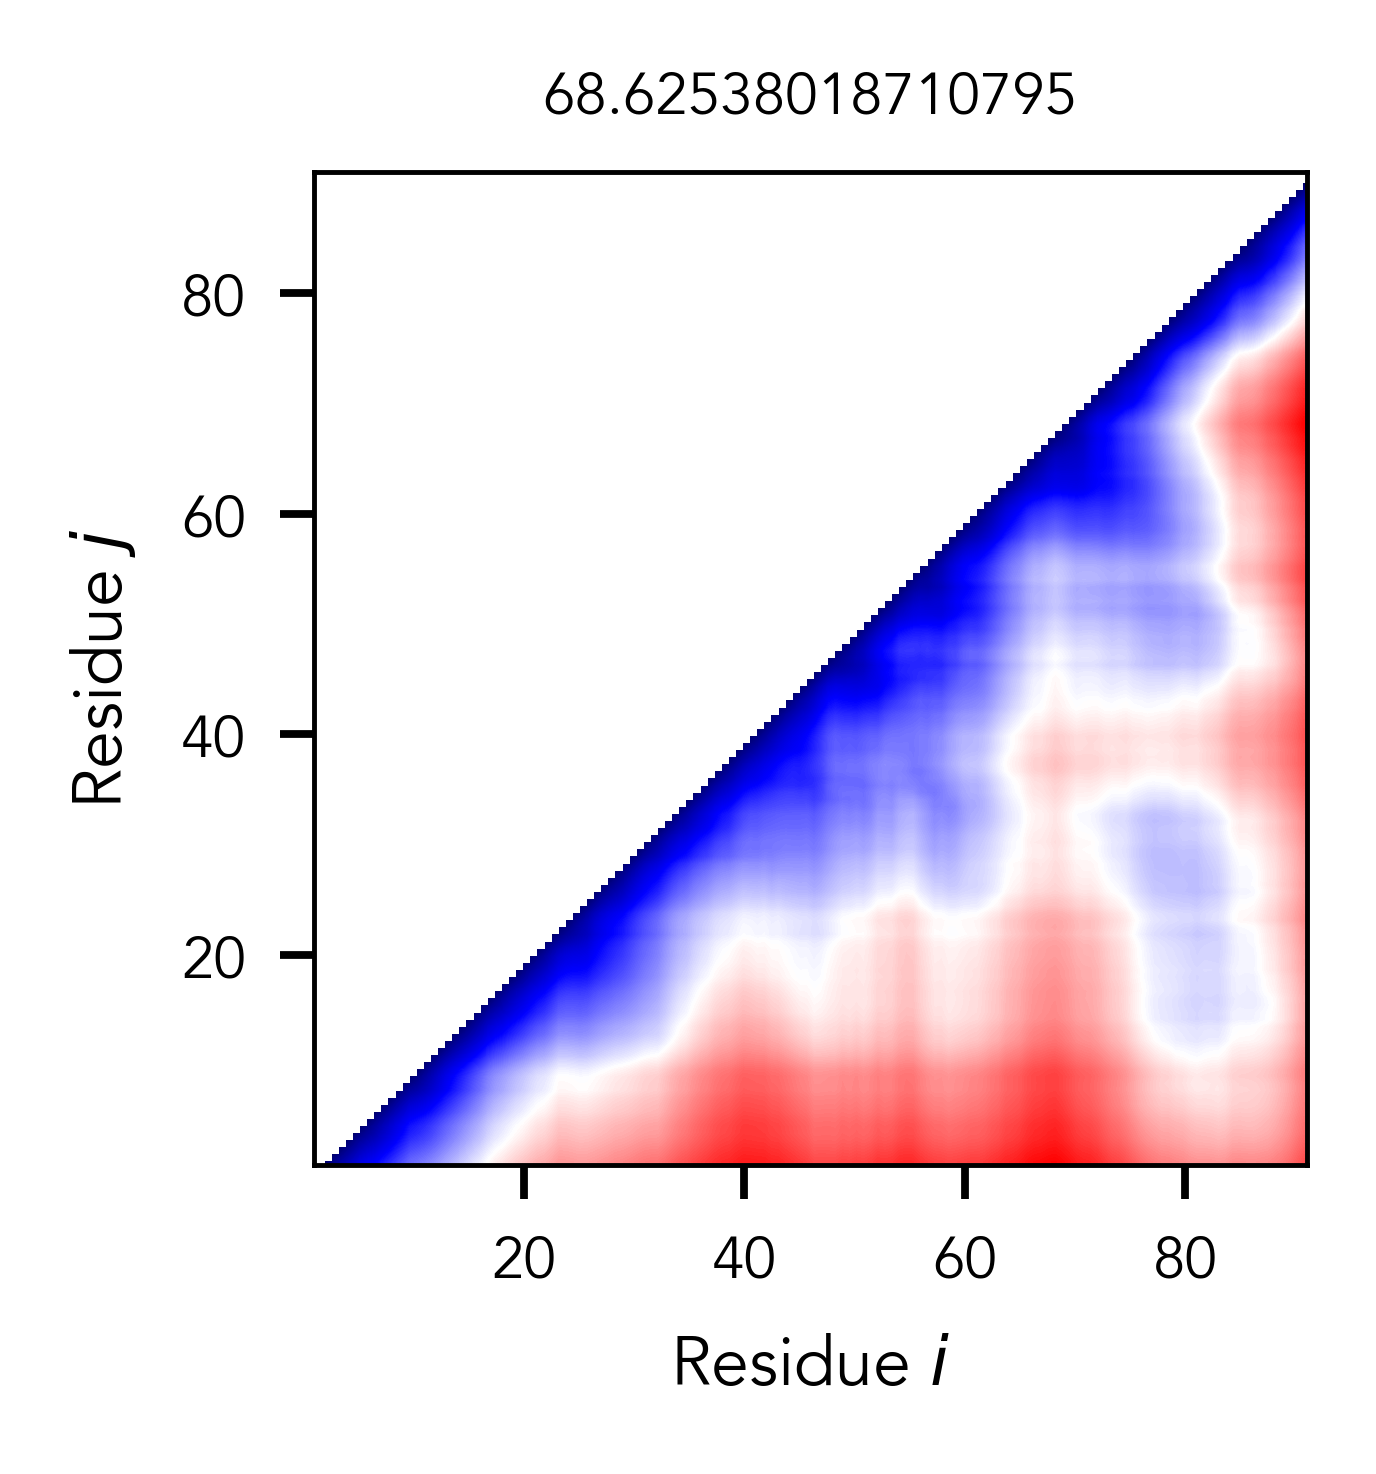

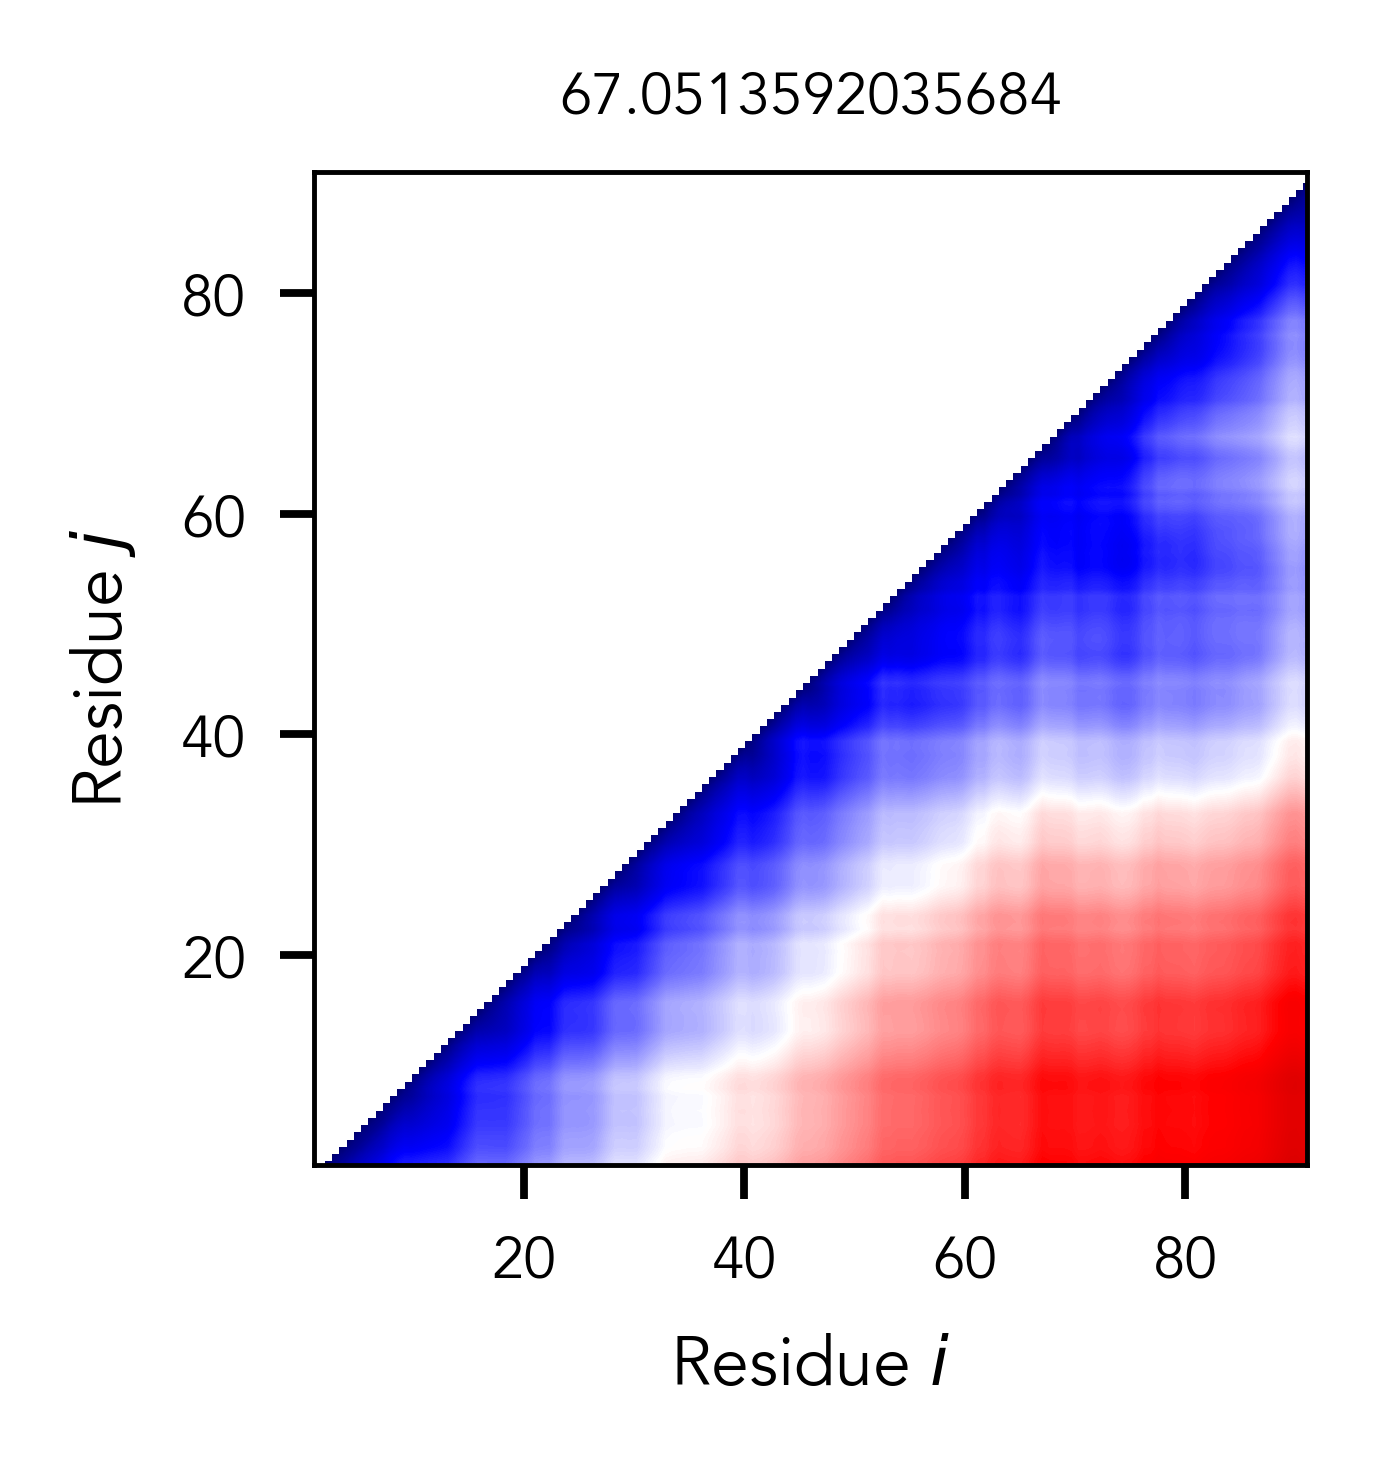

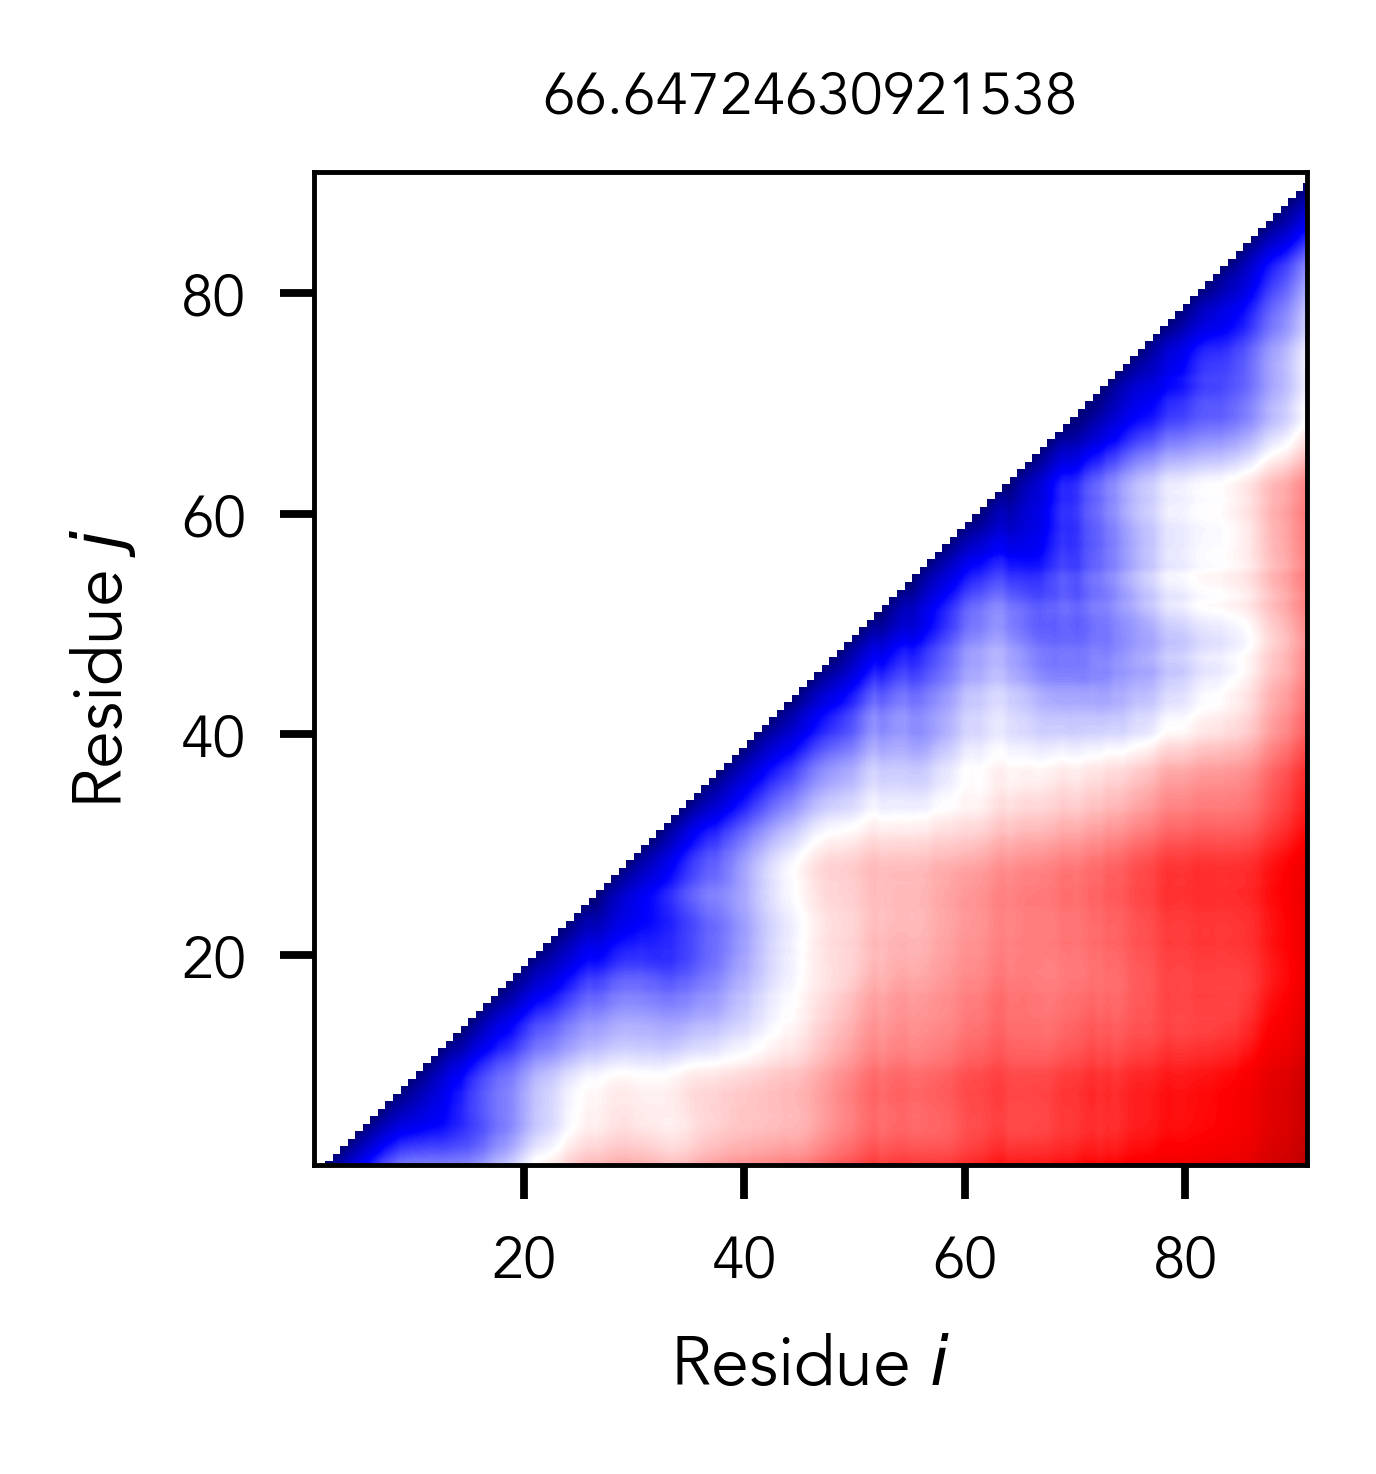

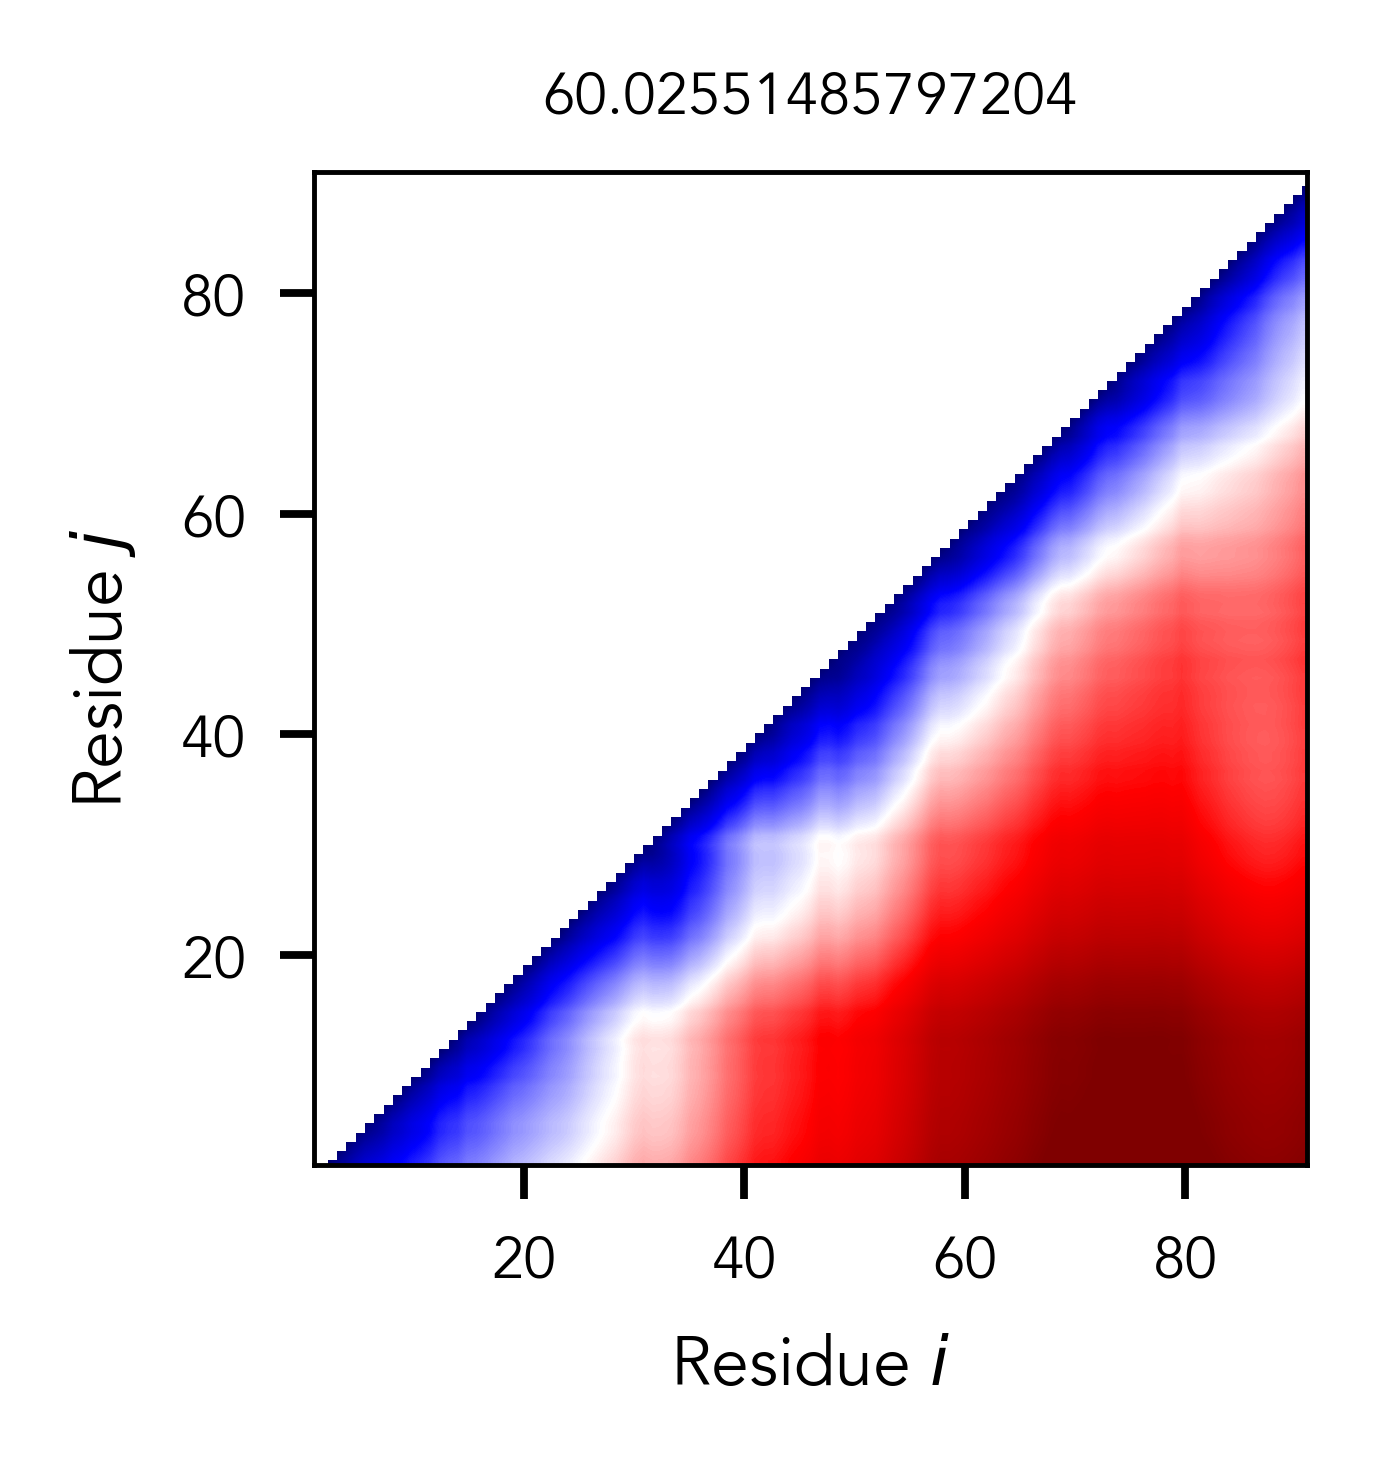

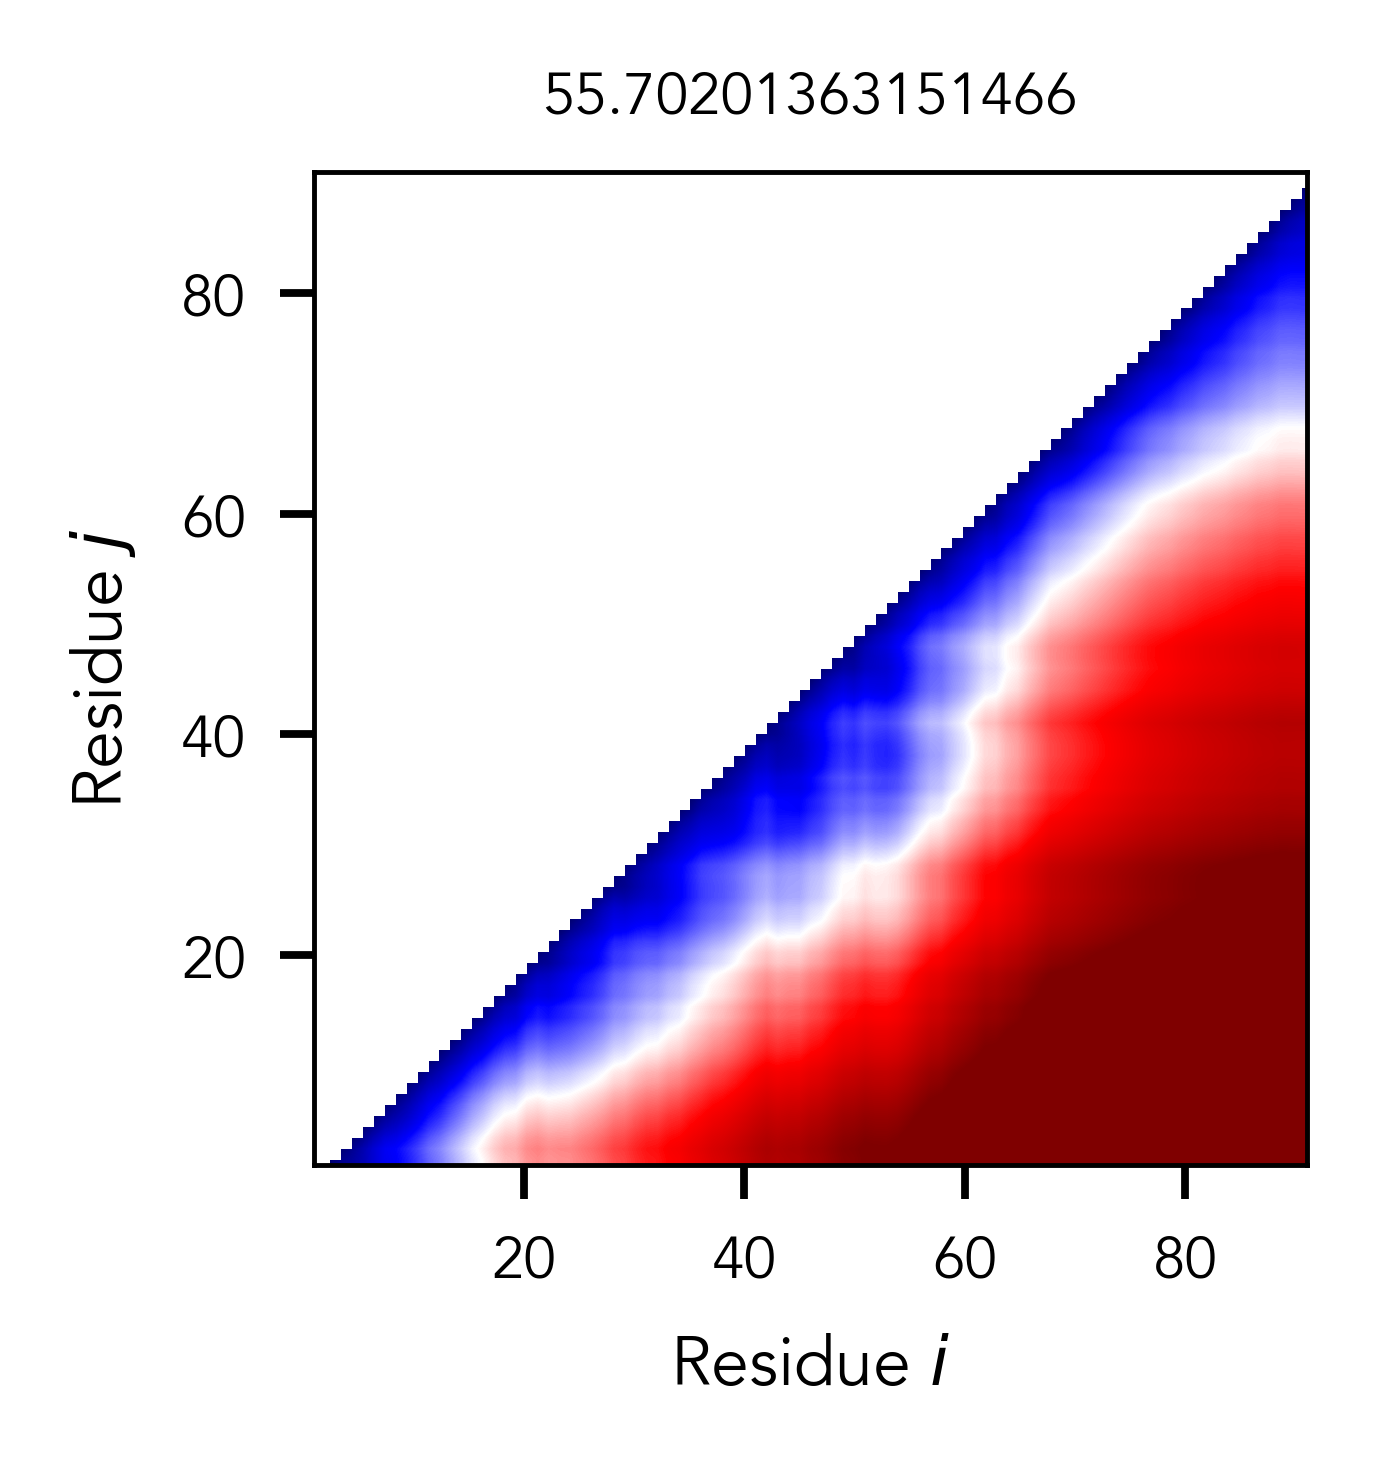

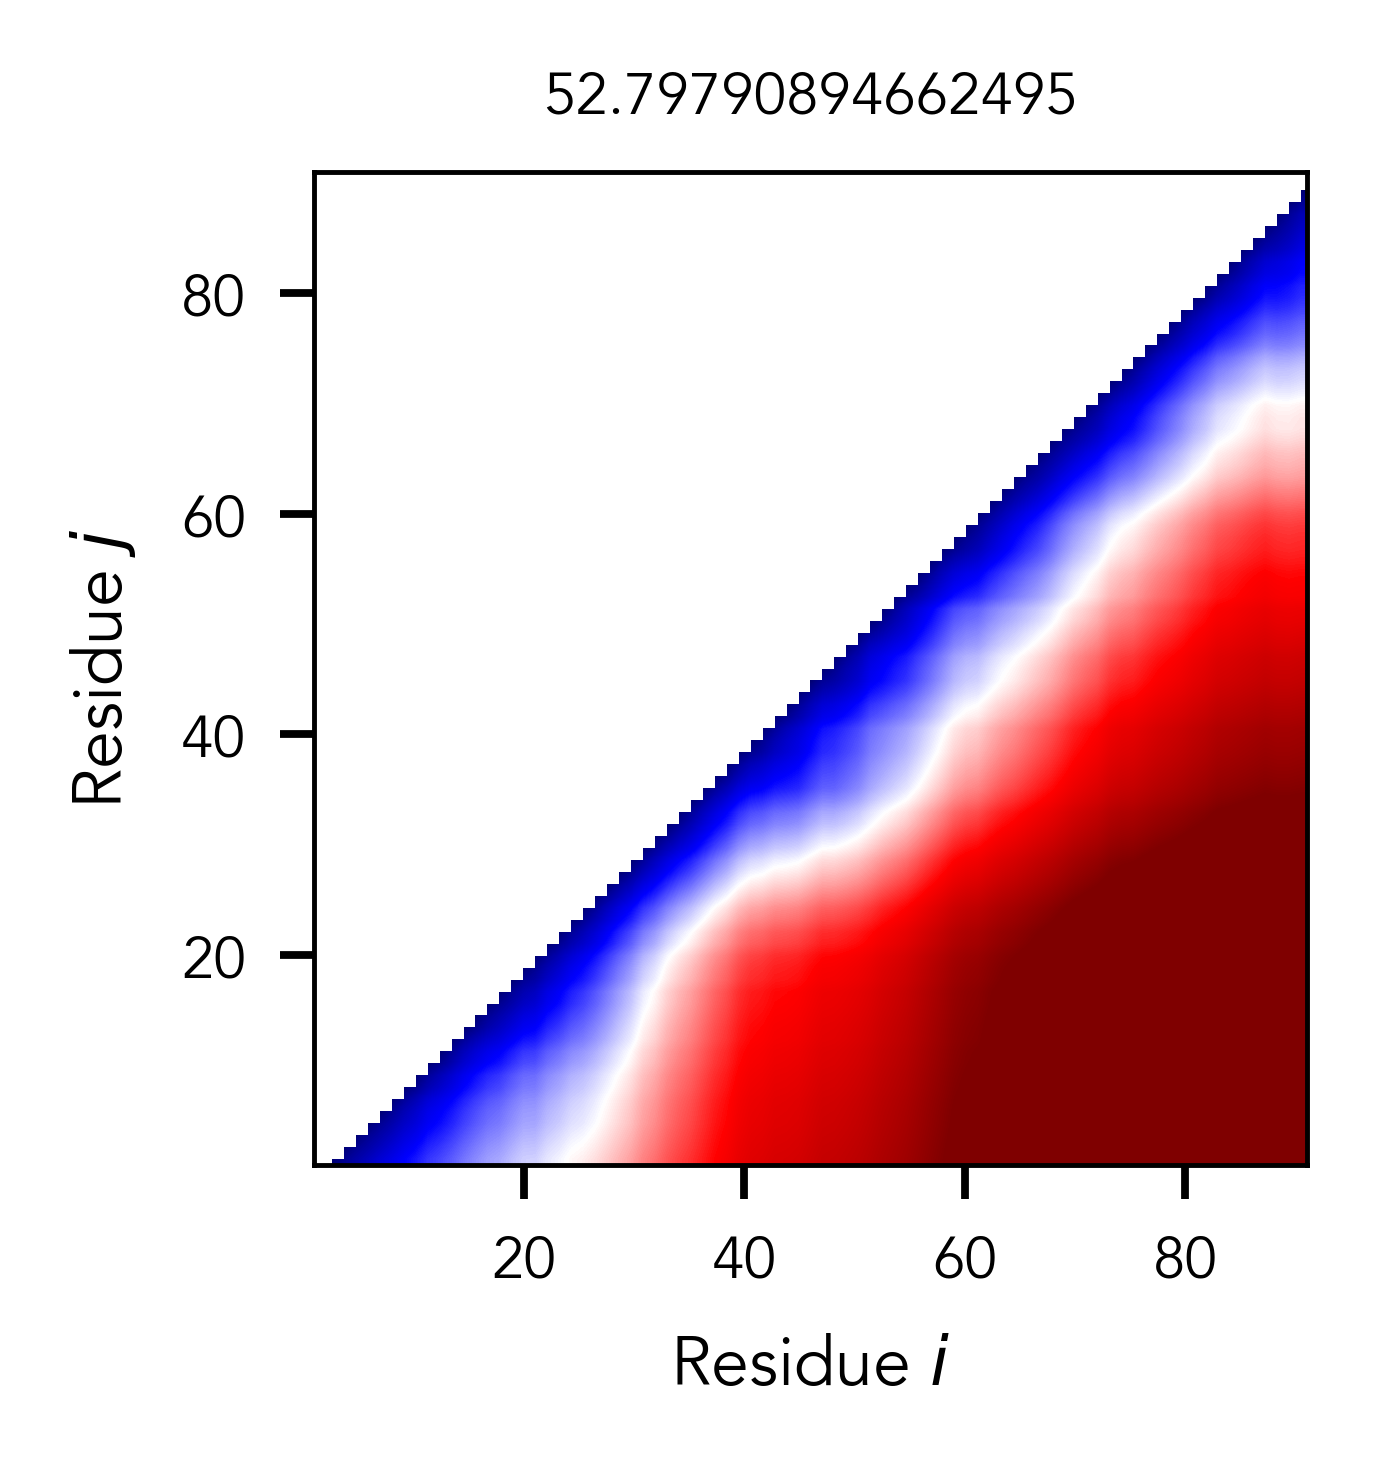

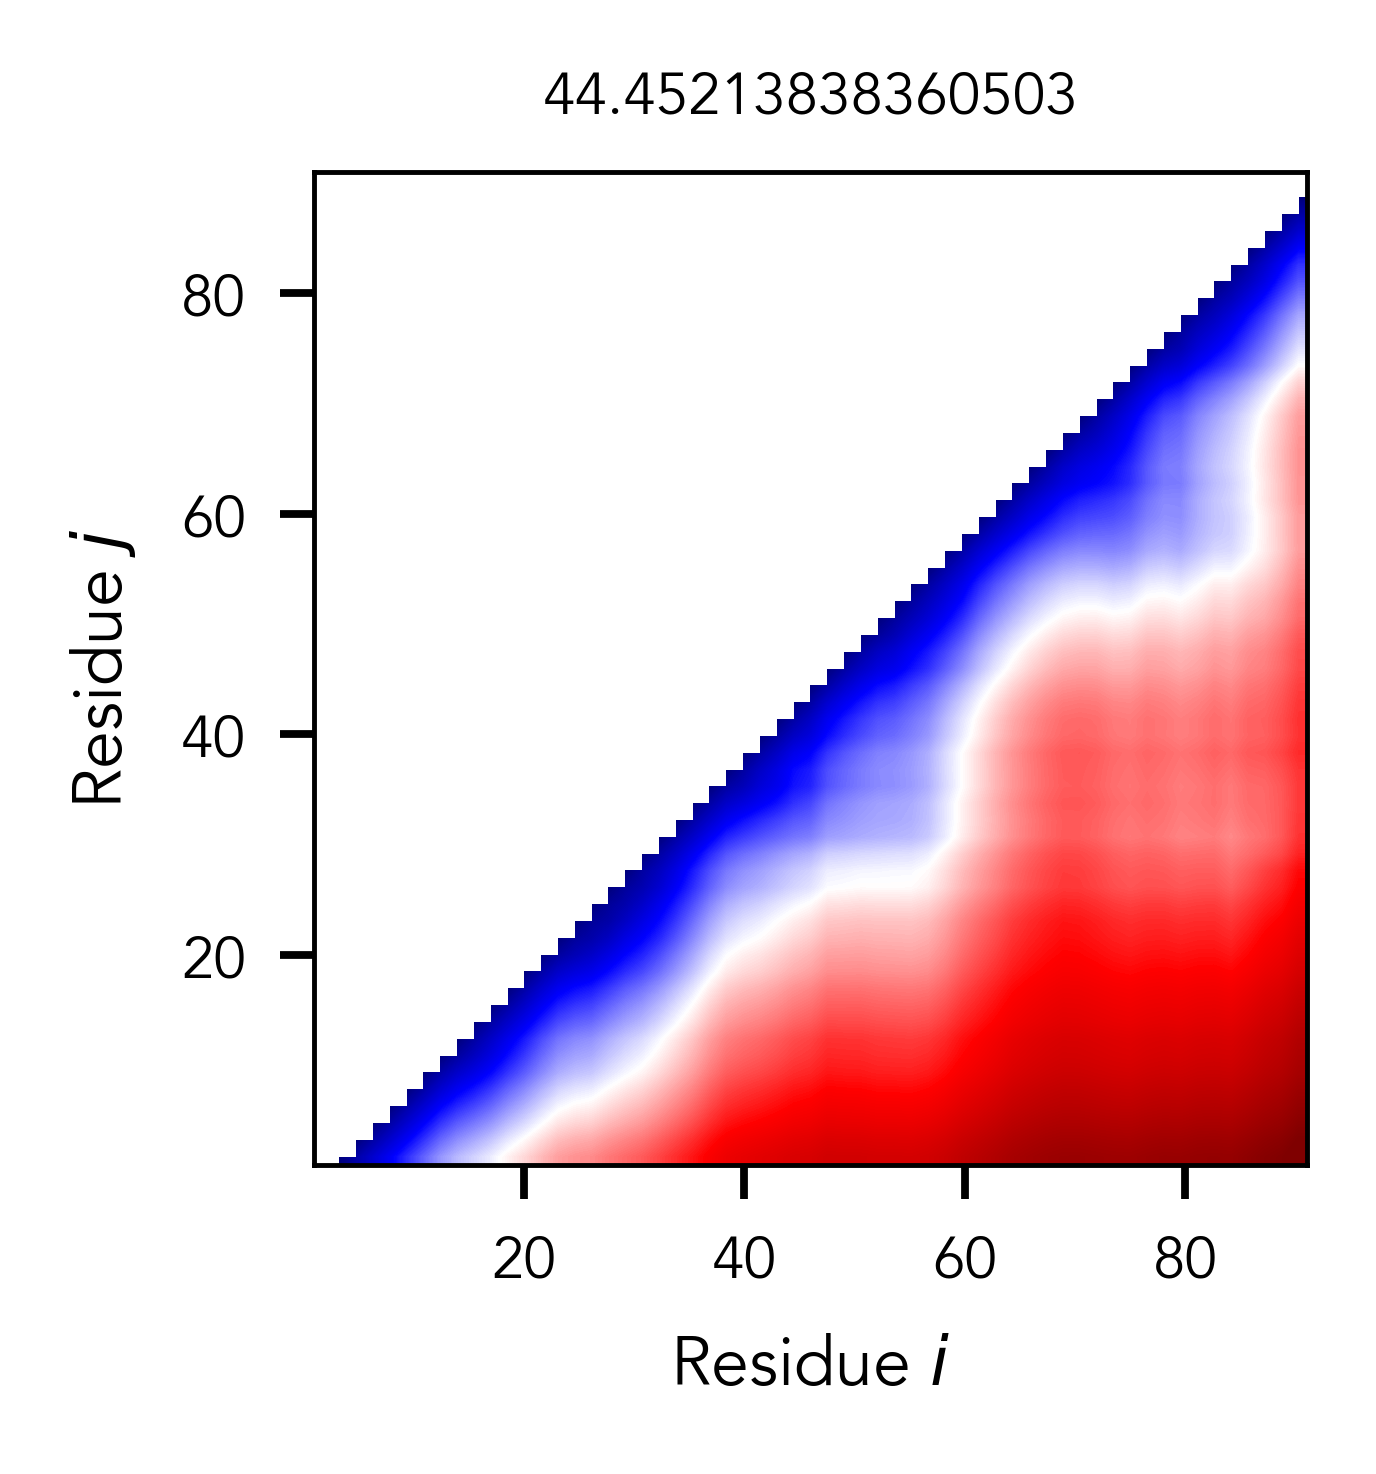

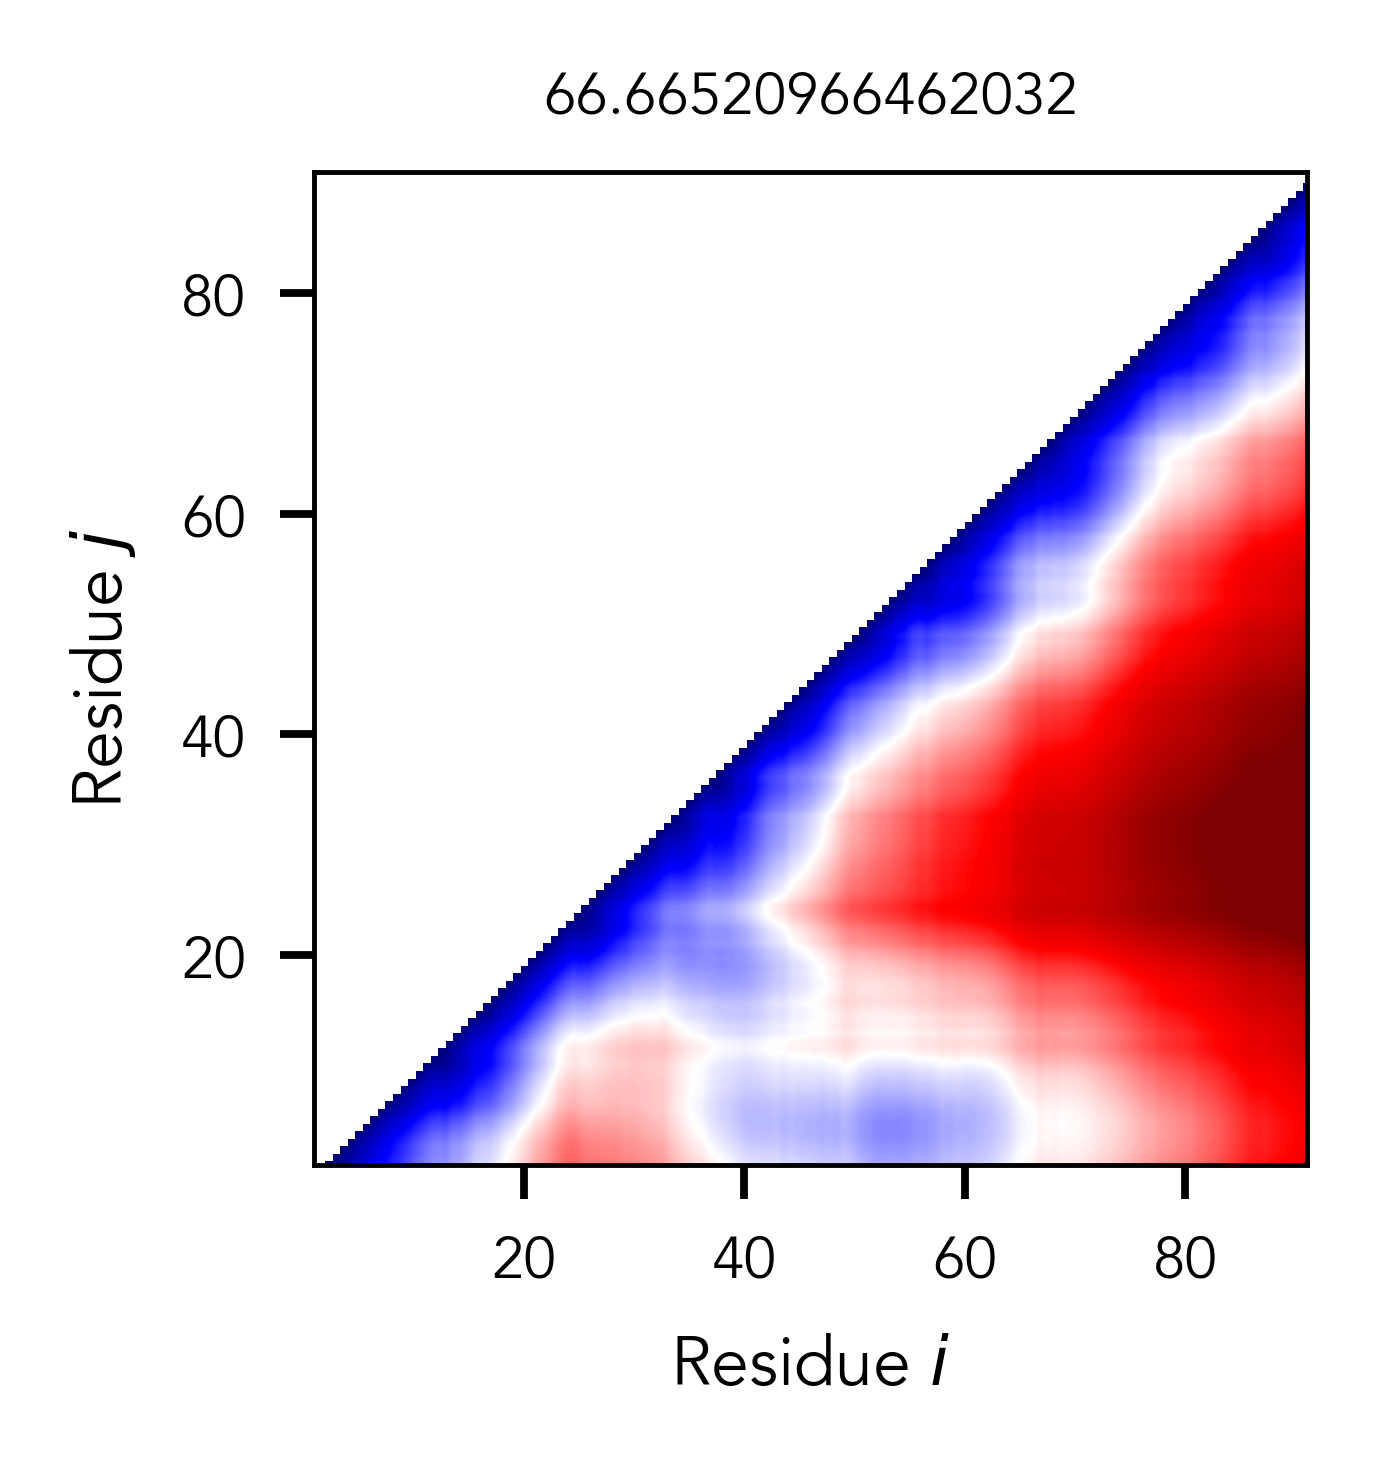

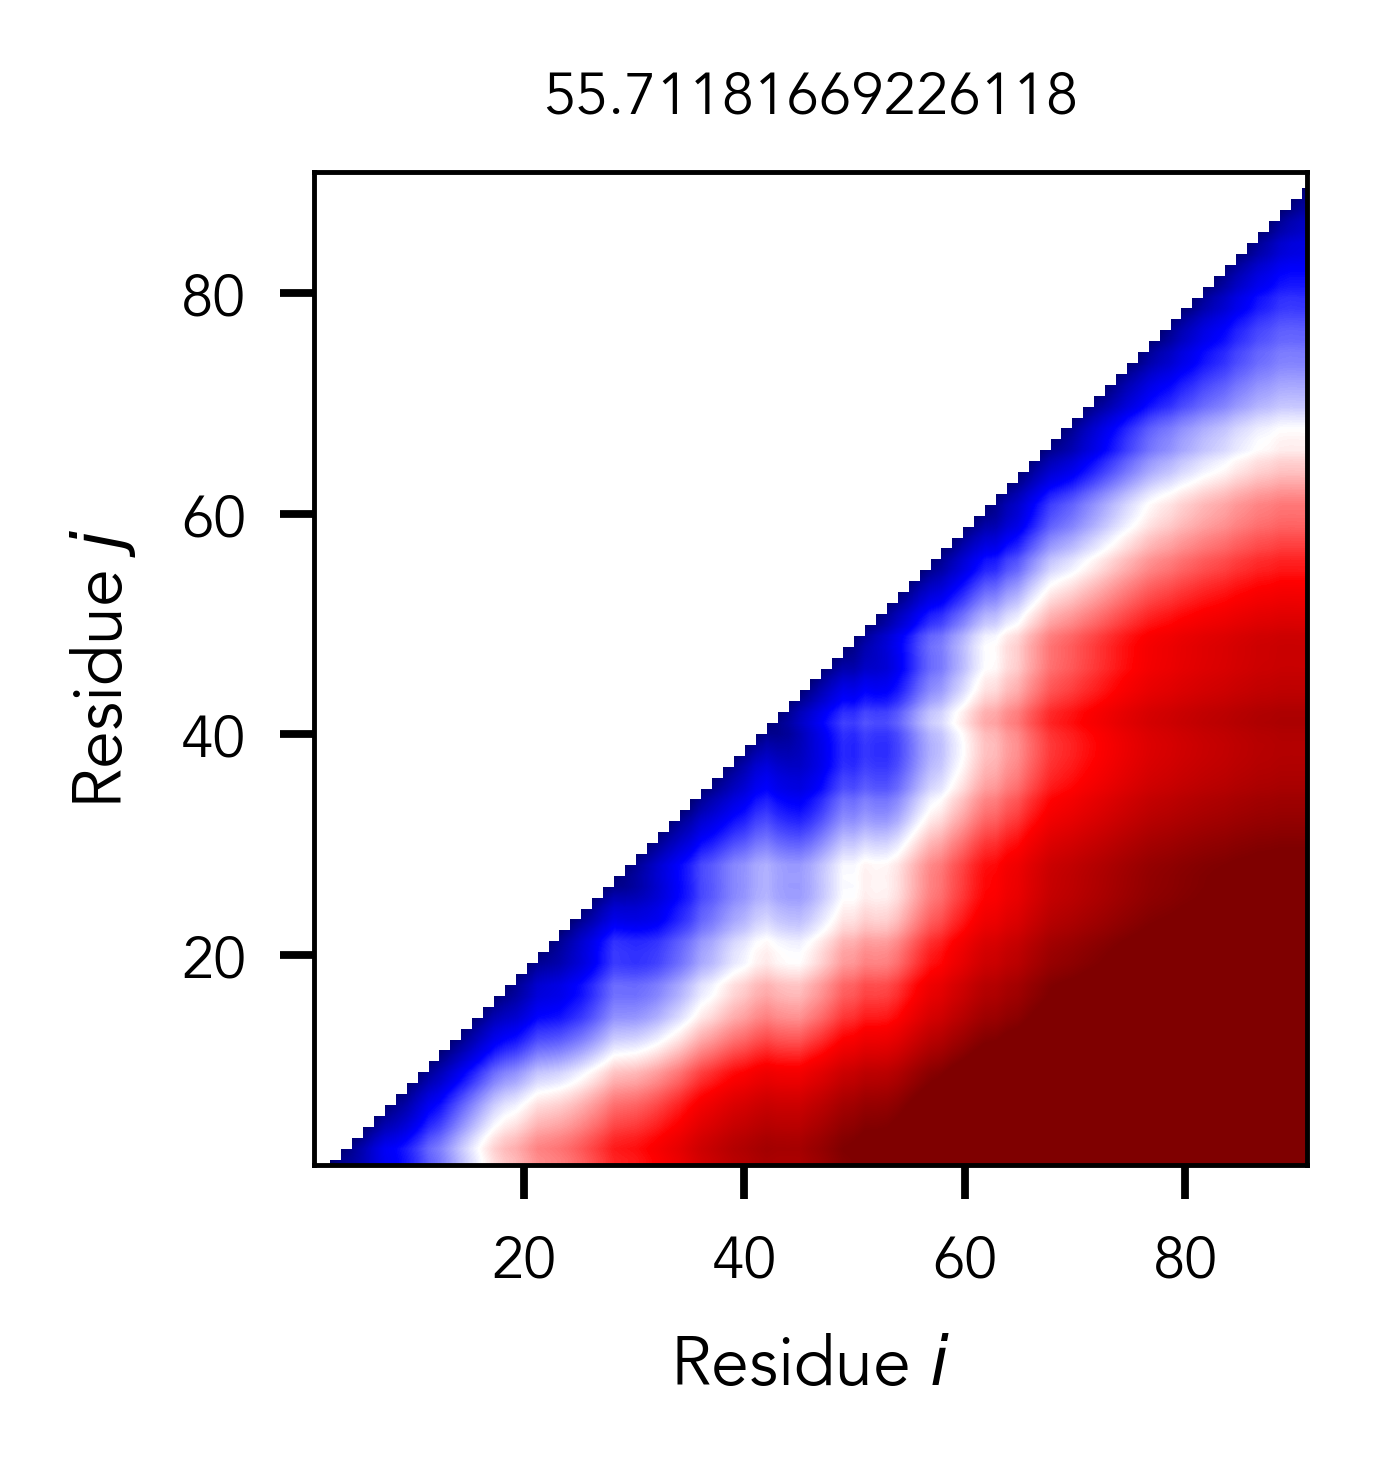

In [11]:

bin_width=3.5
max_val=250
bins = np.arange(0,max_val, bin_width)

count=1000000



for n in names:
    
    
    fig = figure(None, (2.2,2.2), dpi=350)
    
    
    synthetic_dm = AnalyticalFRC(seqs[n]).get_distance_map()
    
    scaling_map_tranposed = dm[n]
    
    
    ax_list = fig.axes


    # we define max extent for using plt.imshow. This basically sets the number of residues
    max_extent = scaling_map.shape[0]

    # we build a masked array for figure generation
    masked_array = np.ma.masked_where(scaling_map_tranposed == 0, scaling_map_tranposed)

    ## By convention we also want to create a color map that is reflective around 0 but also
    # shows the 'bad' values as white. Bad here just reflects values where we don't have data (i.e.) bottom
    # right triangle of the evntual figure
    # create a copy of the colormap

    # the defauly colourmap we use s seismic, but, there are MANY possible options - see
    # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
    cmap = copy.copy(matplotlib.cm.get_cmap("seismic"))
    cmap.set_bad(color='white')

    # generate the figure! The main thing you may want to mess with here are vmax and vmin, which define the range
    # over which the color scheme is defined. In a perfect world white = 1.0 and blue < 1 and red > 1, BUT sometims
    # this isn't feasible, in which case a linear color map (i.e. blue to red) might be preferable. Use your discretion 
    # here as needed!


    im = plt.imshow(masked_array, cmap=cmap, interpolation='bilinear',
                       origin='lower', extent=[1, max_extent, 1, max_extent],
                       vmax=np.max(synthetic_dm), vmin=1)


    plt.title(np.max(synthetic_dm), fontsize=6)
    plt.xlabel('Residue $i$', fontsize=7)
    plt.ylabel('Residue $j$', fontsize=7)

    # by defaulty we show tickmarks every 20 residues, but, YMMV in terms of what works best for your data
    plt.xticks(np.arange(0, scaling_map.shape[0]+1, 20),fontsize=6)
    plt.yticks(np.arange(0, scaling_map.shape[0]+1, 20),fontsize=6)

    plt.xlim([1,max_extent])
    plt.ylim([1,max_extent])


    #ax = plt.gca()
    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes("right", size="5%", pad=0.05)
    #cb = plt.colorbar(cax=cax)
    #cb.set_label('Normalized distance')

    # include this to stop matplotlib being dumb and chopping off axes info...
    plt.tight_layout()

    #plt.savefig('figures/scaling_map_1.pdf')
    
    plt.savefig(f'figures/true_dm_panel_{n}.pdf')
    


/var/folders/2n/xtzsyspd32v6vglg_pd5gmw80000gn/T/ipykernel_58451/3198941363.py:6: RuntimeWarning: invalid value encountered in true_divide
  scaling_map = dm[n]/synthetic_dm
meta NOT subset; don't know how to subset; dropped


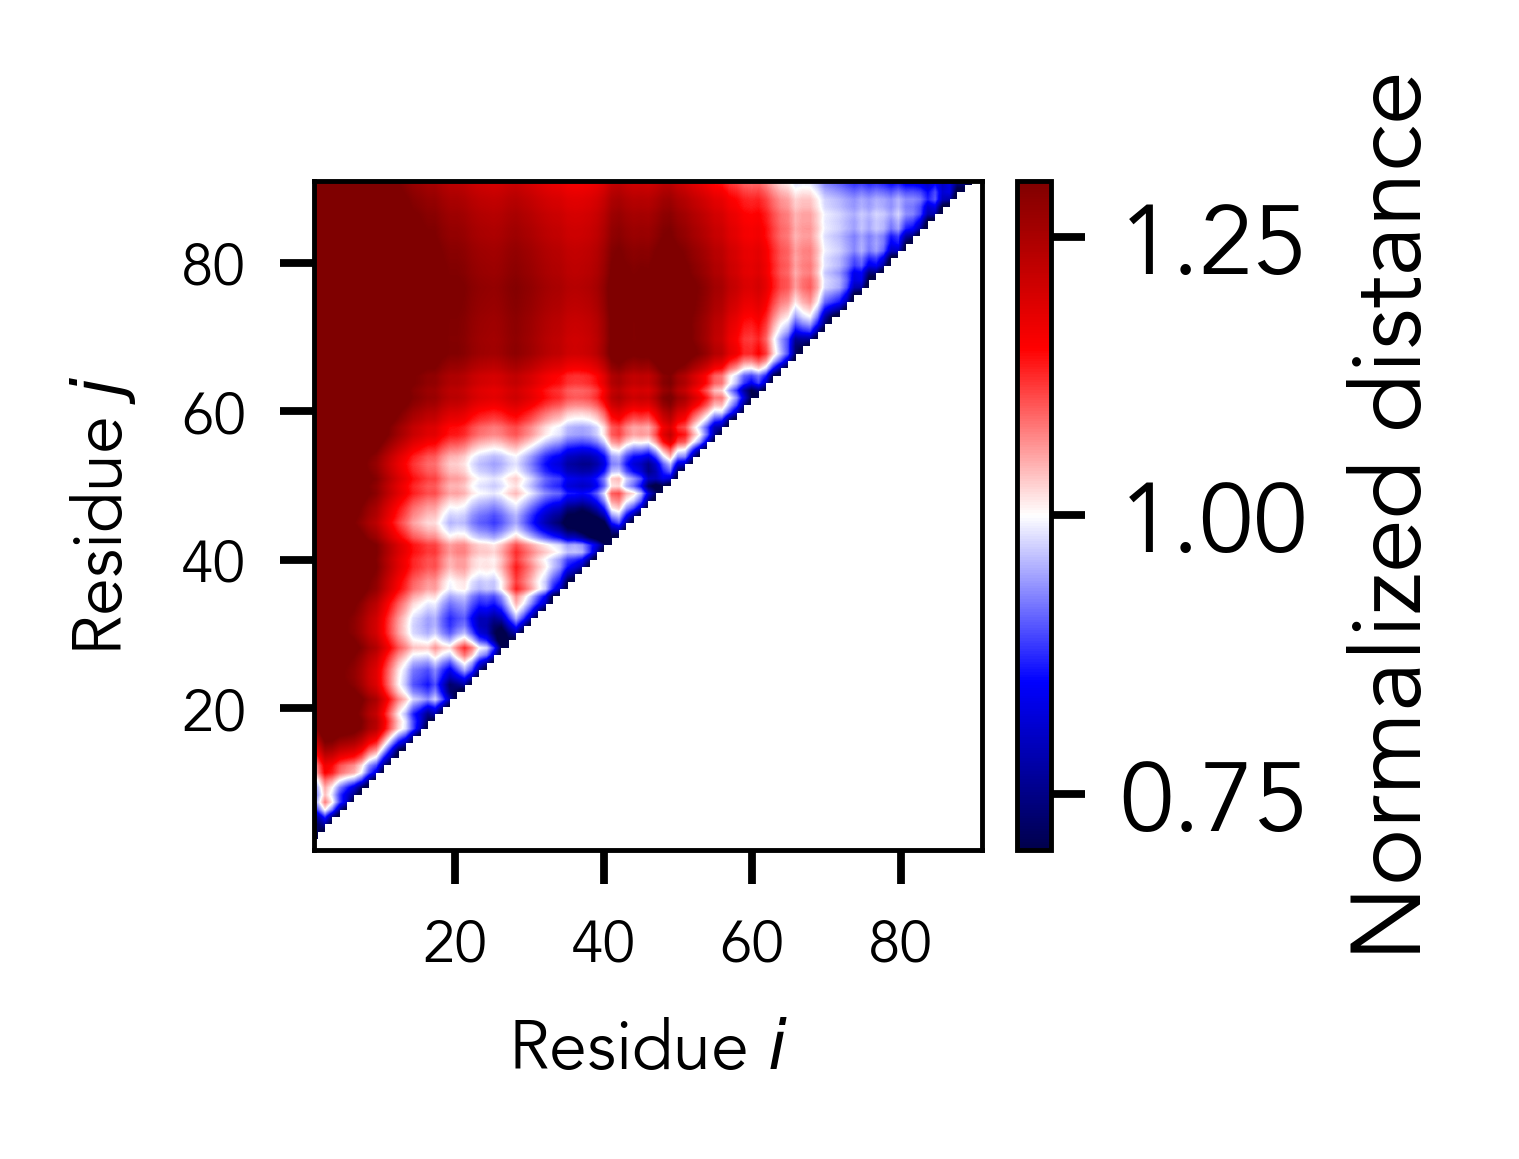

In [12]:
fig = figure(None, (2.2,2.2), dpi=350)


synthetic_dm = AnalyticalFRC(seqs[n]).get_distance_map()

scaling_map = dm[n]/synthetic_dm


ax_list = fig.axes


# we define max extent for using plt.imshow. This basically sets the number of residues
max_extent = scaling_map.shape[0]

# transpose this so the final figures follow convention
scaling_map_tranposed = scaling_map.transpose()

# we build a masked array for figure generation
masked_array = np.ma.masked_where(scaling_map_tranposed == 0, scaling_map_tranposed)

## By convention we also want to create a color map that is reflective around 0 but also
# shows the 'bad' values as white. Bad here just reflects values where we don't have data (i.e.) bottom
# right triangle of the evntual figure
# create a copy of the colormap

# the defauly colourmap we use s seismic, but, there are MANY possible options - see
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
cmap = copy.copy(matplotlib.cm.get_cmap("seismic"))
cmap.set_bad(color='white')

# generate the figure! The main thing you may want to mess with here are vmax and vmin, which define the range
# over which the color scheme is defined. In a perfect world white = 1.0 and blue < 1 and red > 1, BUT sometims
# this isn't feasible, in which case a linear color map (i.e. blue to red) might be preferable. Use your discretion 
# here as needed!


im = plt.imshow(masked_array, cmap=cmap, interpolation='bilinear',
                   origin='lower', extent=[1, max_extent, 1, max_extent],
                   vmax=1.3, vmin=0.7)


plt.xlabel('Residue $i$', fontsize=7)
plt.ylabel('Residue $j$', fontsize=7)

# by defaulty we show tickmarks every 20 residues, but, YMMV in terms of what works best for your data
plt.xticks(np.arange(0, scaling_map.shape[0]+1, 20),fontsize=6)
plt.yticks(np.arange(0, scaling_map.shape[0]+1, 20),fontsize=6)

plt.xlim([1,max_extent])
plt.ylim([1,max_extent])


ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(cax=cax)
cb.set_label('Normalized distance')

# include this to stop matplotlib being dumb and chopping off axes info...
plt.tight_layout()
plt.savefig('figures/colorbar_fig.pdf')


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how

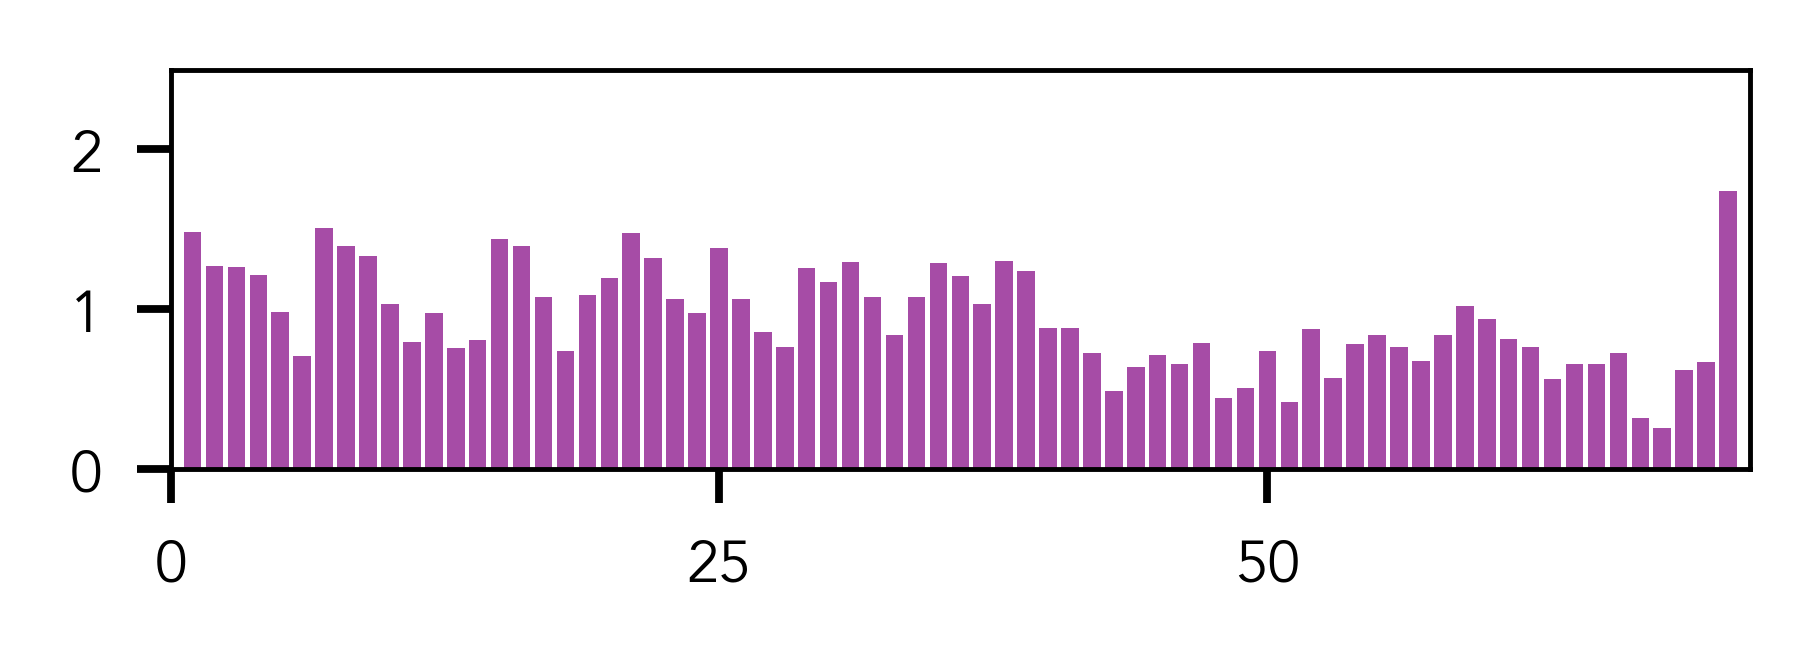

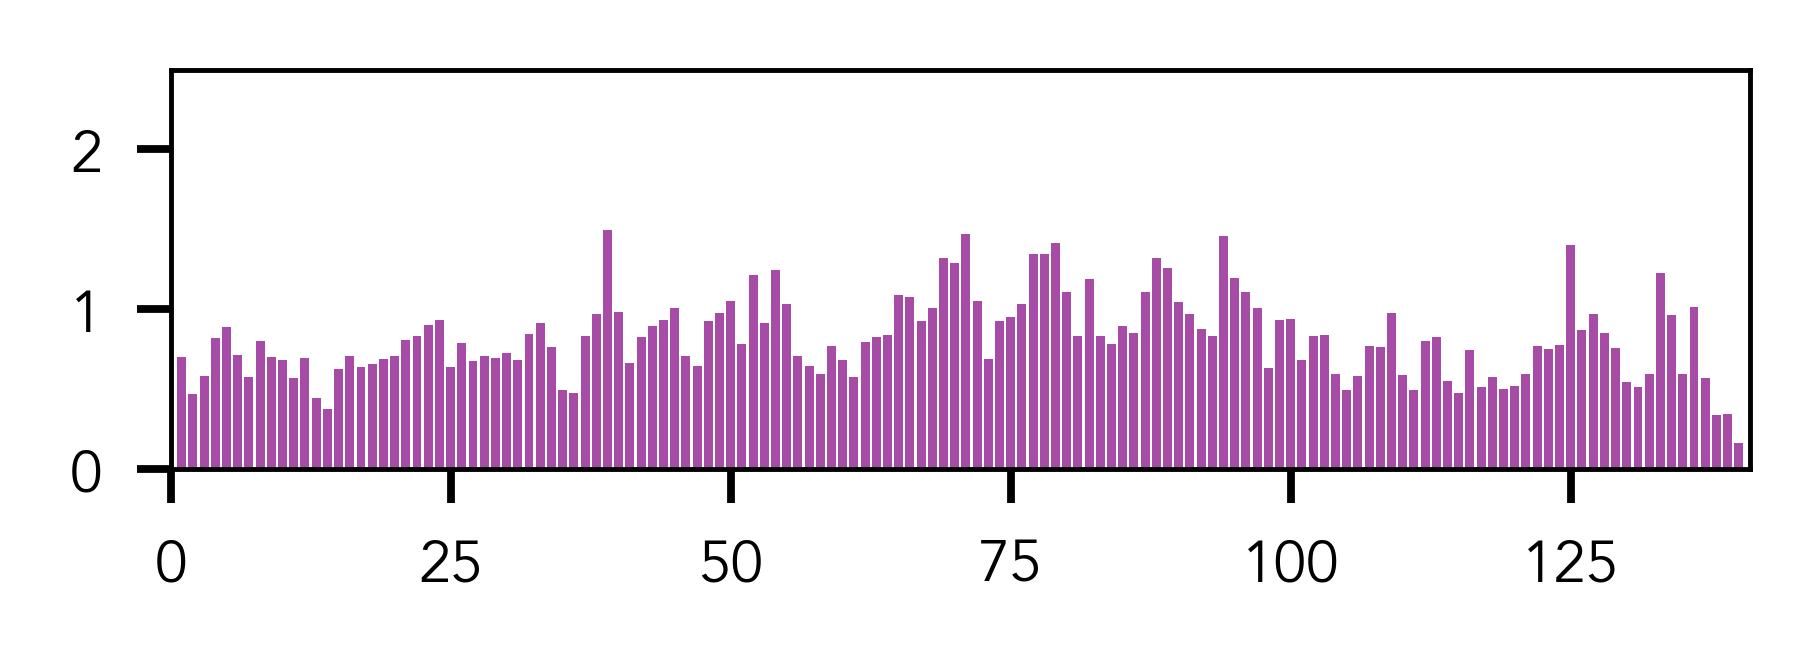

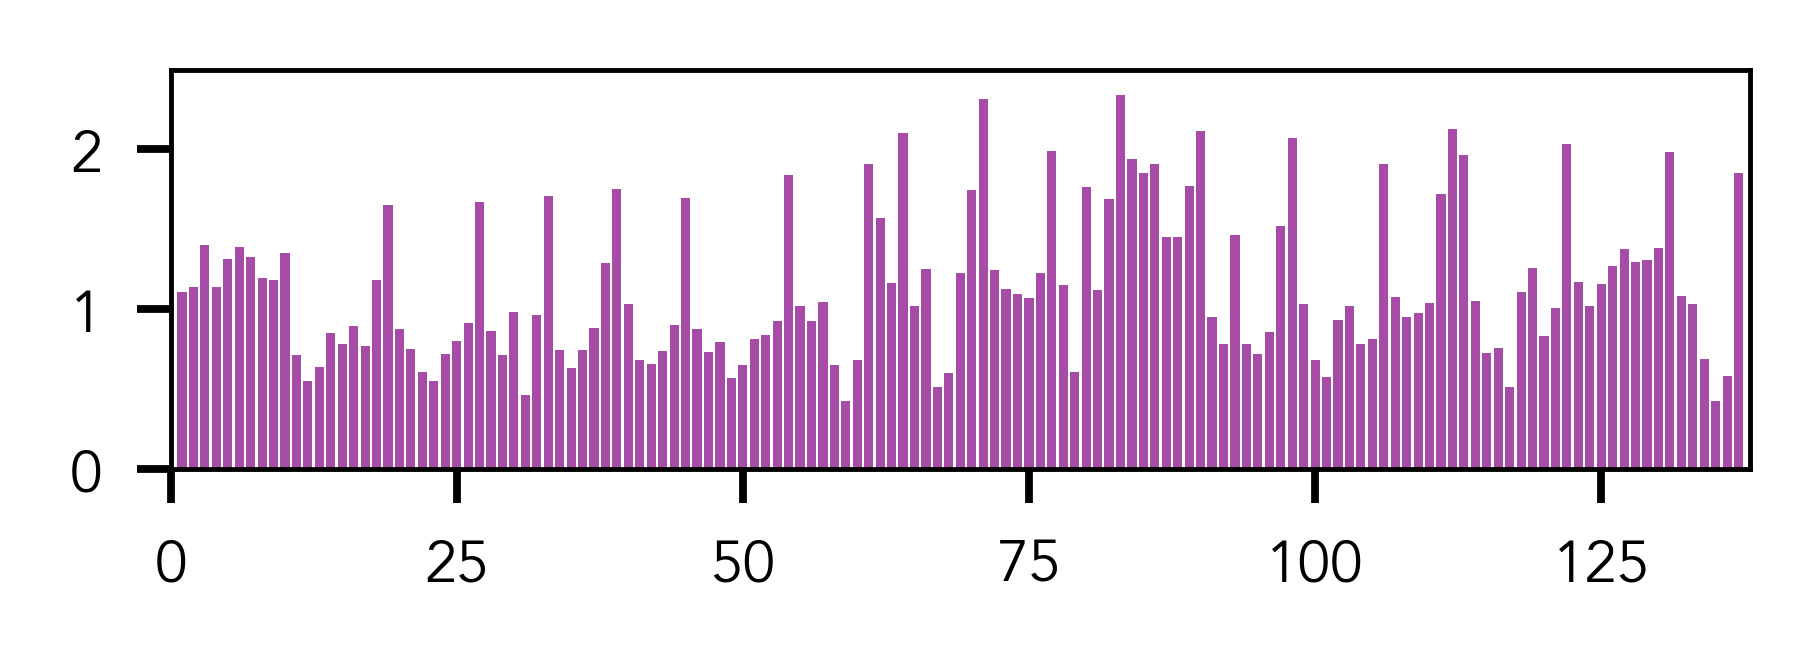

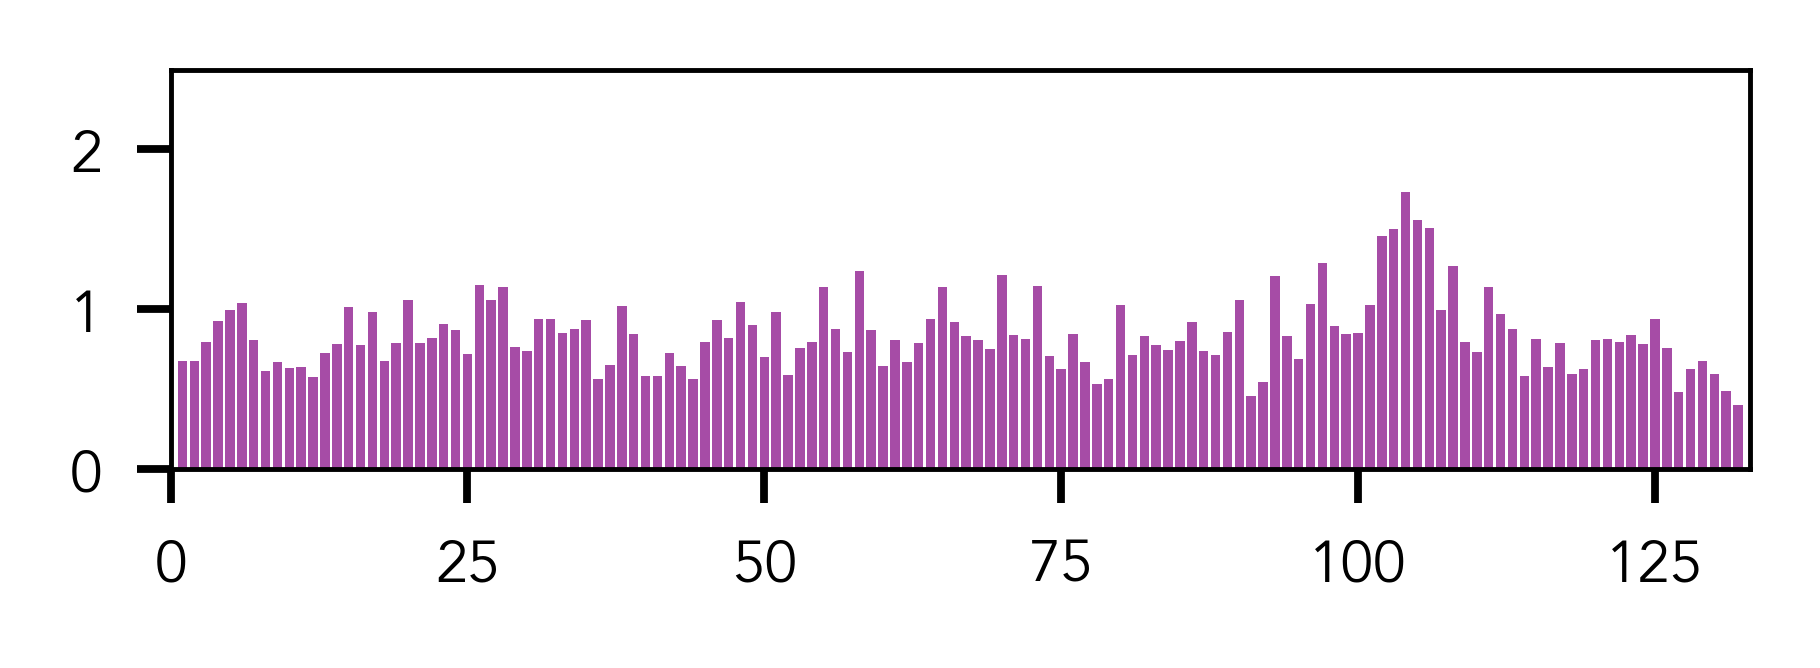

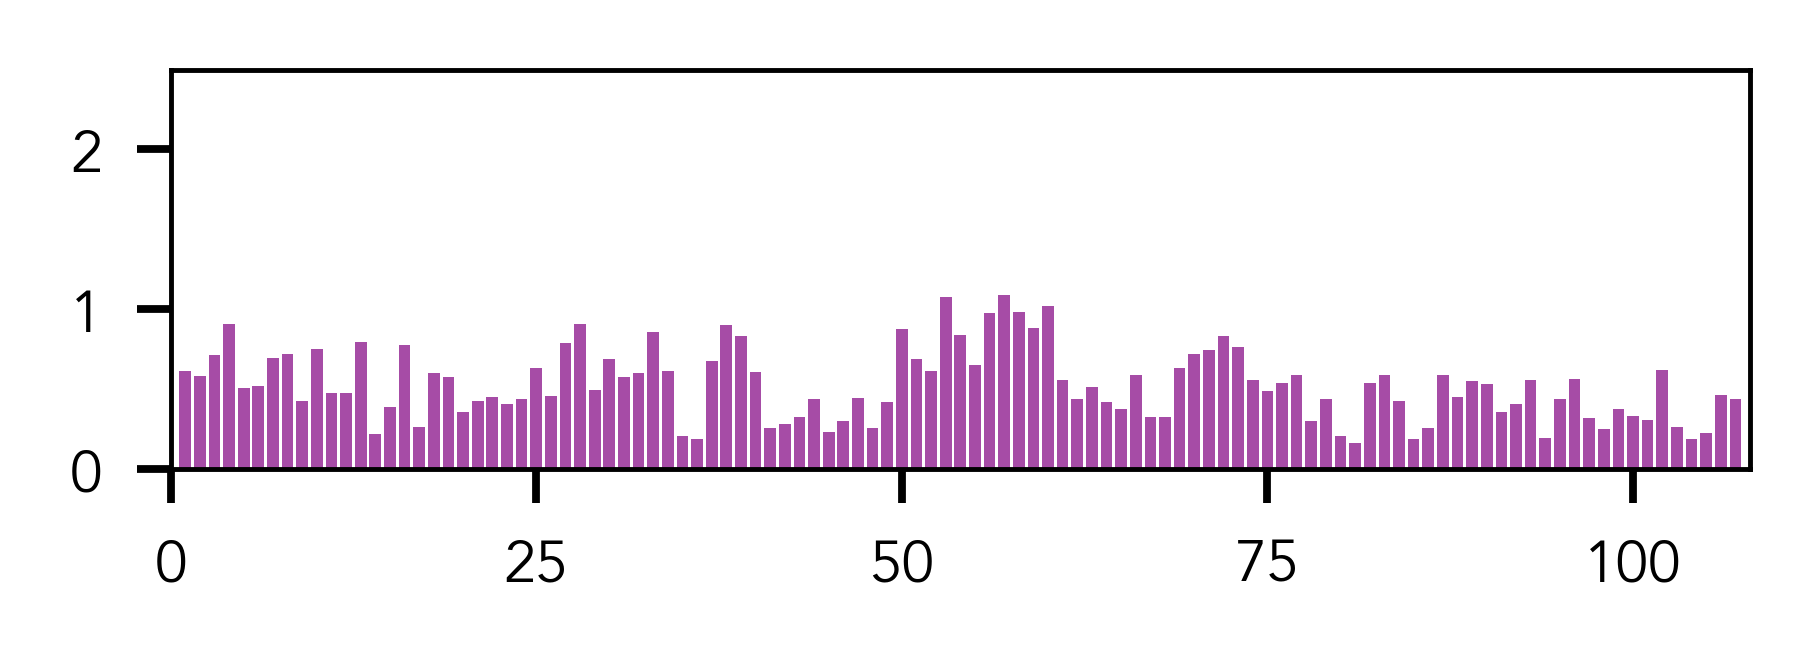

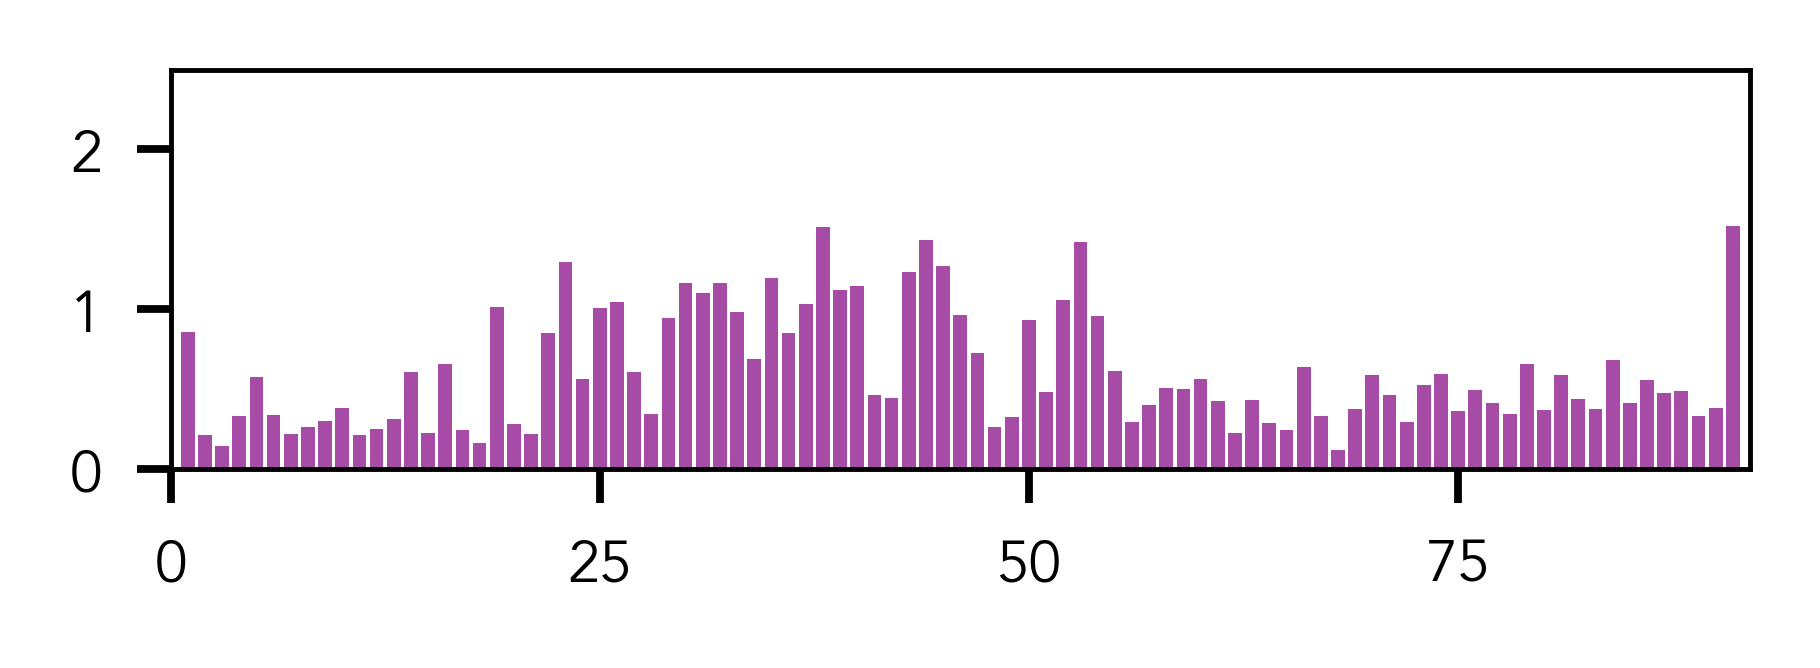

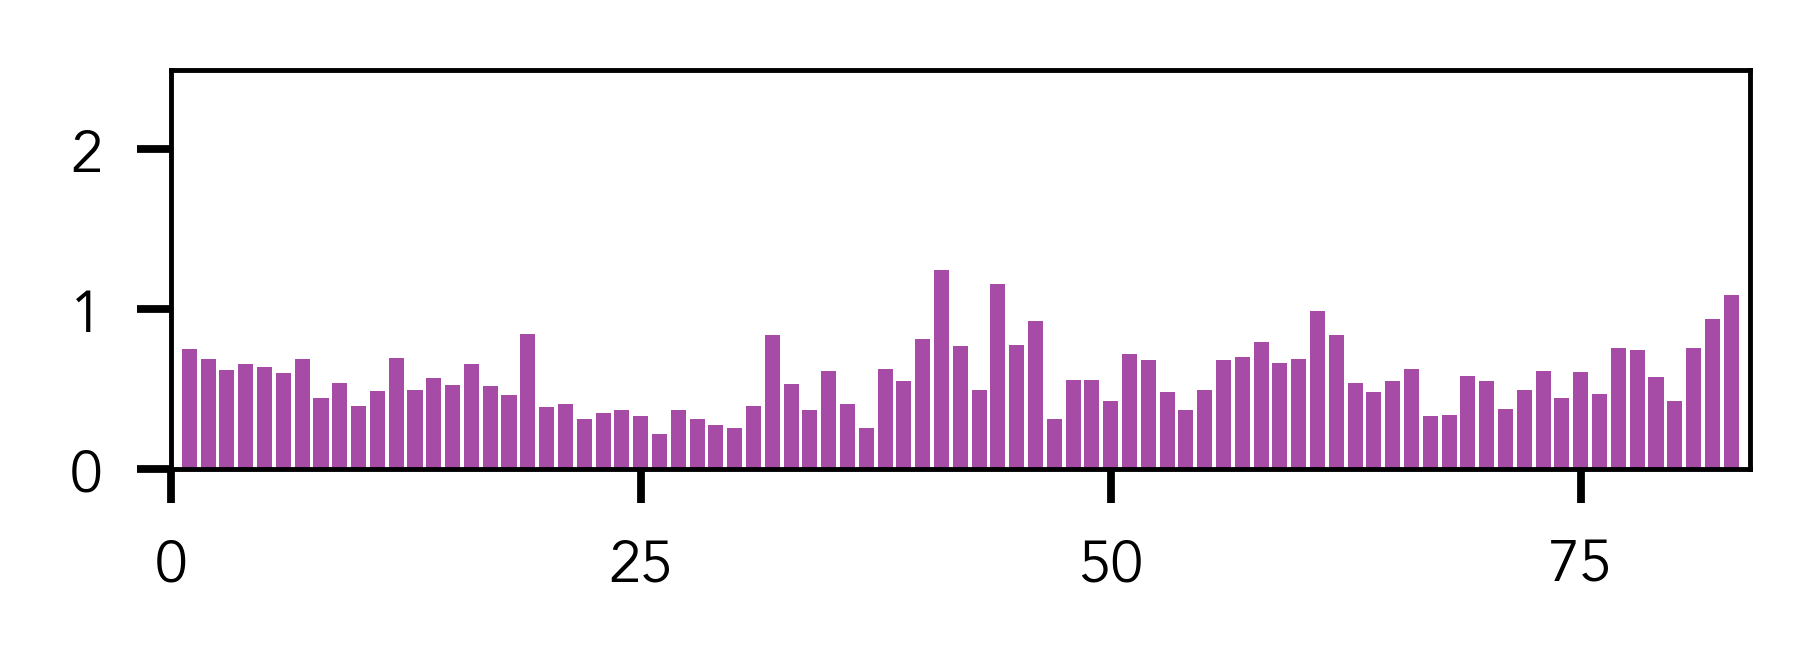

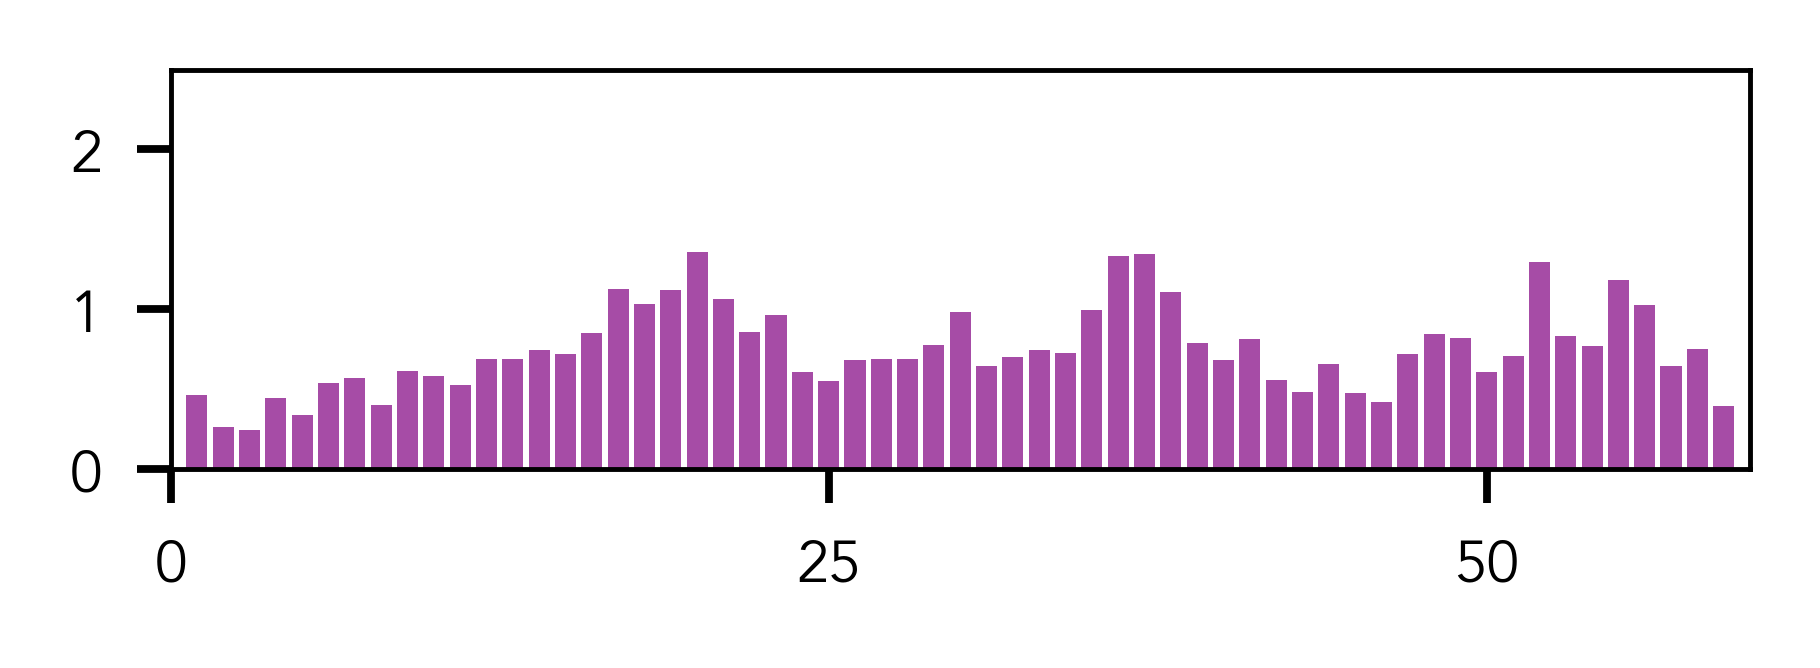

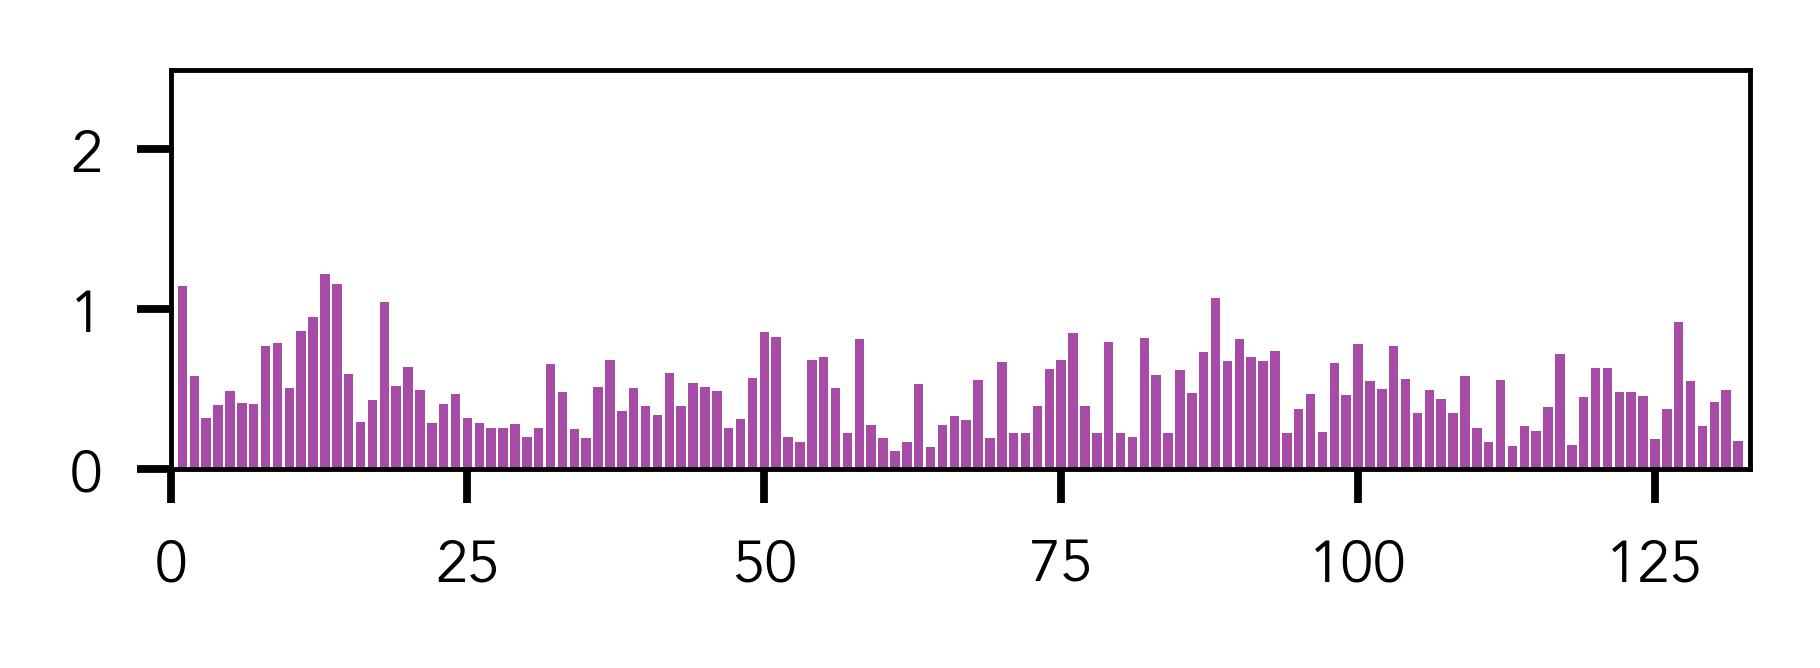

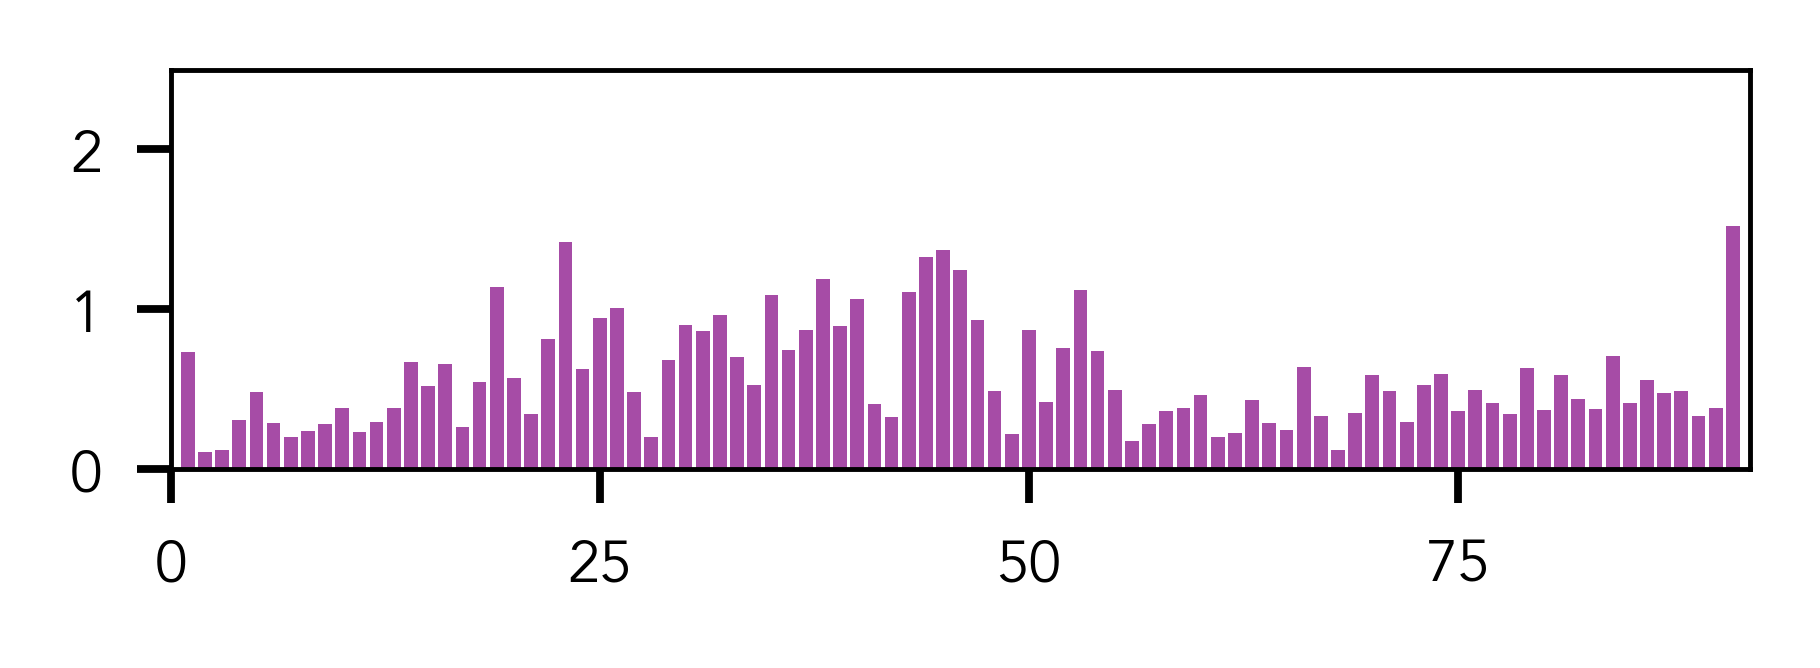

In [14]:

bin_width=3.5
max_val=250
bins = np.arange(0,max_val, bin_width)

count=1000000



for n in names:
    
    figure(None, (2.7,1), dpi=350)

    synth = AnalyticalFRC(seqs[n])

    matrix = []
    for i in range(len(synth)):
        tmp = []
        for j in range(len(synth)):
            tmp.append(synth.get_contact_fraction(i,j, 6))
        matrix.append(tmp)
        
    synth_co = np.sum(np.array(matrix),0)/len(synth)
    ratio = cm[n]/synth_co

    plt.bar(np.arange(1,len(synth)+1),ratio, color='purple', alpha=0.7,edgecolor='k', linewidth=0)
    

    plt.xlim([0,len(synth)+1])
    plt.ylim([0,2.5])
    plt.yticks([0,1,2])
    plt.yticks(fontsize=6)


    #ax = plt.gca()
    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes("right", size="5%", pad=0.05)
    #cb = plt.colorbar(cax=cax)
    #cb.set_label('Normalized distance')

    # include this to stop matplotlib being dumb and chopping off axes info...

    plt.xticks(np.arange(1,len(synth)+1), list(seqs[n]), fontsize=2)
    plt.tight_layout()
    plt.savefig(f'figures/cm_panel_{n}_seq.pdf')
    
    plt.tight_layout()
    plt.xticks(np.arange(0,len(synth)+1, 25), np.arange(0,len(synth)+1, 25), fontsize=6)
    plt.savefig(f'figures/cm_panel_{n}.pdf')

    
    
    
    


In [13]:
for n in ['ash1','p53_1_91','p27','notch','actr','drkN','ntail','asyn','hnRNPA1']:
    x = np.loadtxt(f'data/{n}/scaling_exp_analysis_power.csv')
    print(n)
    #print(x[0])
    #print(np.mean(rg[n])/AnalyticalFRC(seqs[n]).get_mean_radius_of_gyration())
    #print(np.mean(re[n])/AnalyticalFRC(seqs[n]).get_mean_end_to_end_distance())
    #print(np.mean(re[n]))
    #print(len(seqs[n]))
    print(meta.percent_disorder(seqs[n]))

ash1
100.0
p53_1_91
95.604
p27
100.0
notch
100.0
actr
49.296
drkN
33.898
ntail
100.0
asyn
100.0
hnRNPA1
100.0


In [105]:
'GASASSSPSPSTPTKSGKMRSRSSSPVRPKAYTPSPRSPNYHRFALDSPPQSPRRSSNSSITKKGSRRSSGSSPTRHTTRVCV')

100.0